# New MESH for the new BIG re-run , January 23th 2017

In [1]:
#Importing all definitions needed
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats.stats import pearsonr
from writefiles import *
import glob
import os
from readfiles import *
import h5py
from lomapost import * #All functions defined within module lomapost
import compact

In [2]:
set_fig_props()
xlen=plt.rcParams['figure.figsize'][0]
xyratio=0.6
ylen = xyratio*xlen

In [5]:
Lx = 460.8
mgalx = 1536;
Dx = Lx/(mgalx-1);
mgalz = 384*1.5;
Lz = Dx*(mgalz-1);#To get same resolution
Dz = Dx
print "Lz = %s"%(Lz)
print "Dx = %s, Dz=%s"%(Dx,Dz)

Lz = 172.61237785
Dx = 0.300195439739, Dz=0.300195439739


The real resolution (without aliasing is):
    

In [5]:
Dx*1.5

0.45029315960912053

In [6]:
print 2*np.pi/Lx,2*np.pi/Lz

0.0136353847812 0.0364005489377


**Case test/06 has a mesh grid in y as follows, with minimum of 0.3 = Dxmin, and max of 0.45 = Dxmin*1.5.:**

In [733]:
#p_folders   = [ '/share/drive/toni/VDML/s80/test/05/tanhLy250/'] 
p_folders   = [ '/share/drive/toni/VDML/s80/test/08/'] 
#,'/share/drive/toni/VDML/s80/test/06/01/'
#p_folders=['/share/drive/toni/VDML/s80/test/05/']
l_sta_opt = [3,3]
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    #l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_sta_files[ijob][0],l_sta_files[ijob][-1]) 
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_sta_files[ijob])
print nfiles
stats = []
for i in range(njobs):
    for j in range(len(l_sta_files[ijob])):
        stats.append([])
for ijob in range(njobs):
    print ijob
    print l_sta_opt[ijob]
    #for every stafiles in l_sta_files list:
    for fsta,ista in zip(l_sta_files[ijob],range(len(l_sta_files[ijob]))):
        temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        #temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        stats[ijob].append(temp)
#Special variables is'y'
l_var_unique = ['alp','bet','Re','nacum']
l_var_profiles=[]
l_var_point=[]
y = stats[0][0]['y']
my = len(y)
time = stats[0][0]
for key in stats[0][0].keys():
    if size(stats[0][0][key])==my and key!='y':
        l_var_profiles.append(key)
    elif key!='y' and key not in l_var_unique:
        l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point
# add a big axes, hide frame
# hide tick and tick label of the big axes
for ijob in range(njobs):
    nsta = len(l_sta_files[ijob])
    v_temp=np.zeros(nsta)
    y = stats[ijob][0]['y']
    my = len(y)
    matriz = np.zeros([my,nsta])
    path = p_folders[ijob]+'h5.stats'
    with h5py.File(path,"w") as f:
        f['y']=y
        print "my=%s"%(len(y))
        for variable in l_var_unique:
            f[variable]=stats[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,stats[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            ista = 0
            for ista in range(nsta):
                v_temp[ista] = stats[ijob][ista][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
            if variable=='time':
                vtime = np.array(v_temp)
            if variable=='dm':
                vdm  = np.array(v_temp)
            if variable=='dw':
                vdw  = np.array(v_temp)
            if variable=='EPS':
                vEPS  = np.array(v_temp)
            if variable=='Relambda':
                vLambda  = np.array(v_temp)
            if variable=='dmpoint':
                vdmpoint  = np.array(v_temp)
            if variable=='dmpoint2':
                vdmpoint2  = np.array(v_temp)
        for variable in l_var_profiles:
            for ista in range(nsta):
                matriz[:,ista]=stats[ijob][ista][variable]
            f[variable]=matriz

['/share/drive/toni/VDML/s80/test/08/']
job(1): 1st file = /share/drive/toni/VDML/s80/test/08/Pantano_02_030.sta, last file = /share/drive/toni/VDML/s80/test/08/Pantano_02_032.sta
[3]
0
3
['dyeta', 'wrms', 'llambda', 'w1rms', 'w3m', 'w2rms', 'R33', 'w3rms', 'them', 'urms', 'rwm', 'thep', 'Relambday', 'uv', 'um', 'epNH', 'XI', 'vm', 'rvm', 'Tm', 'vrms', 'R12', 'R11', 'TT', 'mum', 'nu', 'rum', 'wm', 'epR', 'epS', 'w1m', 'rhom', 'epD', 'Trms', 'k', 'w2m', 'eta', 'R22']
['EPS', 'Relambda', 'dm', 'dw', 'rhoEPS', 'dmpoint', 'etamin', 'time']
my=513
Writing alp = [ 0.0187656], for ijob = 0
Writing bet = [ 0.0727], for ijob = 0
Writing Re = [ 160.], for ijob = 0
Writing nacum = [1], for ijob = 0
Writing EPS
Writing Relambda
Writing dm
Writing dw
Writing rhoEPS
Writing dmpoint
Writing etamin
Writing time


In [734]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
xlabel = r'$y/\delta_m^0$'
ylabel = r'$\Delta y$'
#ax2 = ax.twinx()
#path = '/share/drive/toni/Re160s80/case1/y2/h5.stats'
path = '/share/drive/toni/VDML/s80/test/06/h5.stats'
path = '/share/drive/toni/VDML/s80/test/00/init/h5.stats'
#path = '/share/drive/toni/VDML/s80/test/05/h5.stats'
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dmpoint= np.array(f['dmpoint'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    rhom = np.array(f['rhom'])
    vm = np.array(f['vm'])
    Relambda = np.array(f['Relambda'])
    dyeta = np.array(f['dyeta'])
    eta  = np.array(f['eta'])
    llambda  = np.array(f['llambda'])
    epR = np.array(f['epR'])
    EPS = np.array(f['EPS'])
    nu = np.array(f['nu'])

#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])
plt.plot(yf[1:],np.diff(yf))
#plt.plot(yf[1:],np.diff(yf)/eta[1:,-1])
#plt.plot(yf[1:],dyeta[1:,-1])
#plt.plot(yf[1:],dyeta[1:,-1]/0.7**(-3.0/4.0))
plt.plot(yf,eta[:,-1])
plt.plot(yf,llambda[:,-1])
plt.xlabel(xlabel);plt.ylabel(ylabel)
Ly = yf[-1]-yf[0]
print "Ly=%s"%(Ly)
#plt.plot(yf,dyeta[:,kk])
#plt.xlim([-50,50])
#plt.ylim([0,100])
#plt.yscale('log')
plt.grid('on')
plt.ylim([0,3])
#plt.ylim([0,10])
#plt.plot(yf[1:],np.diff(yf))
#plt.ylim([0,15])

Ly=339.644890627


(0, 3)

In [736]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'EPS'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/06/h5.stats','/share/drive/toni/VDML/s80/test/00/init/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        fun = np.array(f[var]);
    plt.plot(time,fun)
plt.xlabel(xlabel);plt.ylabel(ylabel)

551
451


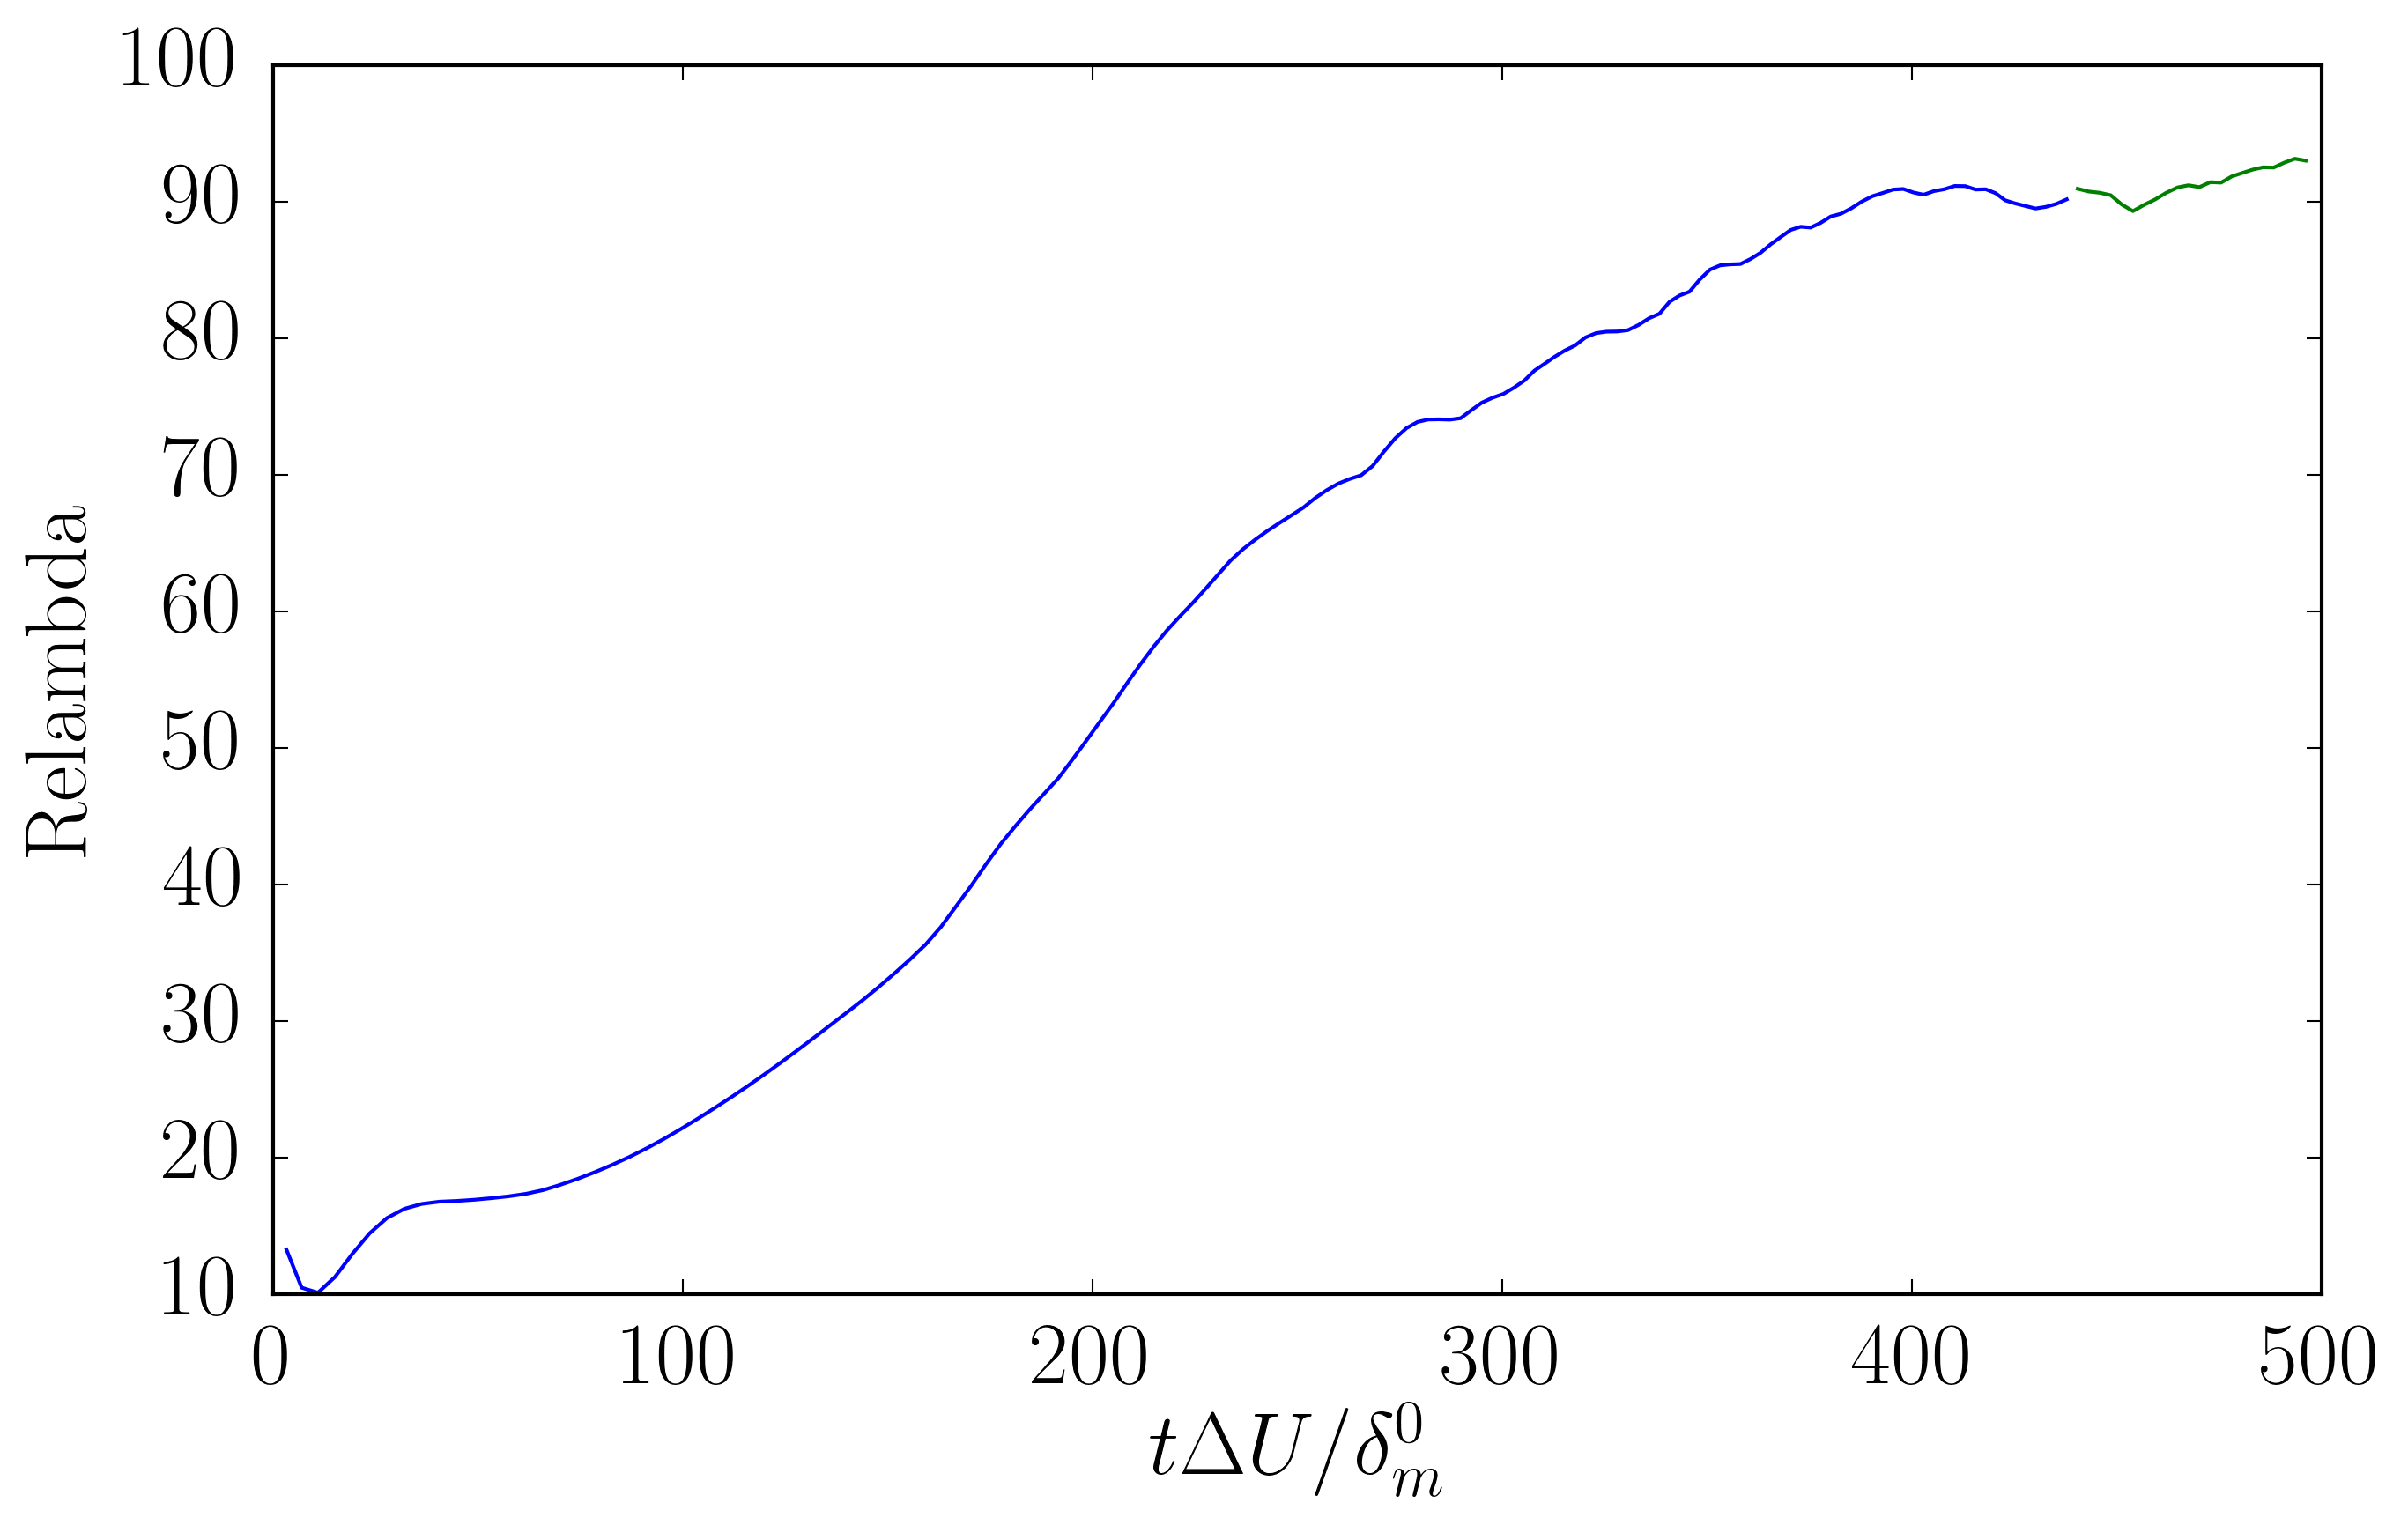

In [656]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'Relambda'
ylabel = var
 #'/share/drive/toni/VDML/s80/test/08/h5.stats'
p_folders= ['/share/drive/toni/VDML/s80/test/06/h5.stats','/share/drive/toni/VDML/s80/test/06/01/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        bet = np.array(f['bet'])
        yf  =np.array(f['y'])
        print len(yf)
        fun = np.array(f[var]);
    plt.plot(time,fun)
plt.xlabel(xlabel);plt.ylabel(ylabel)

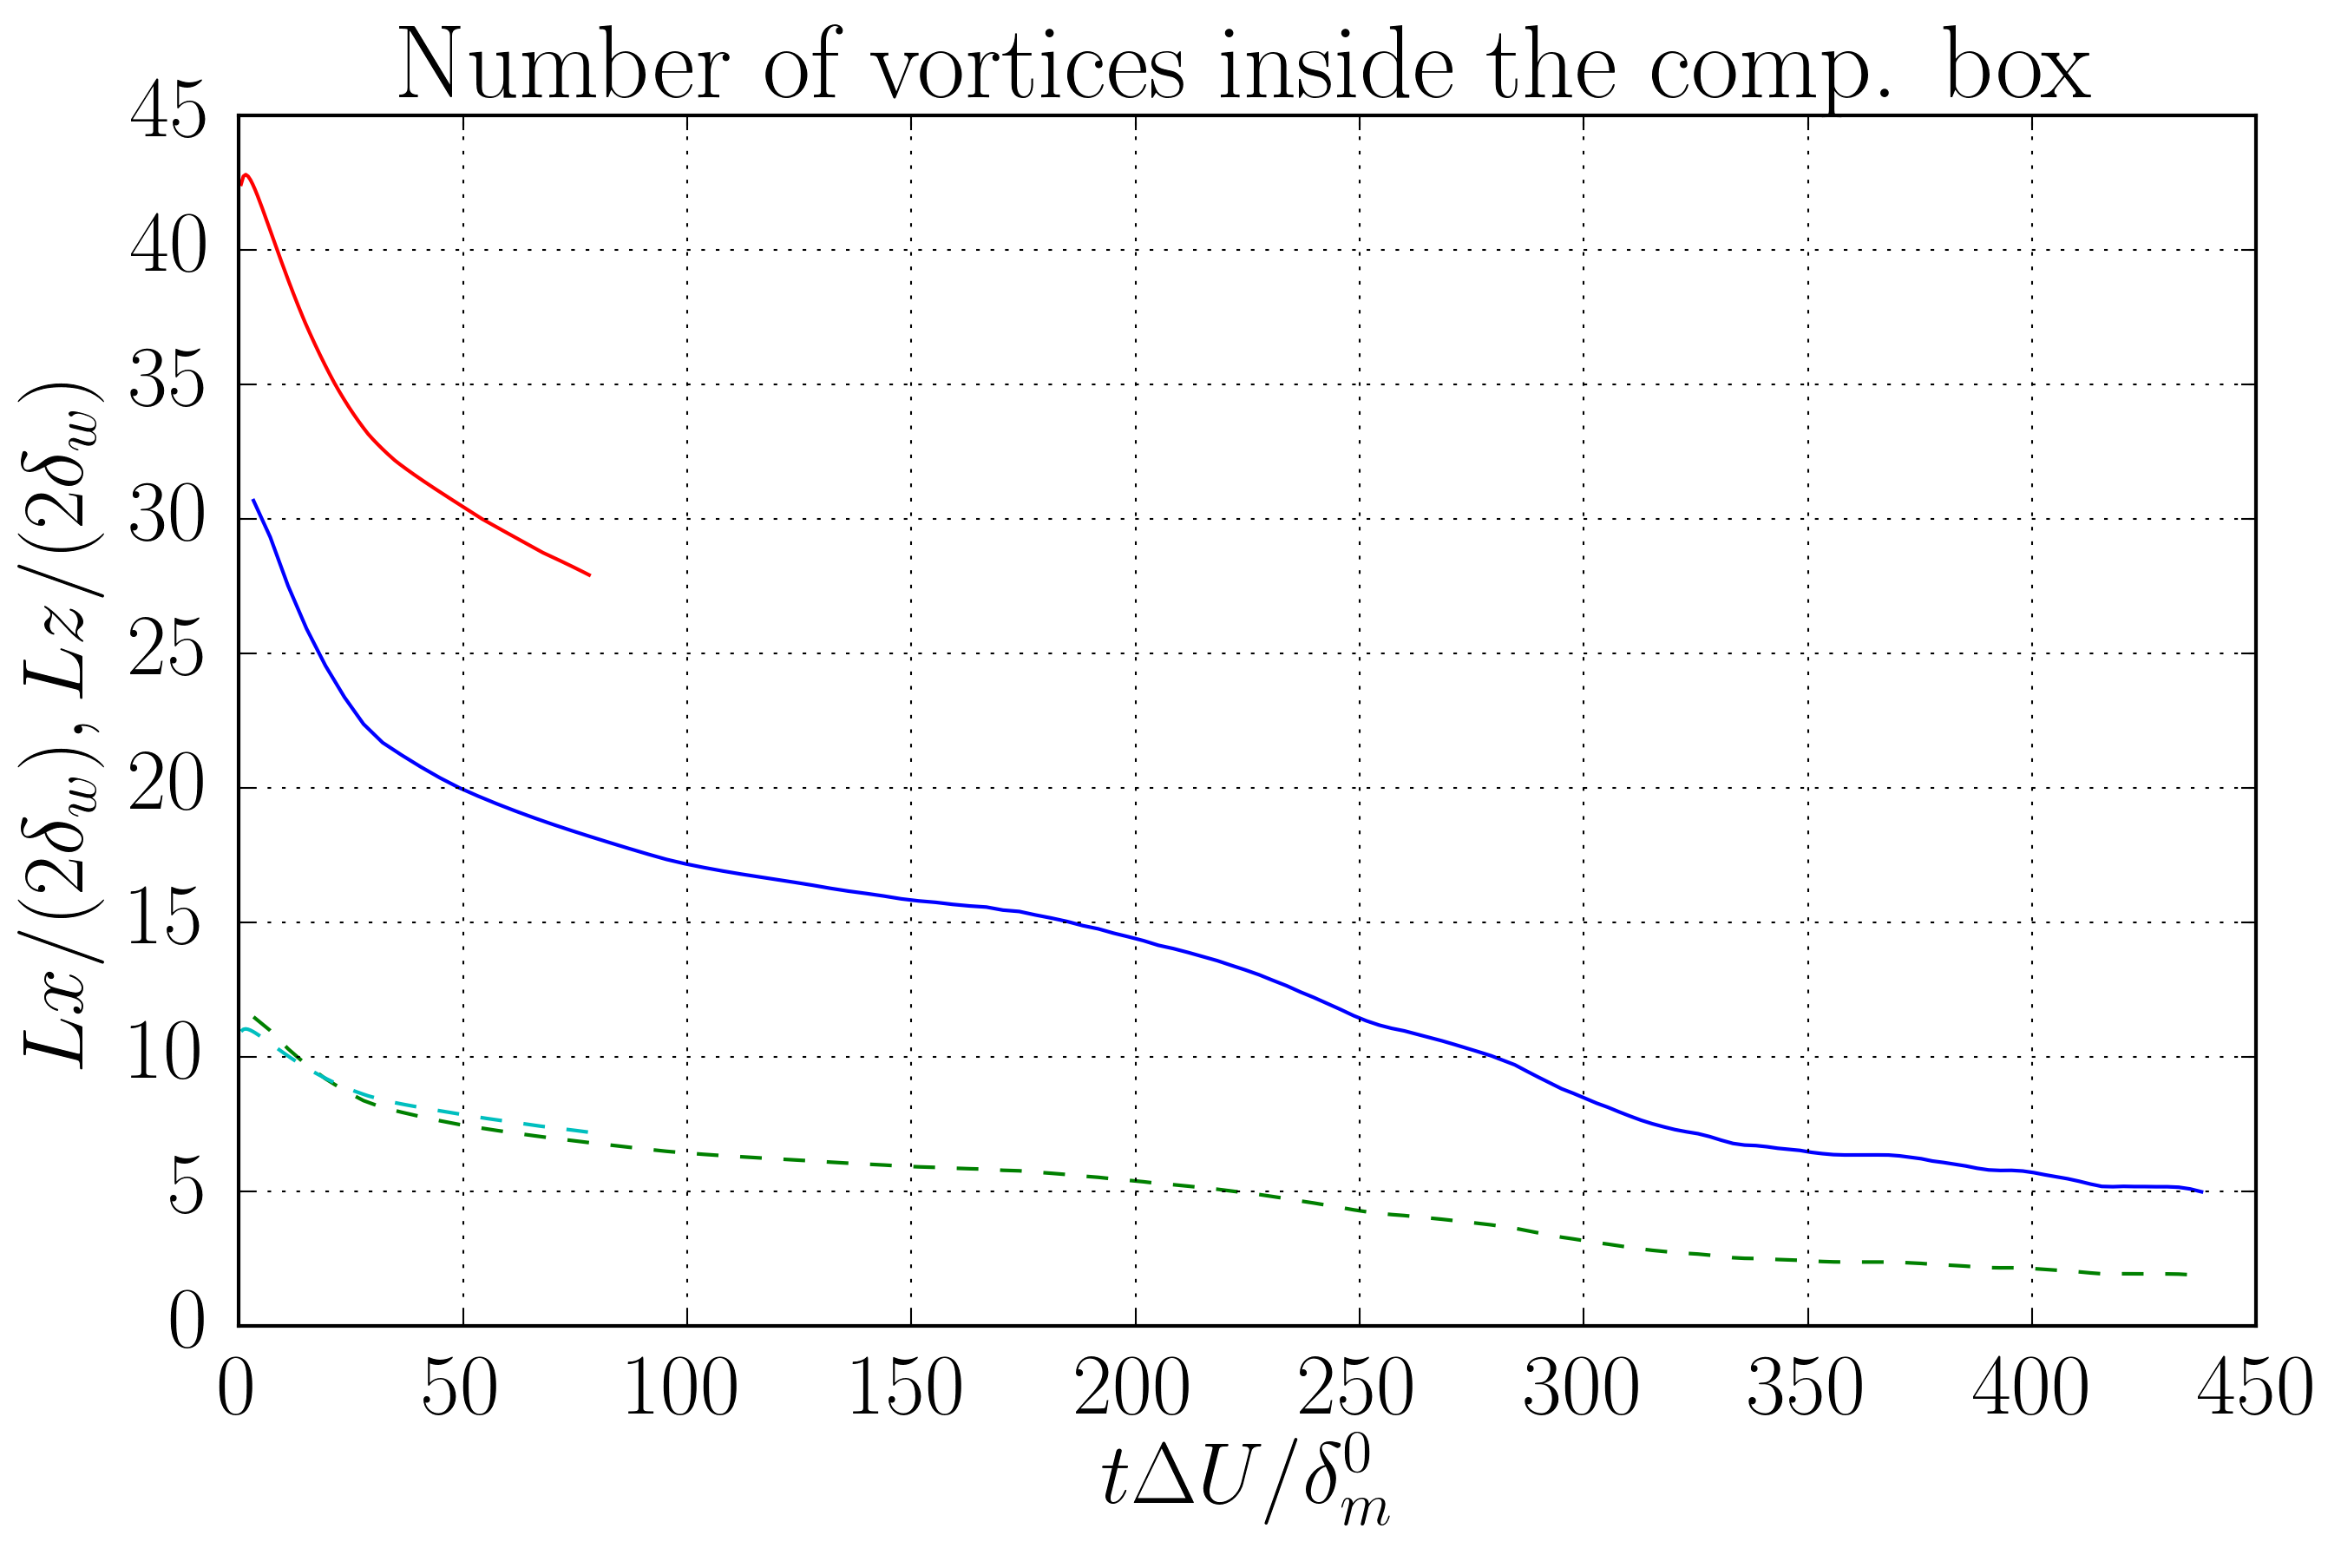

In [414]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'dw'
ylabel = r'$Lx/(2\delta_w),Lz/(2\delta_w)$'
p_folders= ['/share/drive/toni/VDML/s80/test/06/h5.stats','/share/drive/toni/VDML/s80/test/07/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        alp = np.array(f['alp'])
        bet = np.array(f['bet'])
        yf  =np.array(f['y'])
        fun = np.array(f[var]);
    plt.plot(time,2.0*np.pi/alp/(2*fun))
    plt.plot(time,2.0*np.pi/bet/(2*fun),'--')
plt.xlabel(xlabel);plt.ylabel(ylabel)
#plt.ylim([0,5])
plt.title(r'Number of vortices inside the comp. box')
plt.grid('on')

In [646]:
# Read fields

In [83]:
filename = '/share/drive/toni/VDML/s80/test/06/01/linDy045.032';
filename = '/share/drive/toni/VDML/s10/test/00/Pantano.006';
my = 451
my=513
FIELD = read4field(filename,my)

Fiel read correctly :)
time = [ 118.36506653] 
Re = [ 160.] 
alp = [ 0.0187656] 
bet = [ 0.0727] 
mx = [512] 
mz = [127] 
Data from time = [ 118.36506653]
mx = [512], my = [513], mz = [127]


In [84]:
print np.shape(FIELD['psi'])

(1026, 127, 256)


In [112]:
var = 'vor'
for kx in range(10,50,2):
    for kz in range(0,5,1):
        plt.plot(FIELD['y'],(FIELD[var][1::2,kz,kx]))
y = FIELD['y'];
Ly = y[-1]-y[0]


(-1e-05, 1e-05)

In [42]:
my=3001
Ly=340.0
y = np.linspace(-Ly/2.0,Ly/2,my)
kmax = ((0.018765*1024/2/2)**2+(0.072801*191/2)**2)**0.5
print "Lambda x max= %s"% kmax
f = np.exp(-(kmax*(y+Ly/2)))
#plt.plot(y,f,'k*')
print np.diff(y)[0]
[prem1,prem3,dt11,dt12,dt21,dt22,fmap]= compact.derivadas(y,len(y))
dfdy = compact.deryr(f,dt12,prem1,fmap,my)
plt.plot(y,dfdy,'.')
plt.plot(y,f*(-kmax),'g.-')
df2dy2 = compact.deryyr(f,dt22,prem3,my)
#plt.plot(y,df2dy2)
#plt.plot(y,f*kmax**2,'g--')
#plt.plot(y,y)
#plt.yscale('log')
#plt.ylim([-0.00001,0.00001])
plt.xlim([-180,-150])
#plt.xlim([90,130])
kmax = ((2*np.pi/0.0165/768)**2+(2*np.pi/0.042801/288)**2)**0.5
print "Lambda x max= %s"% kmax

Lambda x max= 8.45068473102
0.113333333333
Lambda x max= 0.711102077767


(-0.0001, 0.0001)

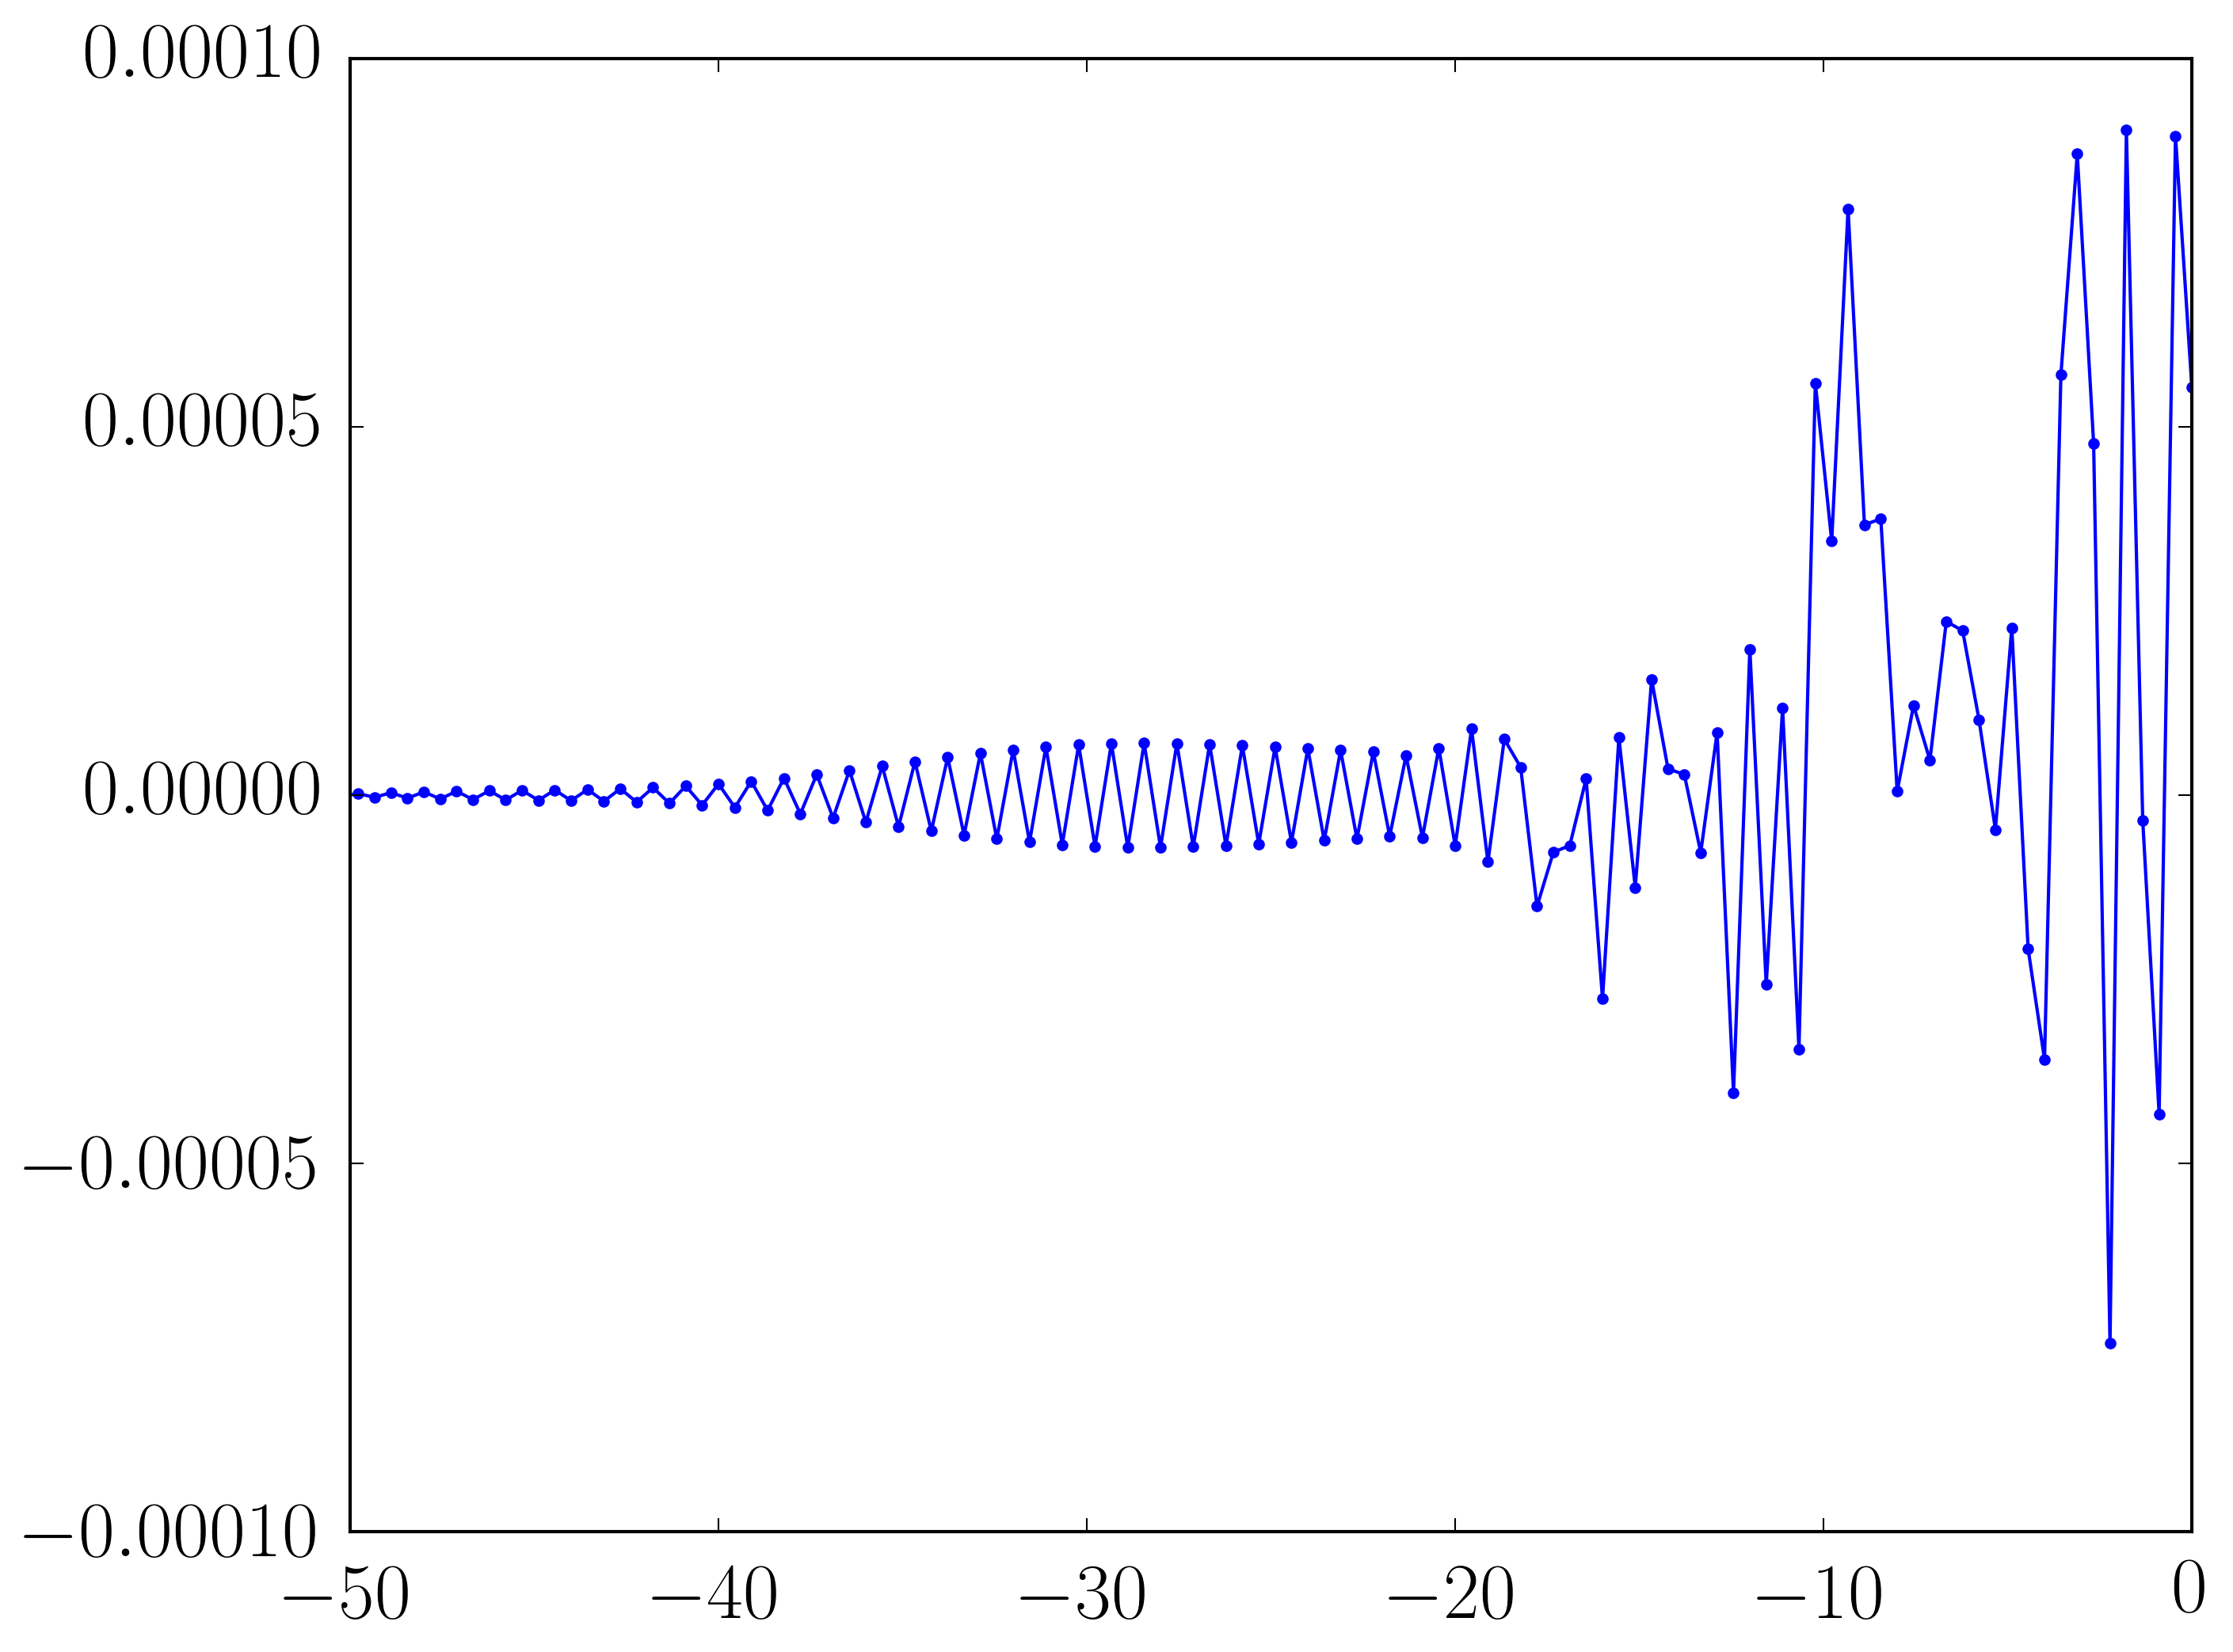

In [30]:
for kx in range(254,255,1):
    for kz in range(190,191,1):
        plt.plot(FIELD['y'],FIELD['phi'][1::2,kz,kx],'.-')
plt.xlim([-50,0])
plt.ylim([-0.0001,0.0001])

(1.9214943731952783e-16, 0.0001)

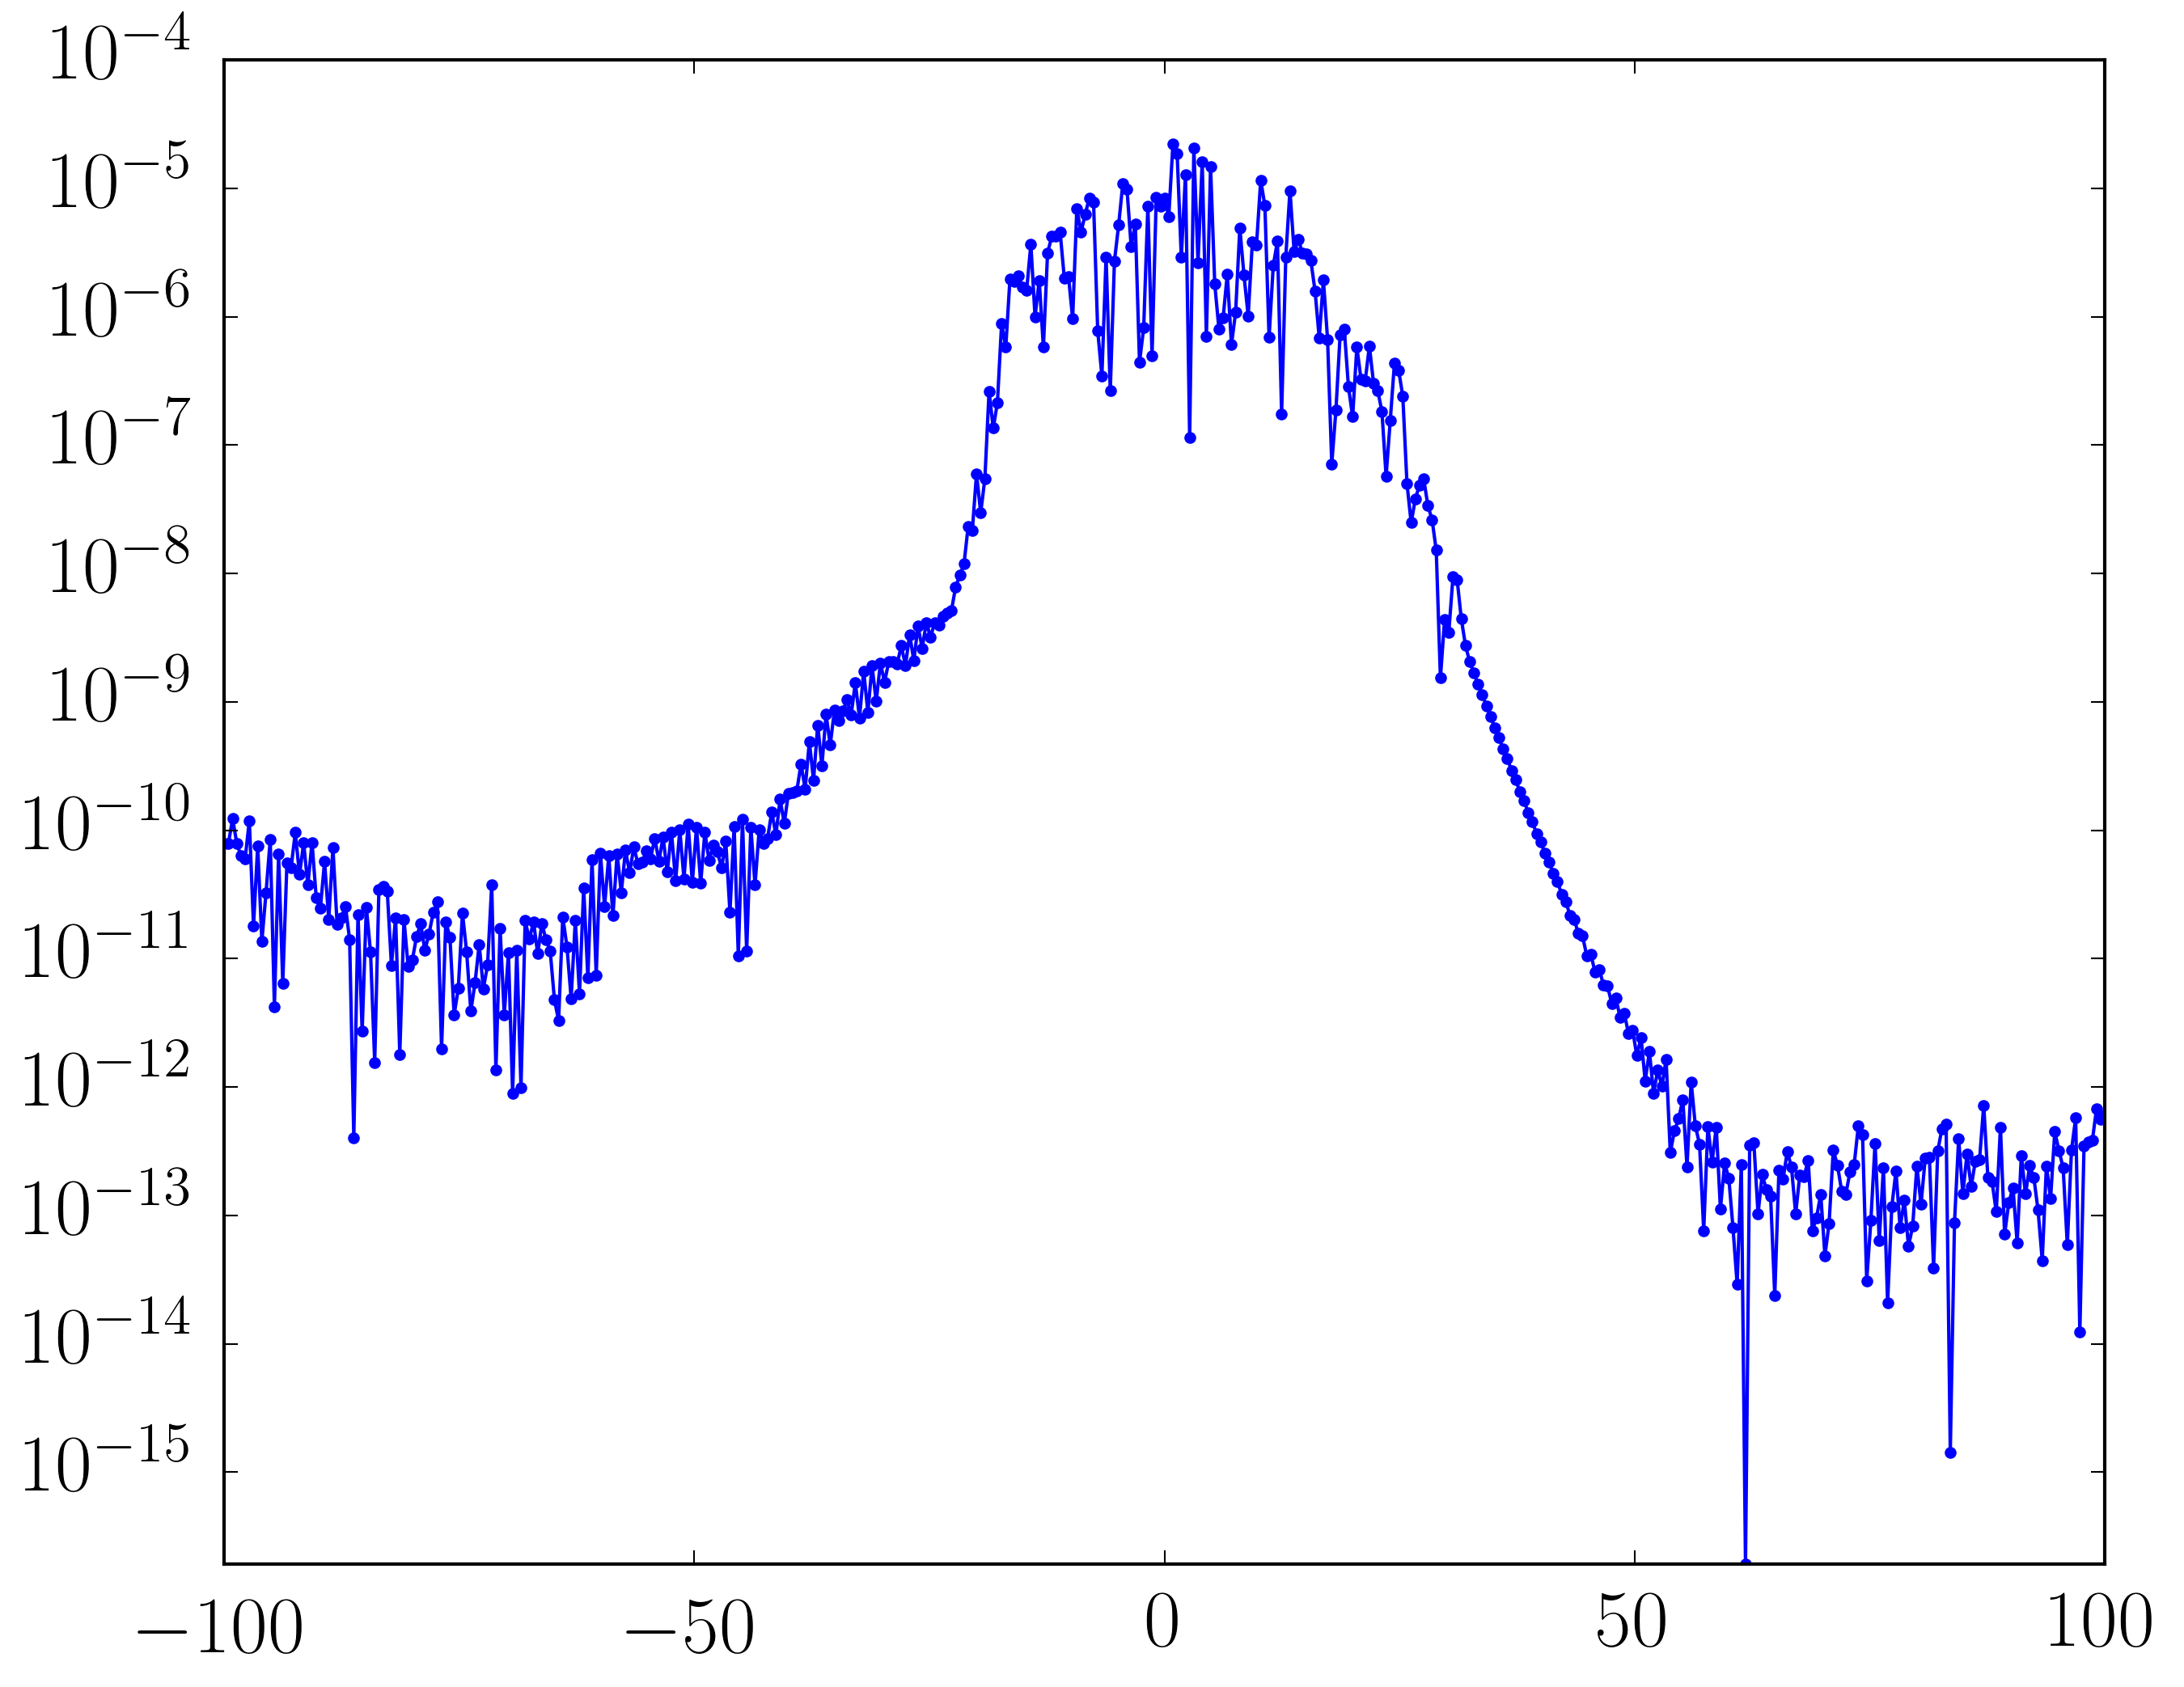

In [81]:
for kx in range(254,255,1):
    for kz in range(190,191,1):
        plt.plot(FIELD['y'],np.abs(FIELD['vor'][1::2,kz,kx]),'.-')
#plt.xlim([-100,0])
plt.yscale('log')
plt.ylim([-0.0001,0.0001])

346.75567627
815.41217041
1101


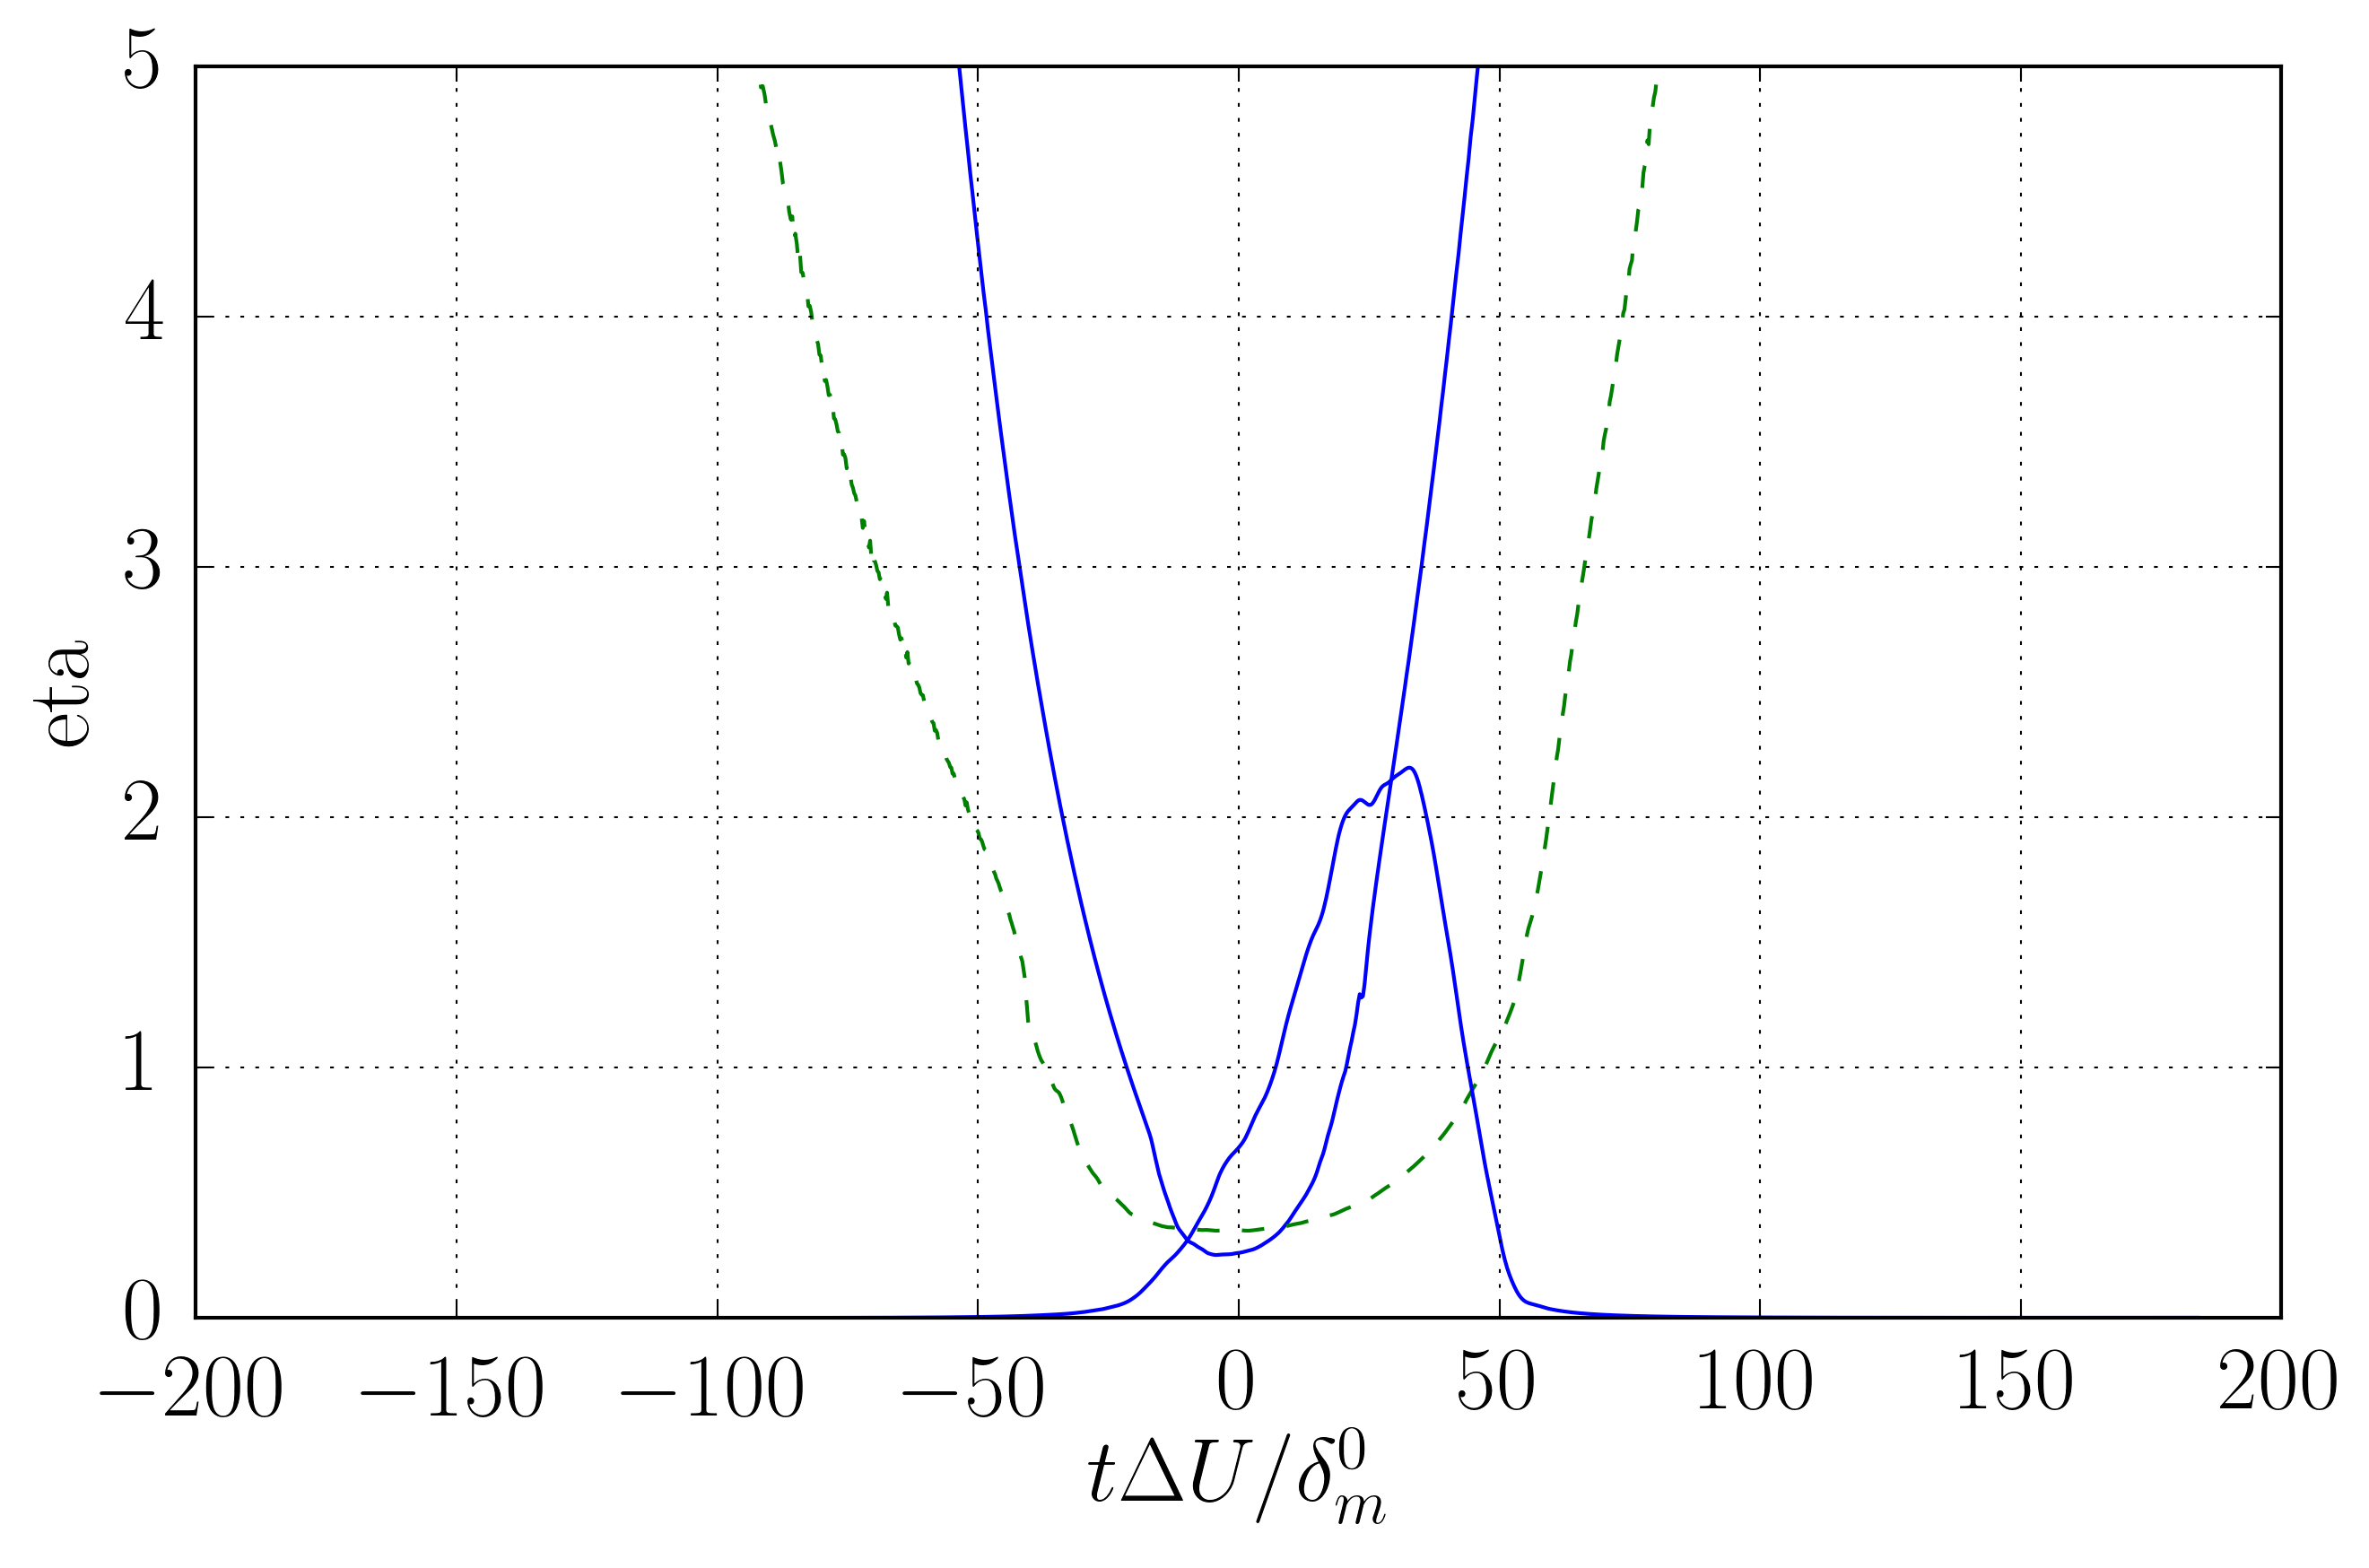

In [738]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'eta'
iobs=-1
ylabel = var
l_style=['b-','g--']
#'/share/drive/toni/VDML/s80/test/06/h5.stats',
p_folders= ['/share/drive/toni/VDML/s80/test/08/h5.stats','/share/drive/toni/VDML/s80/test/08/diffold/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/00/init/h5.stats','/share/drive/toni/Re160s80/case1/y2/h5.stats']
jj=0
vobs=[-1,-1]
for path in p_folders:
    iobs=vobs[jj]
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        bet = np.array(f['bet'])
        yf  =np.array(f['y'])
        fun = np.array(f[var]);
        R11 = np.array(f['R11'])
    plt.plot(yf,fun[:,iobs],l_style[jj])
    print time[iobs]
    jj = jj +1
plt.plot(yf,R11[:,-1]*100)
#plt.yscale('log')
plt.ylim([0.,5])
plt.xlabel(xlabel);plt.ylabel(ylabel)
plt.grid('on')
#plt.xlim([-10,50])
print len(yf)

Lambda x max= 8.45068473102
0.113333333333
Lambda x max= 0.711102077767


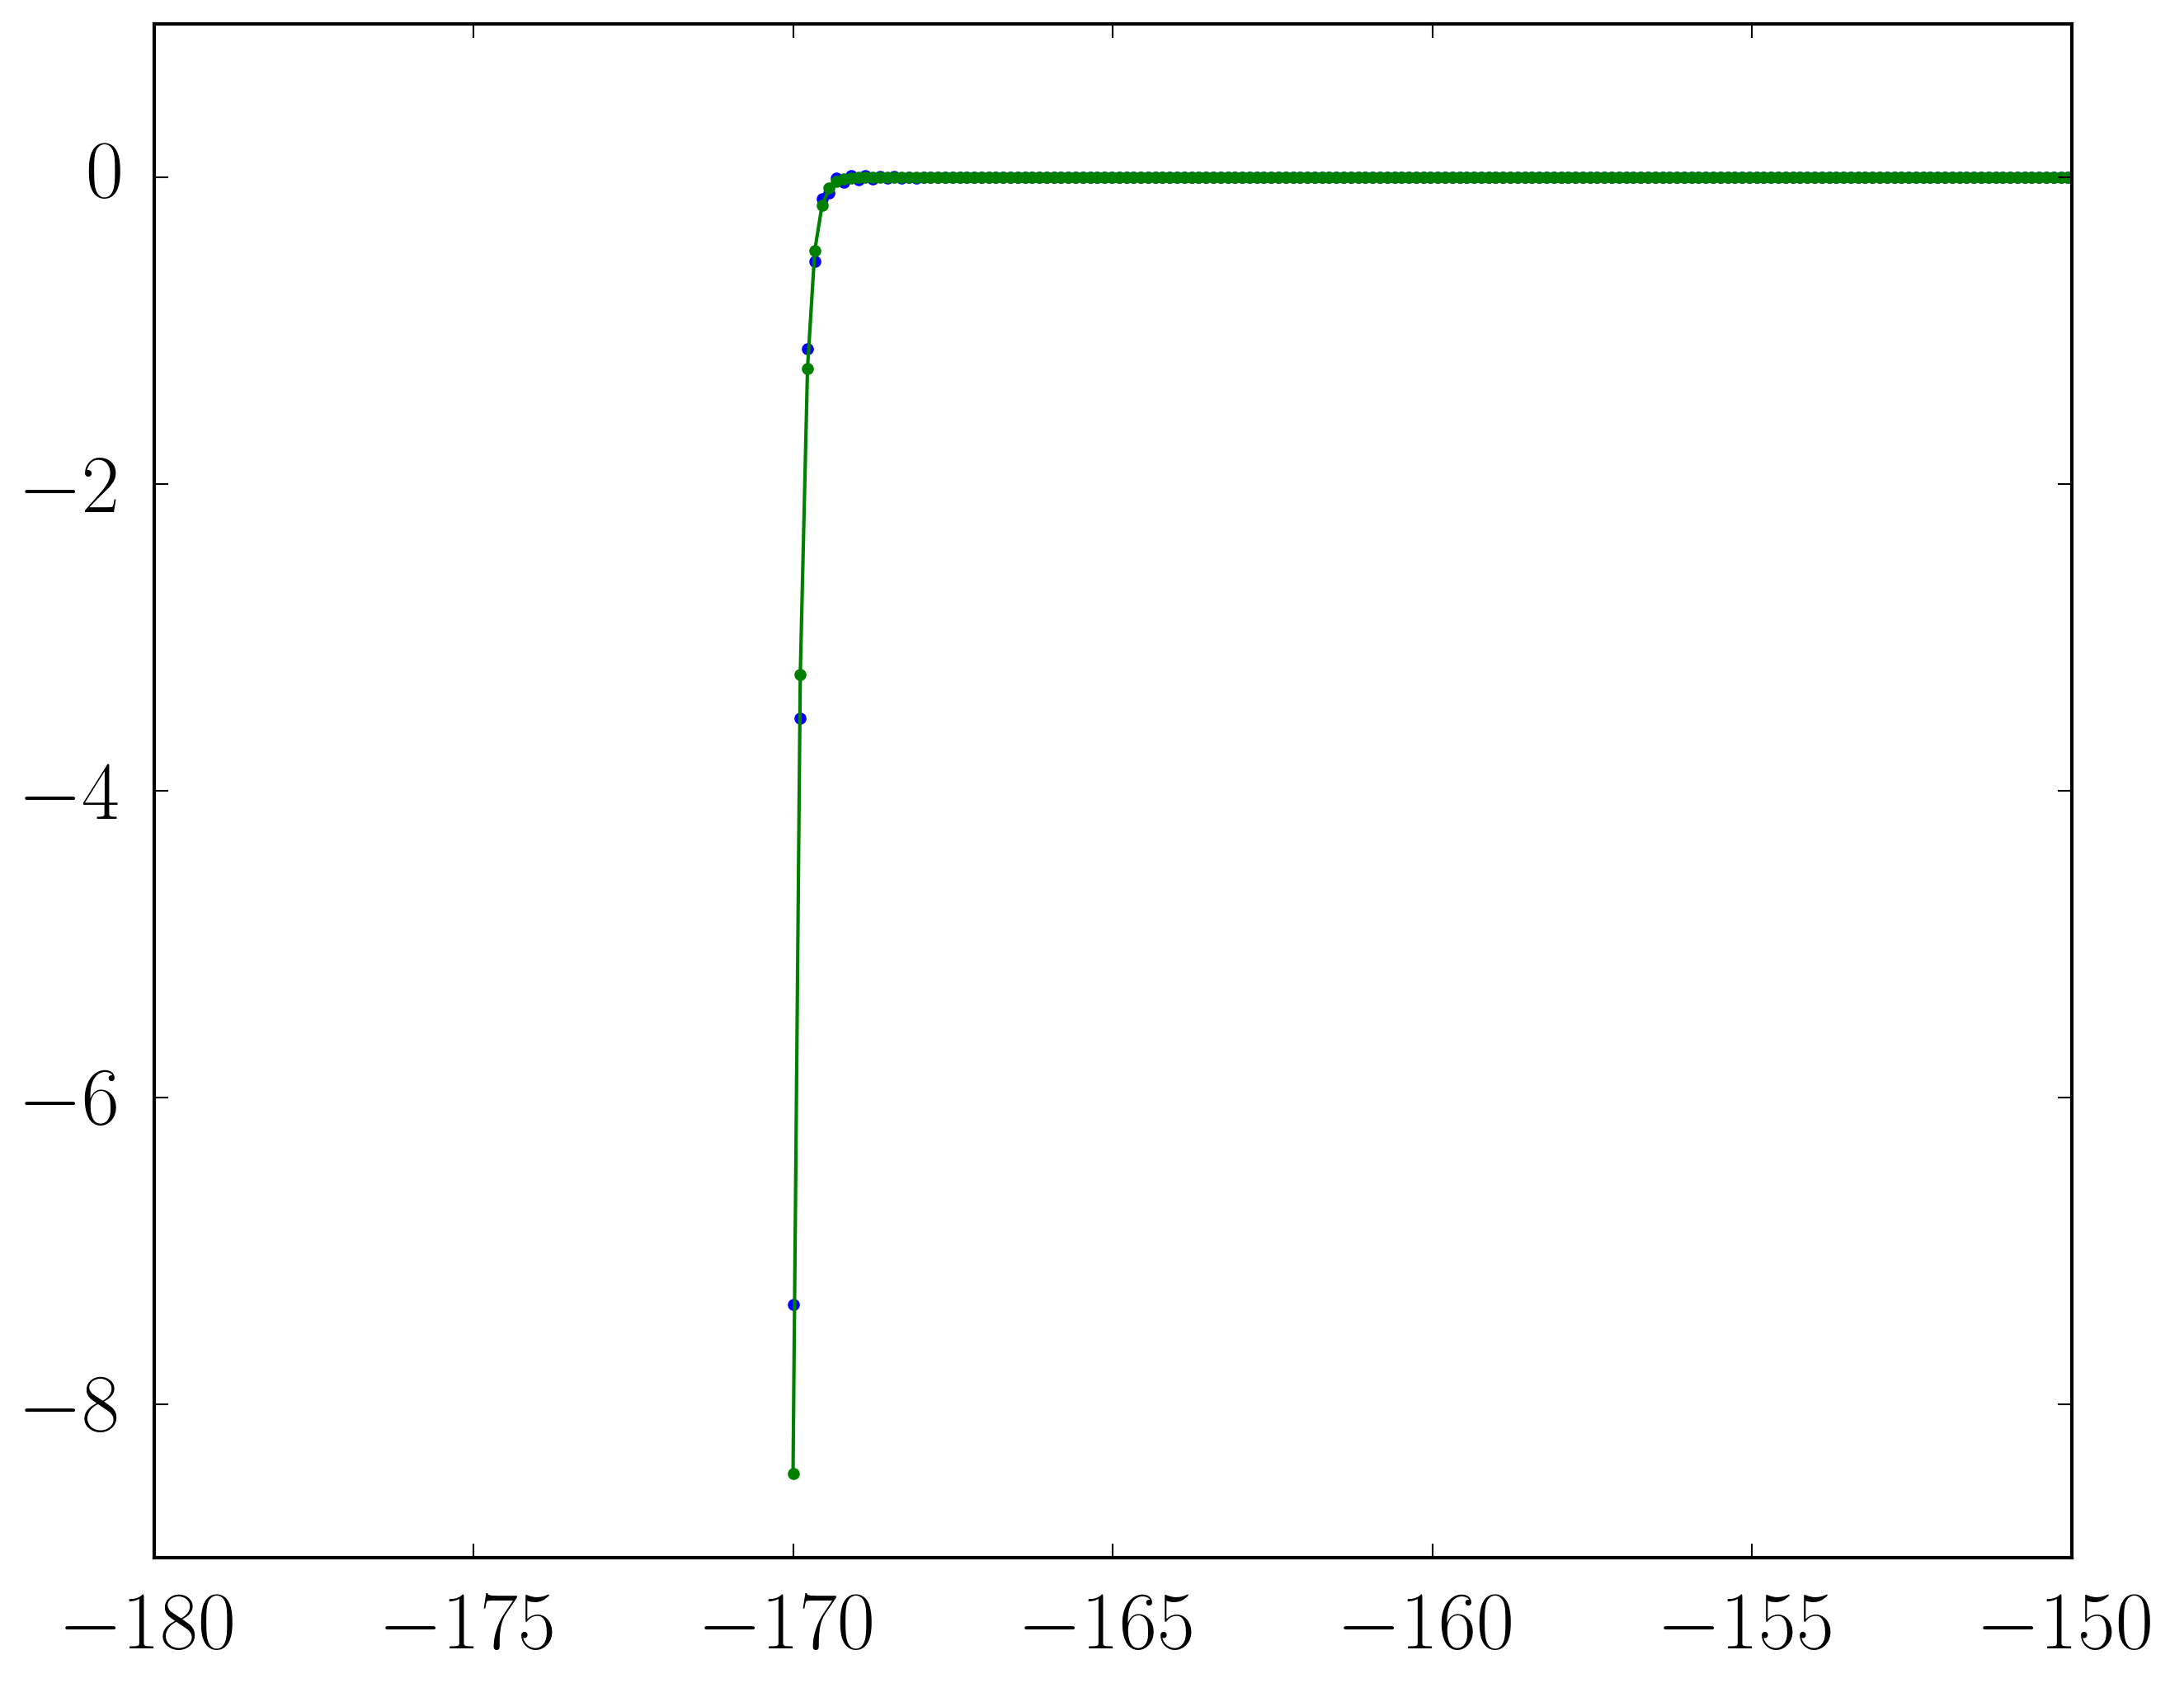

In [191]:
my=3001
Ly=340.0
y = np.linspace(-Ly/2.0,Ly/2,my)
kmax = ((0.018765*1024/2/2)**2+(0.072801*191/2)**2)**0.5
print "Lambda x max= %s"% kmax
f = np.exp(-(kmax*(y+Ly/2)))
#plt.plot(y,f,'k*')
print np.diff(y)[0]
[prem1,prem3,dt11,dt12,dt21,dt22,fmap]= compact.derivadas(y,len(y))
dfdy = compact.deryr(f,dt12,prem1,fmap,my)
plt.plot(y,dfdy,'.')
plt.plot(y,f*(-kmax),'g.-')
df2dy2 = compact.deryyr(f,dt22,prem3,my)
#plt.plot(y,df2dy2)
#plt.plot(y,f*kmax**2,'g--')
#plt.plot(y,y)
#plt.yscale('log')
#plt.ylim([-0.00001,0.00001])
plt.xlim([-180,-150])
#plt.xlim([90,130])
kmax = ((2*np.pi/0.0165/768)**2+(2*np.pi/0.042801/288)**2)**0.5
print "Lambda x max= %s"% kmax

In [1447]:
768.0/16

48.0

In [55]:
40.0/0.227

176.21145374449338

# Create mesh function

In [14]:
from numpy import *

In [21]:
cumsum?

# First limit

In [230]:
Ly=40.0
npoints=501

In [231]:
lim=15
A = np.array([[lim**3, lim**4],[3*lim**2,4*lim**3]])
print A

[[ 3375 50625]
 [  675 13500]]


In [232]:
Dy0=0.022
k=2.5;
mright = 0.009;#value of second derivative
b = np.array([(k-1)*Dy0,mright])
x = np.linalg.solve(A, b)

In [233]:
y=np.linspace(0,Ly/2,npoints)
Dy1 = Dy0 + x[0]*y**3+x[1]*y**4
D = x[0]
E = x[1]
Dylim =  Dy0 + x[0]*lim**3+x[1]*lim**4
ilim = np.where(y<=lim)[0][-1]
print ilim
#y1 = (Dy0*y[:ilim]+x[0]*y[:ilim]**4/4.0+x[1]*y[:ilim]**5/5.0)/y[ilim]*lim
#plt.plot(y1[1:],np.diff(y1))

375


# second limit

In [234]:
lim2=0.85*Ly/2;
#Dy(y) = A + B*y
#Dy(lim=Dy1[-1])
#Dy'(lim) = mright
#1)
#Dy (lim) = A + B*lim
#dotDy(lim)=B
B = mright;
A = Dylim-mright*lim
#y2=np.linspace(0,Ly/2,npoints)
#Dy2=0
Dy2 = A+B*y
print A
Dy2lim2=A+B*lim2
ilim2 = np.where(y<=lim2)[0][-1]
print ilim2

-0.08
425


# Third limit

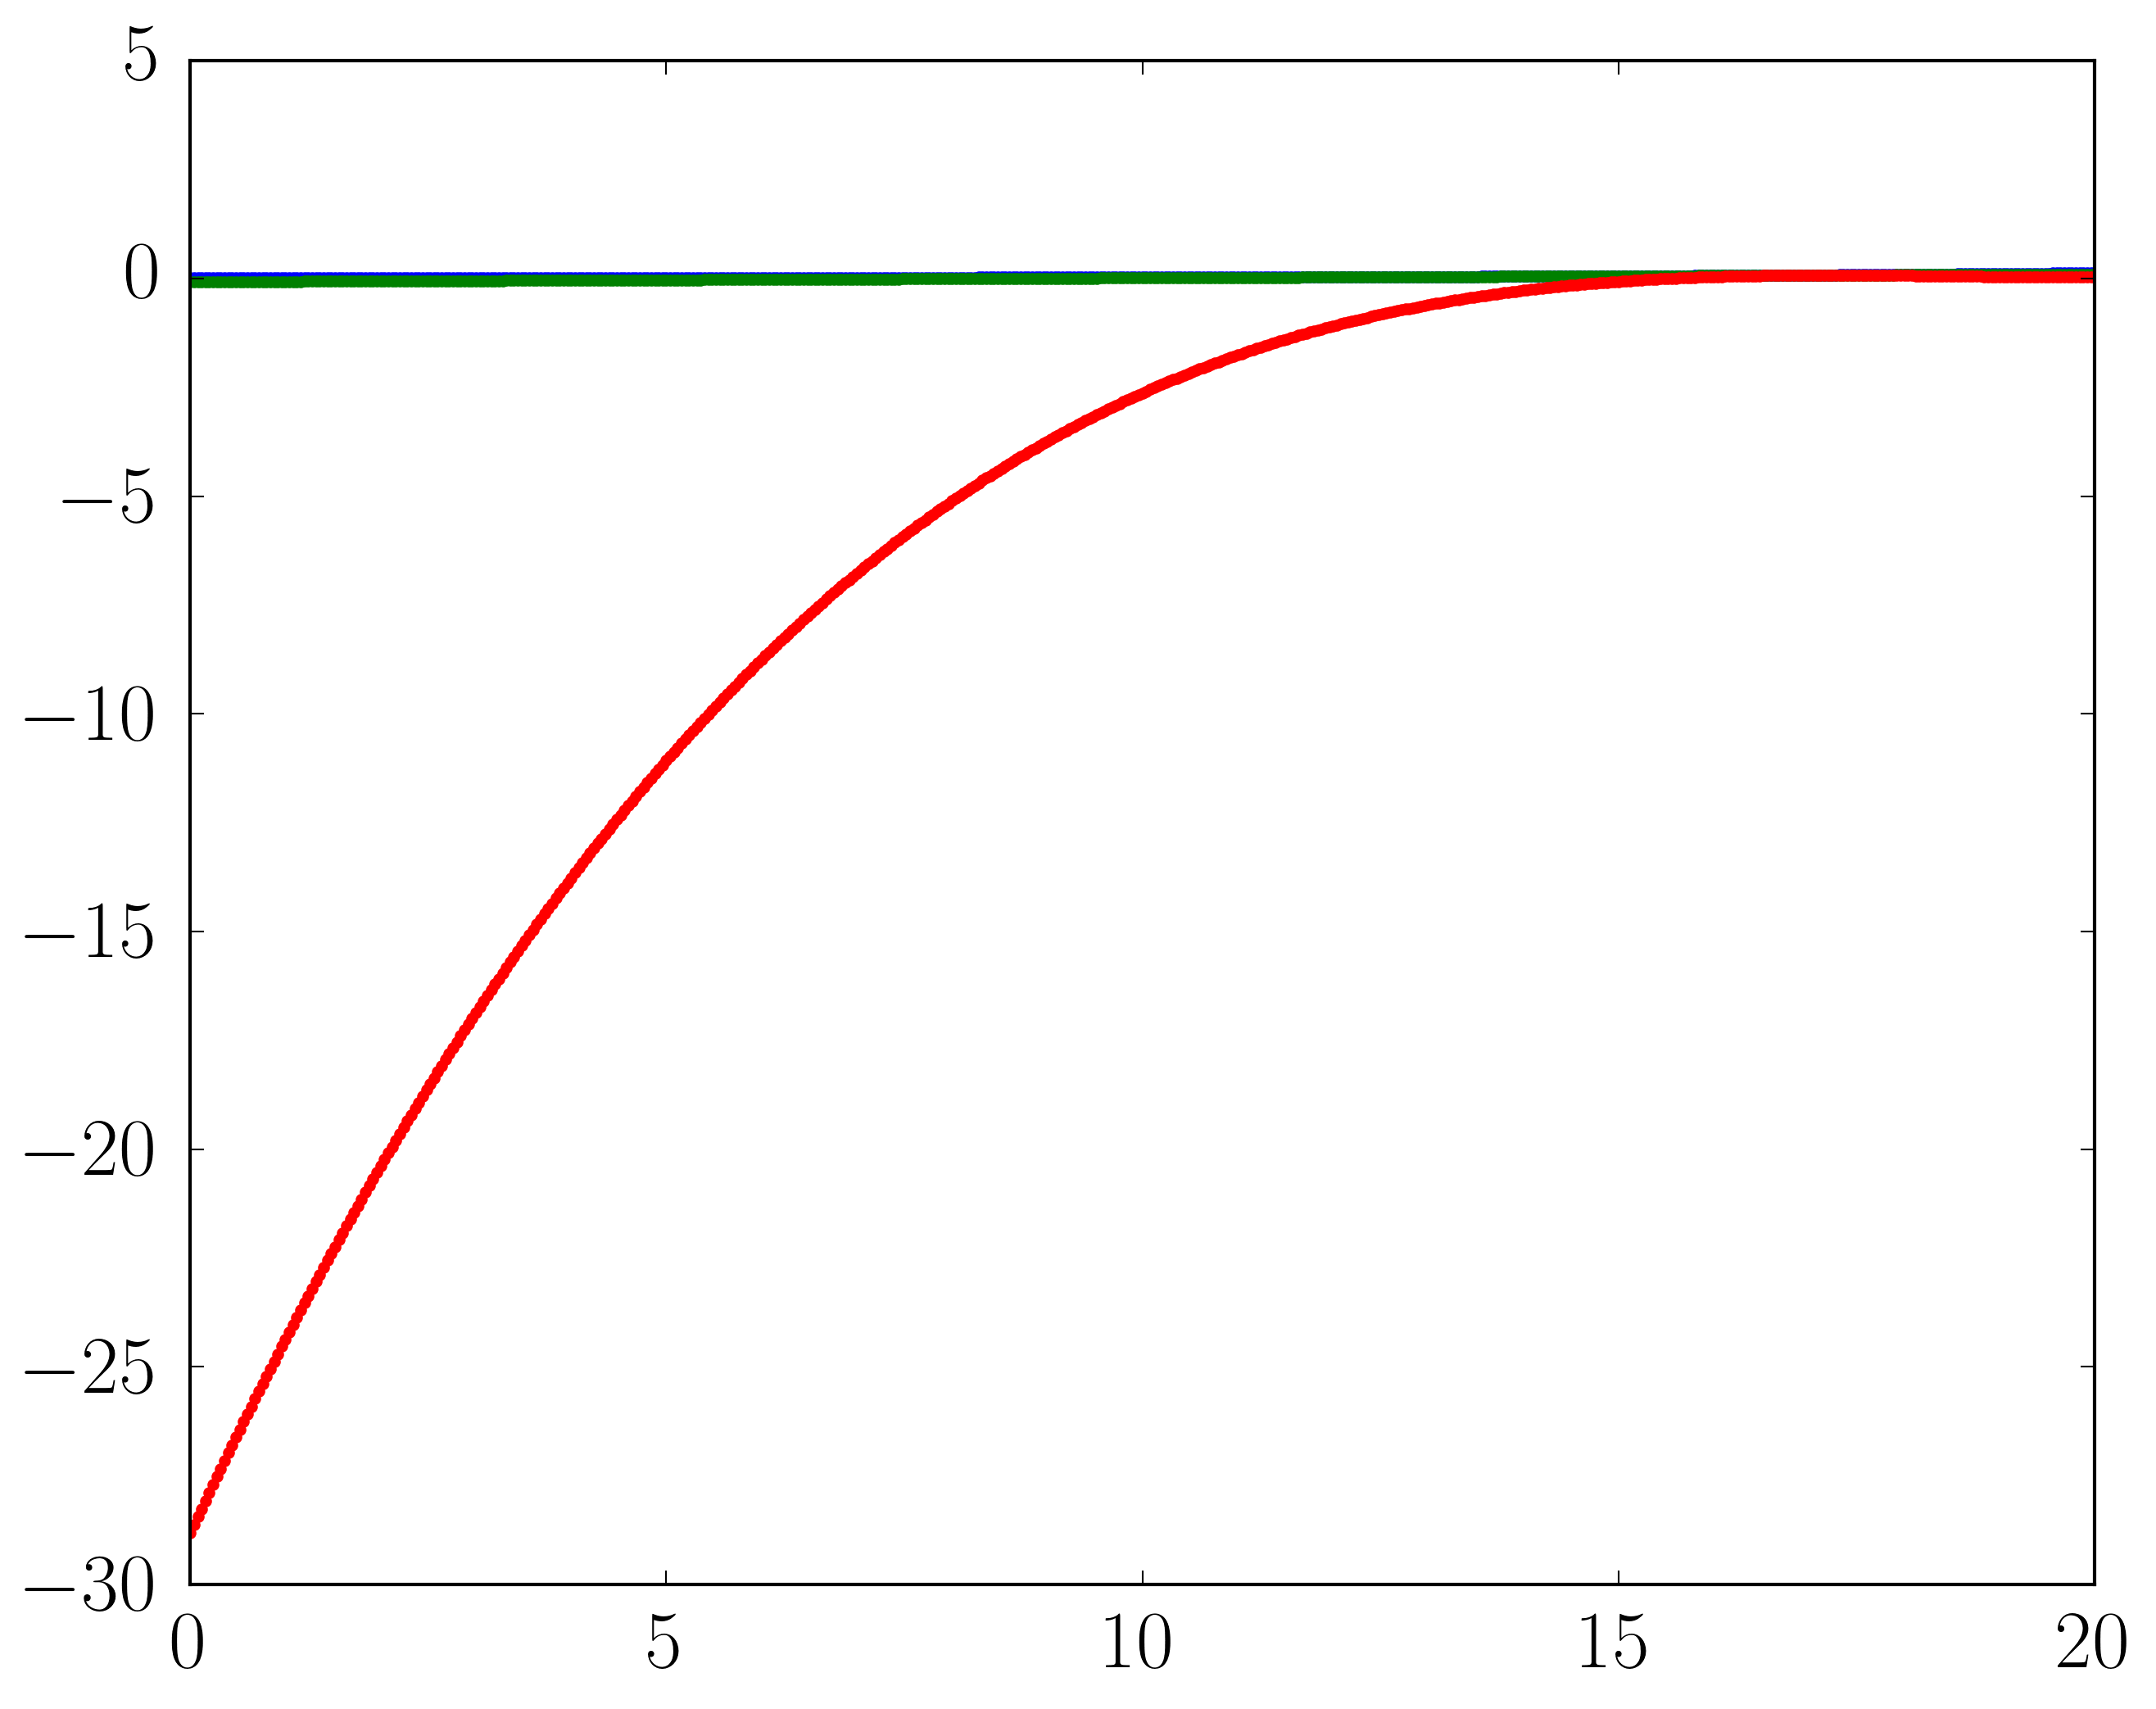

In [235]:
#Dy3 = A + B y + C y**2 + Dy**3
#Dy2(lim2)= A + B*lim2 + C*lim2**2 + D*lim2**3
#B = B' + 2*C*lim2+3*D*lim2**2
#Dy3(L)= A + B*y(L) + C*y(L)**2 + D*y(L)**3
#0 = B' + 2*C*y(L)+ 3*D*y(L)**2
L=Ly/2.0
Dyf = 0.025
A = [[1,lim2,lim2**2,lim2**3],[0.0,1,2*lim2,3*lim2**2],[1,L,L**2,L**3],[0,1,2*L,3*L**2]]
b = [Dy2lim2,B,Dyf,0]
x = np.linalg.solve(A, b)
#y3 = np.linspace(lim2,L,npoints3)
#y3 = np.linspace(lim2,L,80)
Dy3 = x[0]+x[1]*y+x[2]*y**2+x[3]*y**3
plt.plot(y,Dy1,'.')
plt.plot(y,Dy2,'.')
plt.plot(y,Dy3,'.')




In [236]:
Dy = r_[Dy1[0:ilim],Dy2[ilim:ilim2],Dy3[ilim2:]]

500


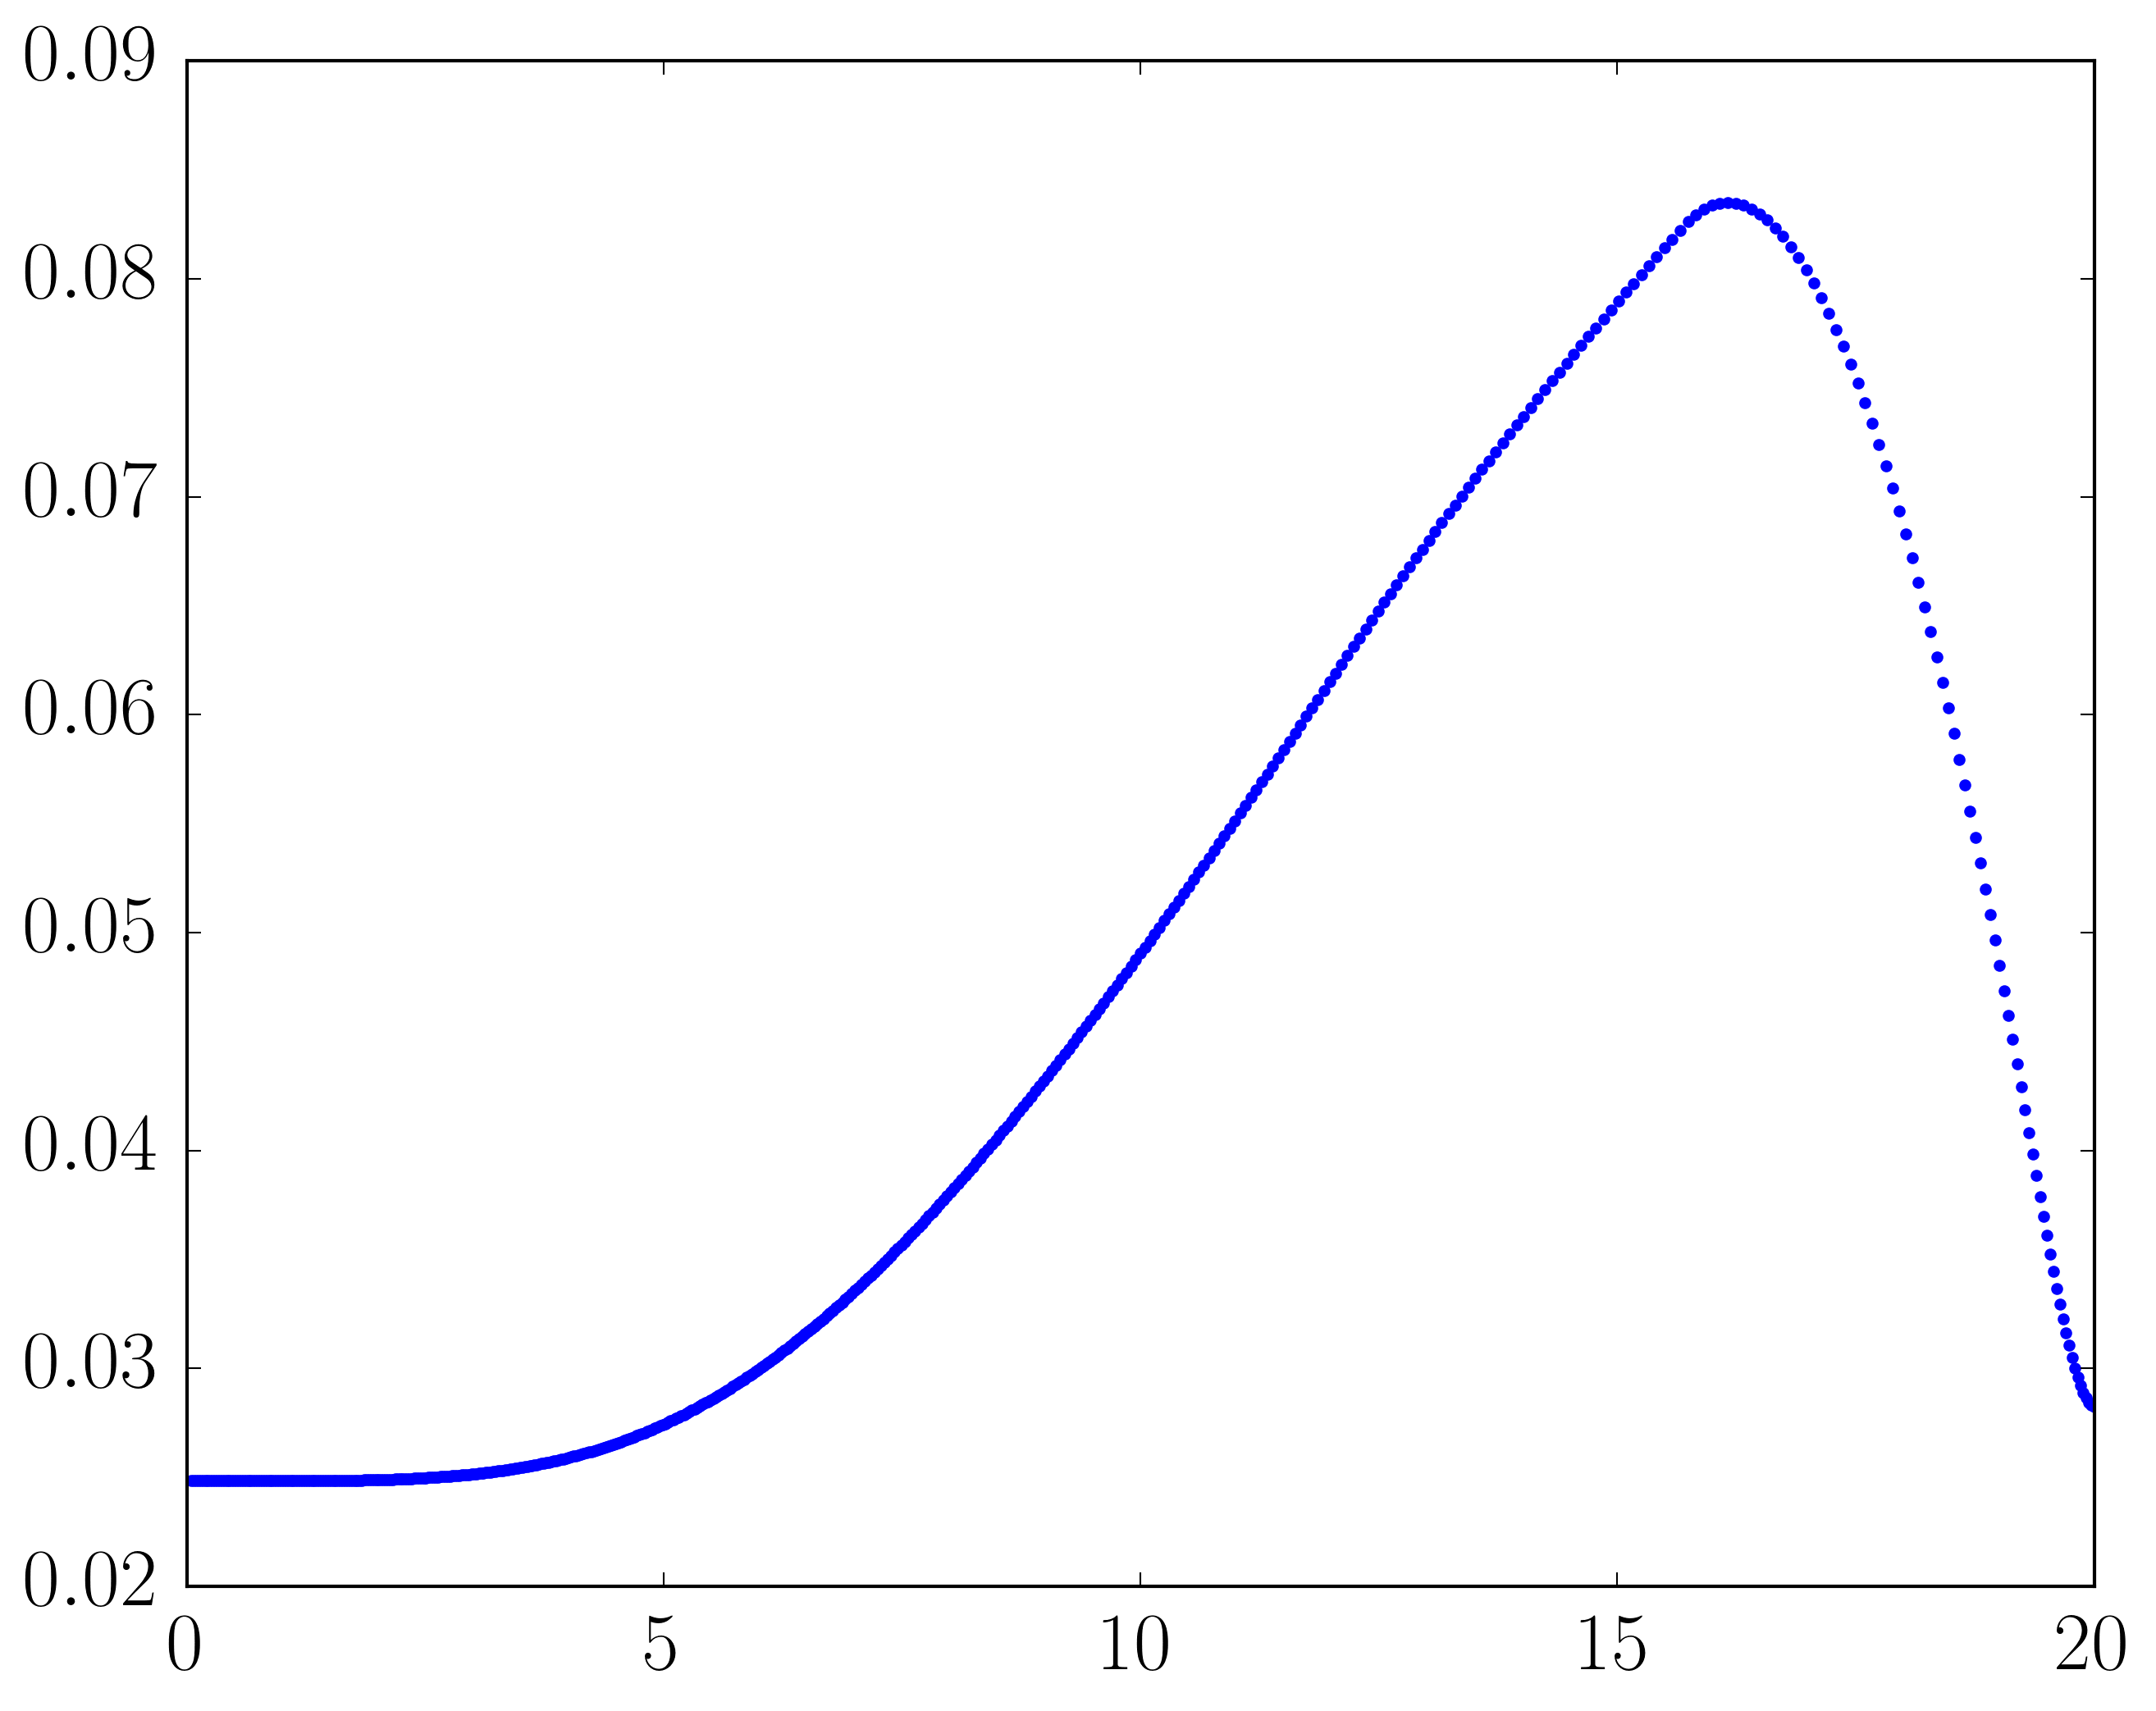

In [237]:
y2= np.array(cumtrapz(Dy))
Ly2=40.0
y2=y2/y2[-1]*(Ly2/2)
plt.plot(y2[1:],np.diff(y2),'b.')
print len(y2)

In [238]:
l_style=['k','b','g','r']

1001
0.0
[-0.02484121  0.          0.02484121]
0.975345876481 1.02527731353
815.41217041
322.979034424
0.028245650498 0.0248410076588


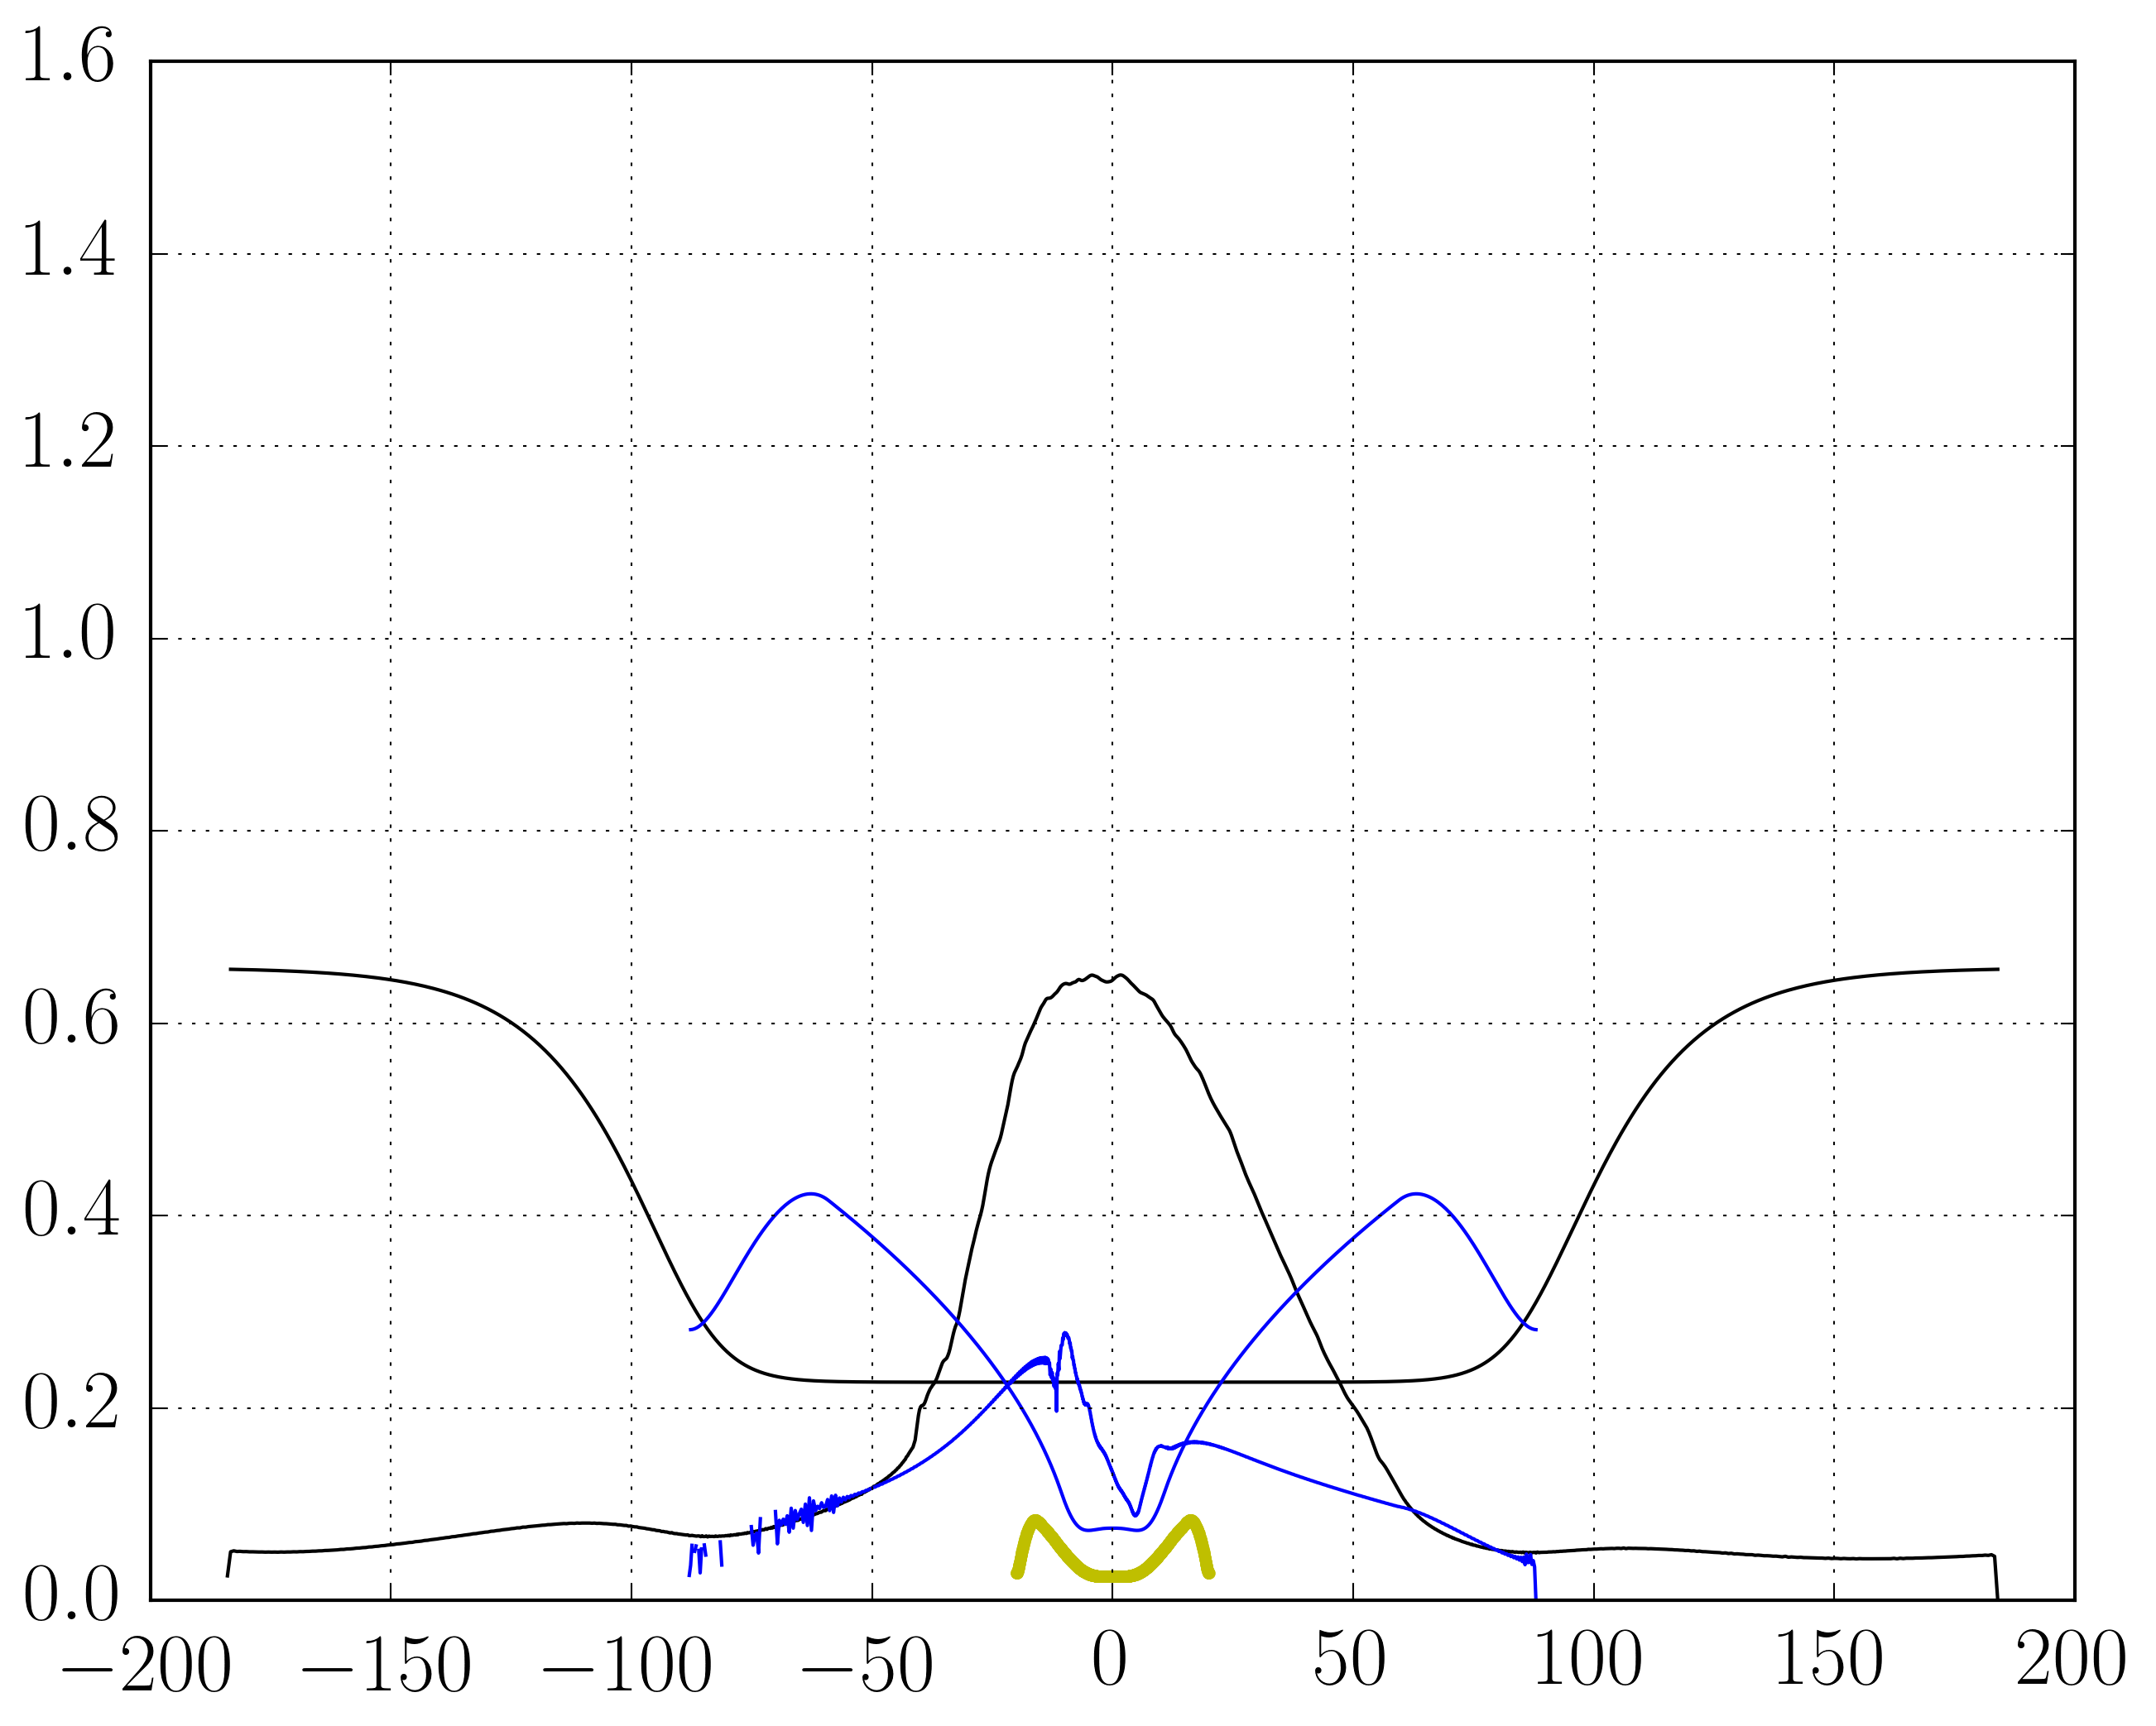

In [239]:
ynew = np.zeros(2*len(y2)+1)
mynew = len(ynew)

print mynew
ynew[0:mynew/2] = -y2[::-1]
ynew[mynew/2+1:mynew] = y2[0:len(y2)+1]
print ynew[mynew/2]
#print ynew[mynew/2]     
#ynew[mynew/2]=0
#for j in range(mynew/2,mynew):
#    ynew[j] = y[j]
#print range(mynew/2+1,mynew-1)
print ynew[len(ynew)/2-1:len(ynew)/2+2]
Dy = np.diff(ynew);
print np.min(Dy[1:]/Dy[:-1]),np.max(Dy[1:]/Dy[:-1])
#p_folders= ['/share/drive/toni/Re160s80/case1/y2/h5.stats']
p_folders= ['/share/drive/toni/Re160s80/case1/y2/h5.stats','/share/drive/toni/RML/Re480/h5.stats']
#p_folders= ['/share/drive/toni/VDML/s80/test/00/h5.stats']
jj=0
var ='dyeta'
vobs=[-1,-1]
for path in p_folders:
    iobs=vobs[jj]
    with h5py.File(path,"r") as f:
        yf  =np.array(f['y'])
        [prem1,prem3,dt11,dt12,dt21,dt22,fmap]= compact.derivadas(yf,len(yf))
        time=np.array(f['time'])
        bet = np.array(f['bet'])
        fun = np.array(f[var]);
        R11 = np.array(f['R11'])
        Tm  = np.array(f['um'])  
    #dTdy = compact.deryr(Tm[:,-1],dt12,prem1,fmap,len(yf))
    #plt.plot(yf,dTdy,l_style[jj])
    plt.plot(yf,fun[:,iobs],l_style[jj])
    plt.plot(yf[1:],np.diff(yf),l_style[jj])
    print time[iobs]
    jj = jj +1
plt.ylim([0,1.6])
plt.plot(ynew[1:],np.diff(ynew),'y.-')
plt.grid('on')
print np.diff(ynew)[-1],np.min(np.diff(ynew))
#plt.plot(yf,R11[:,-1]*100)

In [240]:
print len(ynew)

1001


In [245]:
512*1.5*1.5

1152.0

In [243]:
filename ='/home/toni/bm_my1001.txt'
np.savetxt(filename, ynew)

In [368]:
1152/1.5/2/24.0

16.0

In [401]:
2*np.pi/0.046009131/1151

0.11864802520338866

In [131]:
filename ='/home/toni/Ly368Dy020my851.txt'
np.savetxt(filename, ynew)

# This will go to test/03

In [660]:
filename ='/home/toni/higherBs813.txt'
np.savetxt(filename, ynew)

# Test with higher mid same Boundaries

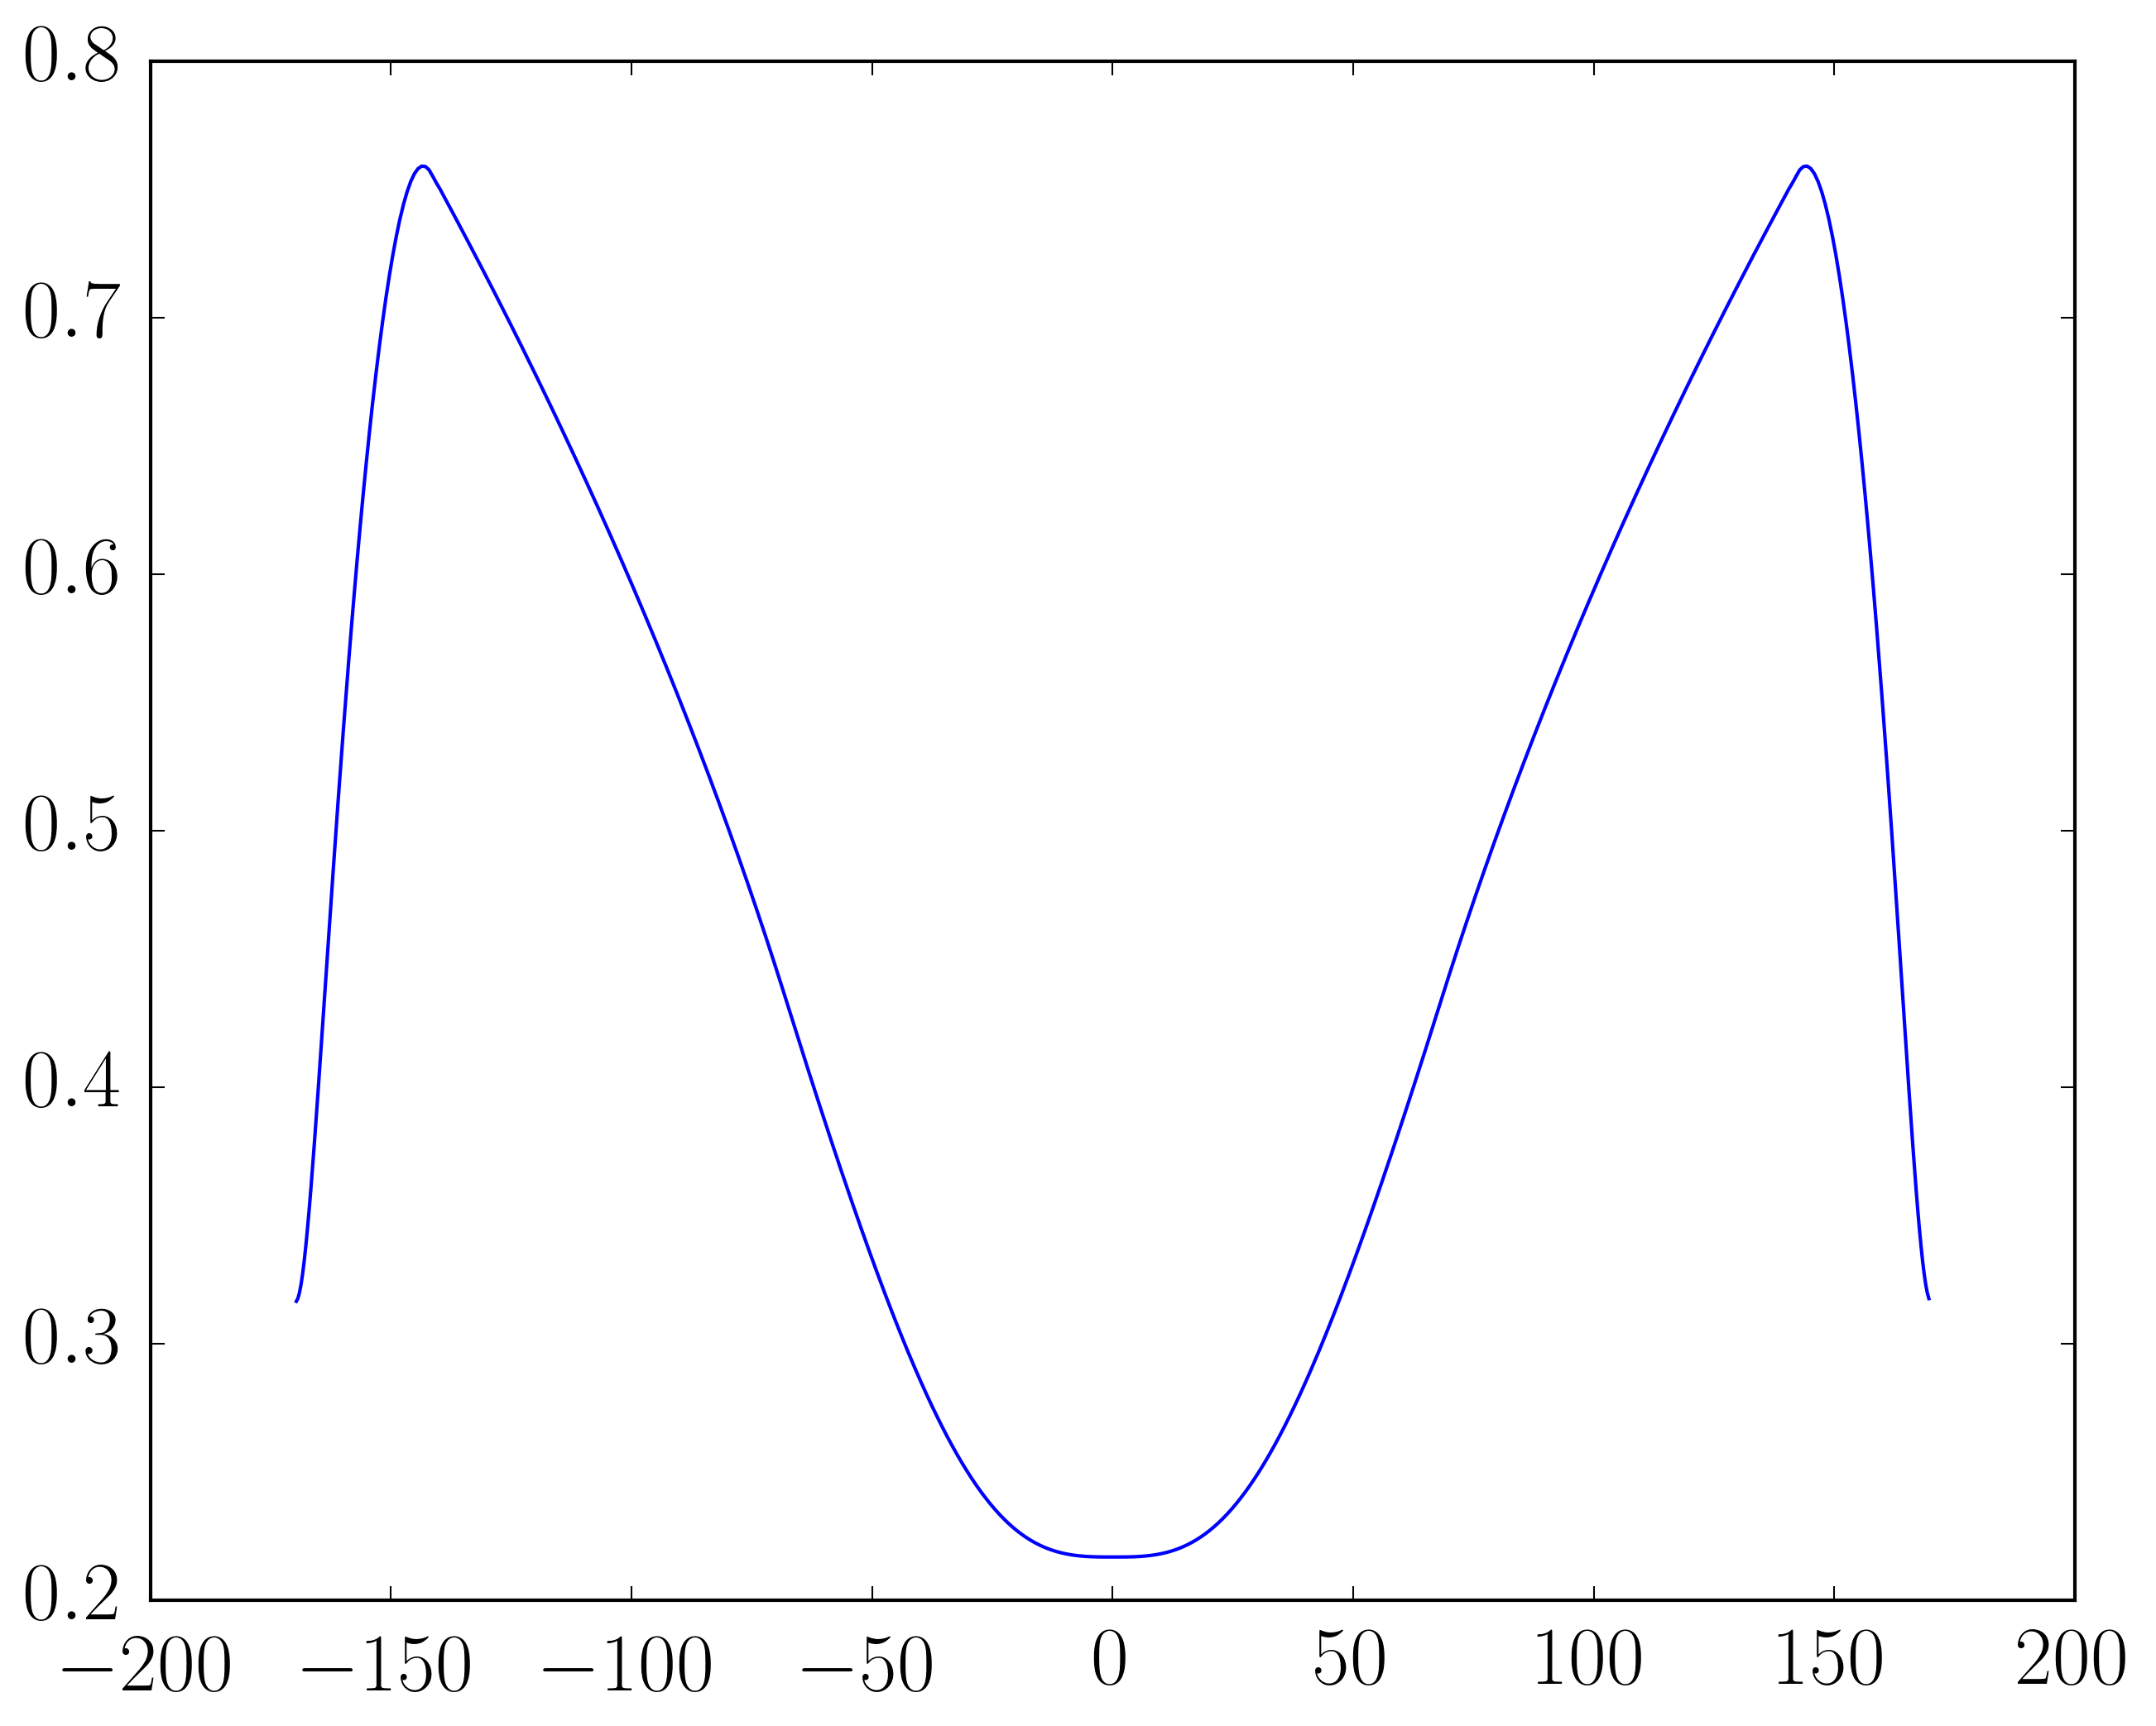

In [704]:
filename ='/home/toni/highmid851.txt'
kk = np.loadtxt(filename)
plt.plot(kk[1:],np.diff(kk))

In [1089]:
128/2*3*1.5

288.0

In [1091]:
print 2*np.pi/0.0187656/767, 2*np.pi/0.07270/191

0.436537995151 0.452493234564


In [135]:
filename ='/home/toni/spline761.txt'
np.savetxt(filename, ynew)

In [85]:
48*(1.+2*288.0/768)**0.5

63.49803146555018

In [66]:
print len(yf)

551


In [292]:
Dxfou = (345.0/511); print Dxfou

0.675146771037


In [50]:
# creating a mesh with Dy = 0.45 constantly for checking
my=451;
Ly=200.0
y=create_mesh1D(Ly/2.0,my,'line',0.23,'/home/toni/test06_045.txt',0.55,0.05)

In [290]:
print np.min(np.diff(y))

0.22395889786


In [291]:
print 129.0/257

0.501945525292


In [302]:
my=401;
Ly=129.0
y=create_mesh1D(Ly/2.0,my,'tanh',-0.25,'/home/toni/testPantano.txt',0.44,0.09)
Dy = np.diff(y)
print np.min(Dy[1:]/Dy[:-1]),np.max(Dy[1:]/Dy[:-1])
print np.min(Dy)

0.981136419485 1.01922625655
0.22395889786


0.500017092412


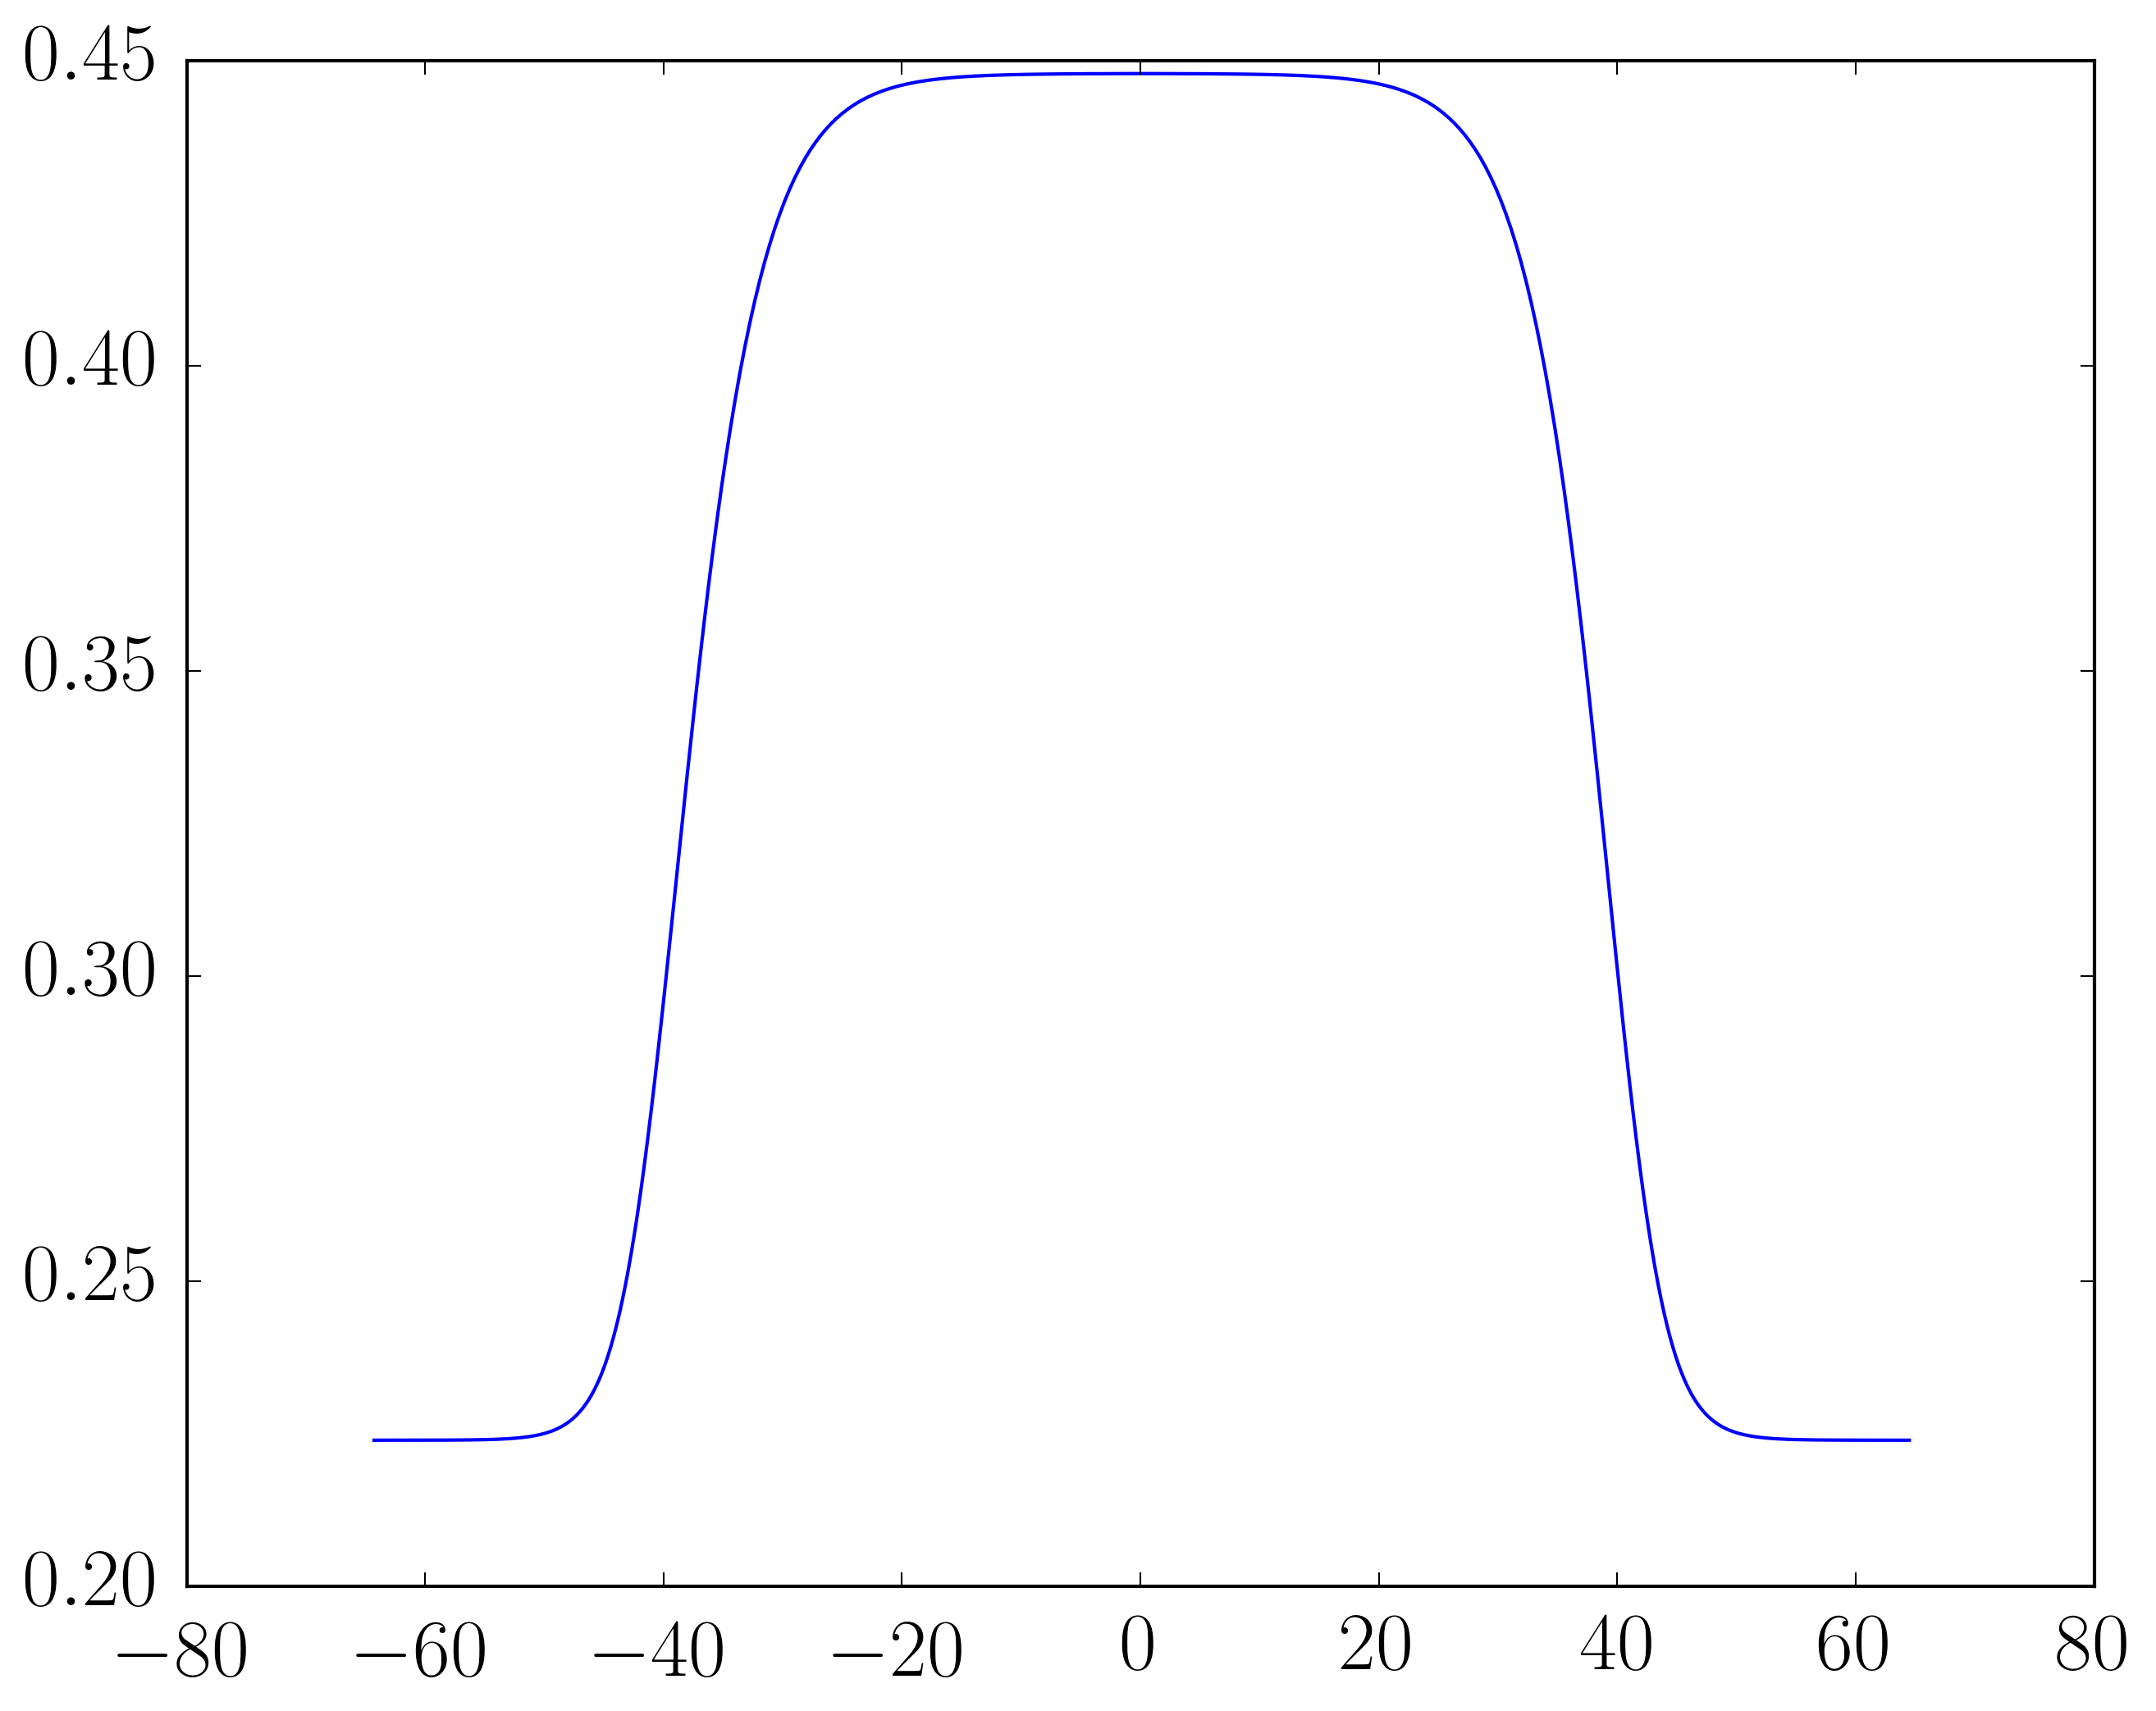

In [303]:
plt.plot(y[1:],Dy)
print Dy[-1]/Dy[my/2]

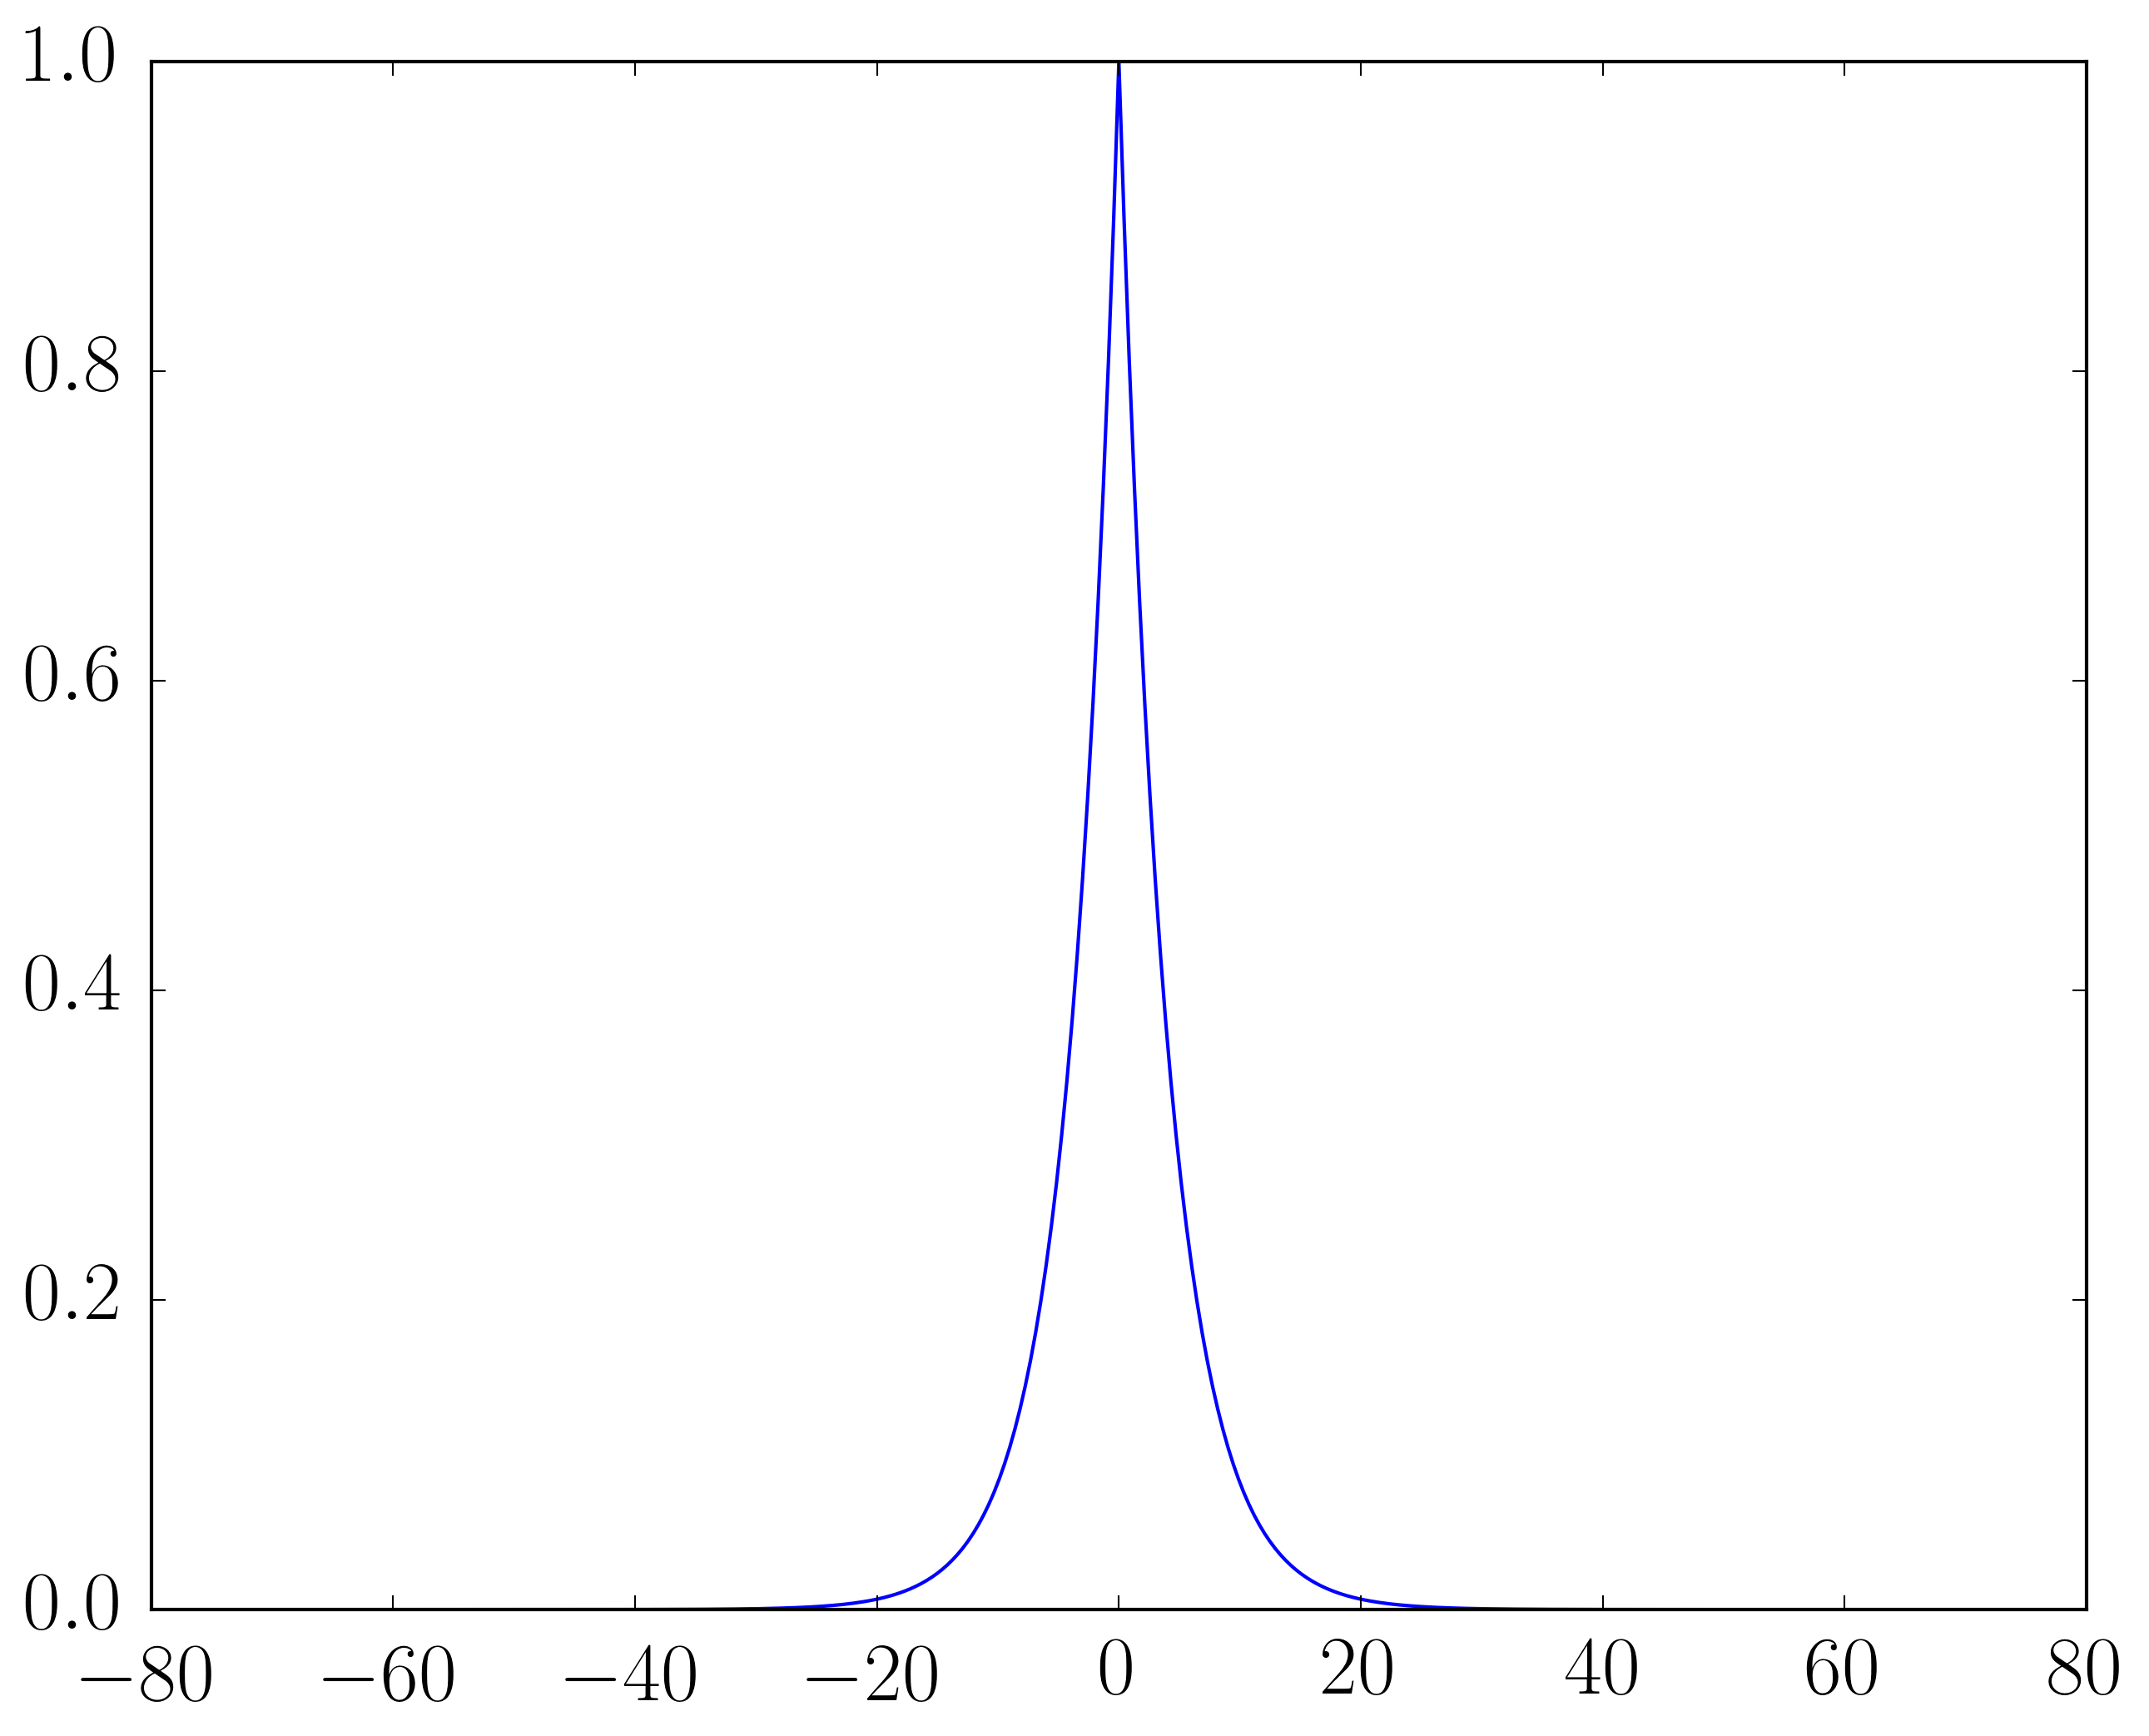

In [86]:
plt.plot(y,np.exp(-abs(y)/4.0))

In [84]:
print np.min(np.diff(y))

0.43


In [80]:
Dxfou/1.5

0.2994791666666667

In [94]:
print 7400/640.0

11.5625


# Temperature properties of air (T(º)/rho/k/cp)

In [18]:
vT =273.0+np.linspace(0,400,15);
vrho = [1.293,1.205,1.127,1.067,1.0,0.946,0.898,0.854,0.815,0.779,0.746,0.675,0.616,0.566,0.524]
vCp = [1.005,1.005,1.005,1.009,1.009,1.009,1.013,1.013,1.017,1.022,1.026,1.034,1.047,1.055,1.068]
vK  = [0.0243,0.0257,0.0271,0.0285,0.0299,0.0314,0.0328,0.0343,0.0358,0.0372,0.0386,0.0421,0.0454,0.0485,0.0515]

(0.0, 0.099999999999999992)

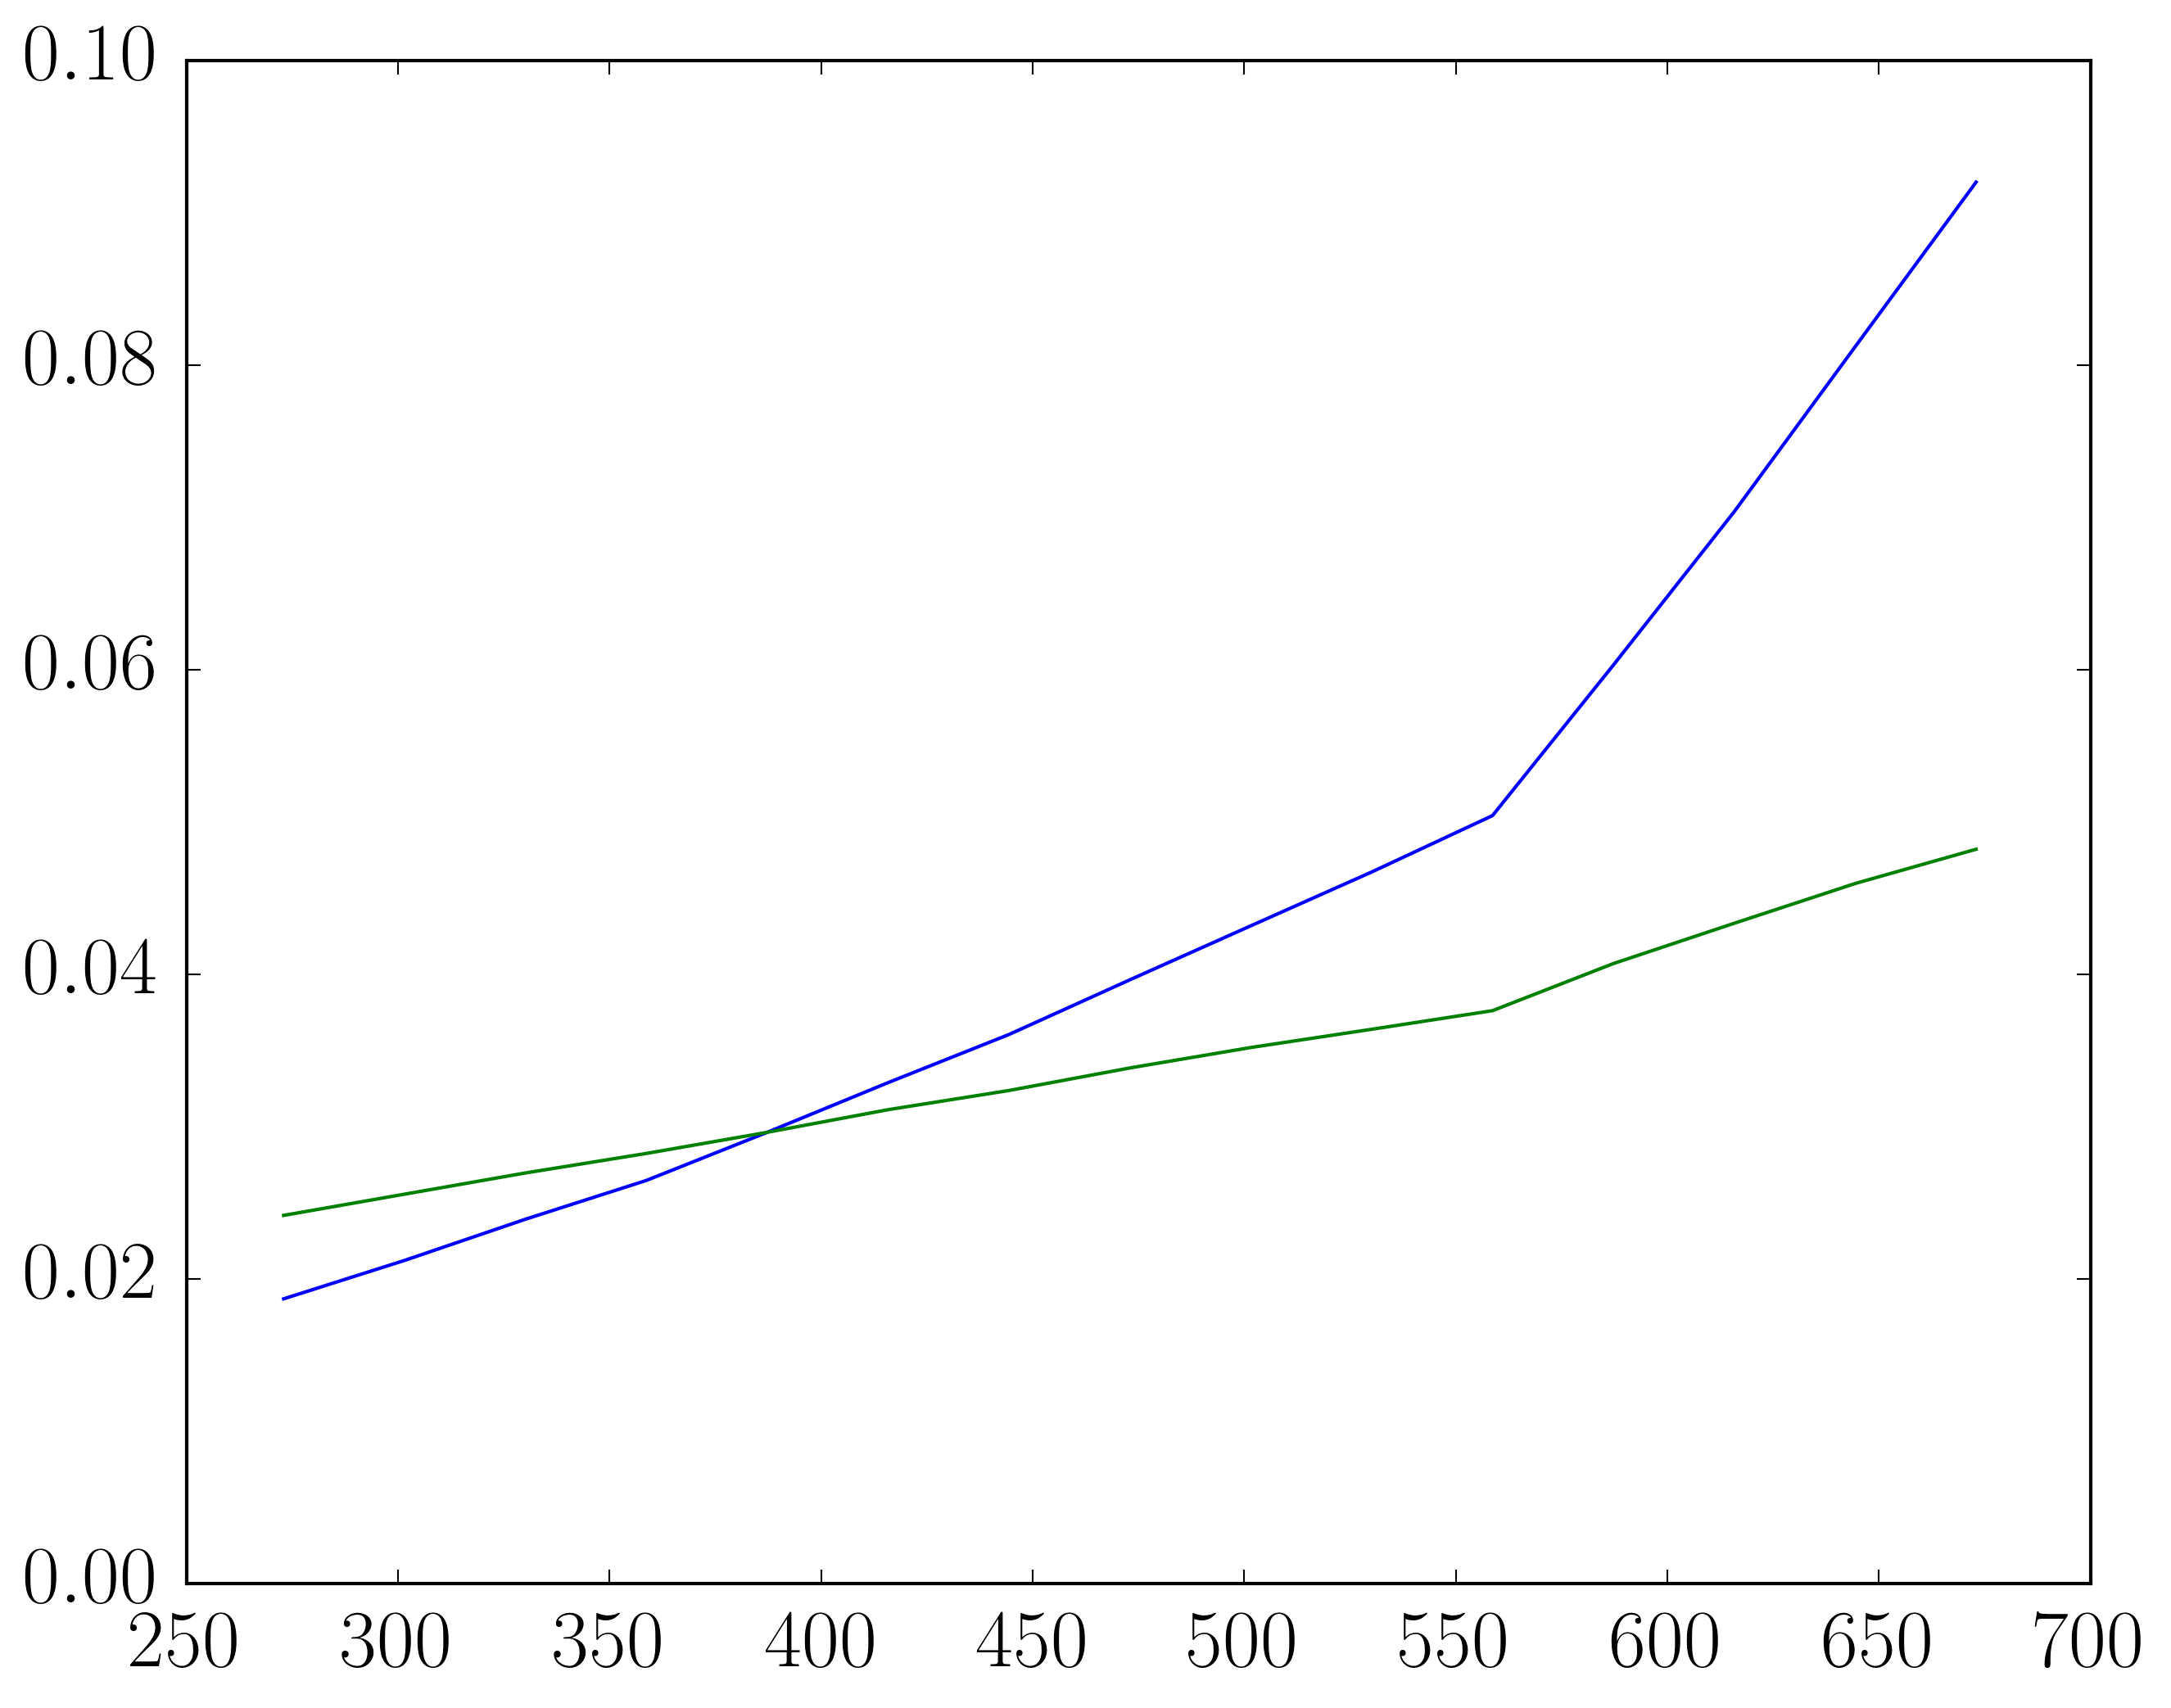

In [30]:
kk = np.array(vK)/np.array(vrho)/np.array(vCp)
plt.plot(np.array(vT),kk)
plt.plot(np.array(vT),np.array(vK)/np.array(vCp))
plt.ylim(bottom=0.0)
#plt.plot(np.array(vT),0.0001*np.array(vT))

In [376]:
def create_mesh1D(Ly,my,type,alpha,filename='mesh.txt',beta=0.8,gamma=0.05,nextra=0,zeta=0.0):
        """
        This function will create 1D mesh according to given shape and type
        y = create_mesh1D(Ly,my,type,alpha,filename)
                Ex. y = create_mesh1D(172./2,1025,'tanh',0.5,'mesh.txt')
                will create a mesh with more 1/0.5 more resolution close to
                boundaries than in the rest.
        """
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy.integrate import cumtrapz

        if type == 'tanh':
                y=np.linspace(-1,1,my)
                Dy = np.array(np.ones(my))
                Dy=(1+alpha)+alpha*np.tanh((y-beta)/gamma)
                for j in range(0,my/2):
                        Dy[j] =Dy[-1-j]
                y2 = cumtrapz(Dy,y,initial=0)
                ynew = 2*y2*Ly/y2[-1] - Ly
                np.savetxt(filename, ynew)
                return ynew

        elif type =='test':
                y=np.linspace(-1,1,my)
                Dy=(1+alpha)+alpha*np.tanh((y-beta)/gamma)
                #print Dy
                #nextra =(0.15/Dy[-1]+1).astype(int)
                #print nextra
                #xfunc = Dy[-1]*np.ones([nextra])
                yc = y[my-nextra];
                yextra = (y[-1]-yc)
                Dyf = Dy[my-nextra]
                yb = np.linspace(yc,y[-1],nextra);
                A=zeta; minfk = Dyf*(A-0.5)/(A+0.5)
                B=(Dyf-minfk)*yextra/Dyf*0.18;
                xfunc =Dyf*(A+np.tanh(-(yb+yextra/2-1.0)/B)/2.0)/(A+0.5)
                Dy[my-nextra:]=xfunc
                #plt.plot(y,Dy)
                #print len(Dy)
                #print my
                for j in range(0,my/2):
                        Dy[j] =Dy[-1-j]
                y2 = cumtrapz(Dy,y,initial=0)
                ynew = 2*y2*Ly/y2[-1] - Ly
                np.savetxt(filename, ynew)
                return ynew

        elif type =='line':
                ynew=np.linspace(-Ly,Ly,my)
                np.savetxt(filename, ynew)
                return ynew
        if (type=='manl'):
        #%not checked with lenght yet
        #%1< delta < 2 for this mesh
            y=np.linspace(-1,1,my);
            a=[1,0,28.5,-47,6,12];#%Dy(0)=Dy0,Dy(1)=Dy0/2;Dy(0.6)=3Dy0;
        #%integrating Dy(Dy is a polynomial of order 5) gives y2
            y2=a[0]*y+a[1]*y**2/2.0+a[2]*y**3/3.0+a[3]*y**4/4+a[4]*y**5/5+a[5]*y**6/6;
        #%now create the symmetric part
            if np.mod(my,2)==0:
                y2[0:np.floor(my/2)-1]=-y2[-1:np.floor(my/2):-1];
            else:
                y2[0:np.floor(my/2)-1]=-y2[-1:np.floor(my/2)+1:-1];
        ##%y2(j)=-(a(1)*abs(y(j))+a(2)*abs(y(j))^2/2+a(3)*abs(y(j))^3/3+a(4)*abs(y(j))^4/4+a(5)*abs(y(j))^5/5+a(6)*abs(y(j))^6/6);
        #%scale y
            y=y2/np.max(y2)*Ly;
            np.savetxt(filename, y)
            return y
        if (type=='man2'):
            Dy0 = alpha;
        #%not checked with lenght yet
        #%1< delta < 2 for this mesh
            y=np.linspace(-1,1,my);
            a=[alpha,alpha*4.916667,alpha*(-5.4166667)];#%Dy(0)=Dy0,Dy(1)=Dy0/2;Dy(0.6)=3Dy0;
        #%integrating Dy(Dy is a polynomial of order 5) gives y2
            y2=a[0]*y+a[1]*y**2/2.0+a[2]*y**3/3.0
            #a[3]*y**4/4+a[4]*y**5/5+a[5]*y**6/6;
        #%now create the symmetric part
            if np.mod(my,2)==0:
                y2[0:np.floor(my/2)-1]=-y2[-1:np.floor(my/2):-1];
            else:
                y2[0:np.floor(my/2)-1]=-y2[-1:np.floor(my/2)+1:-1];
        ##%y2(j)=-(a(1)*abs(y(j))+a(2)*abs(y(j))^2/2+a(3)*abs(y(j))^3/3+a(4)*abs(y(j))^4/4+a(5)*abs(y(j))^5/5+a(6)*abs(y(j))^6/6);
        #%scale y
            y=y2/np.max(y2)*Ly;
            np.savetxt(filename, y)
            return y
        else:
                print "That MESH TYPE is not ready yet MAN..."
                return np.ones(my)
        #plt.plot(ynew[:-1],np.diff(ynew),'b.') 

In [459]:
#Solving system for new mesh Dy0,2Dy0,Dy0/2
det = 0.24;
a = 1.0;#*Dy0
b   = (1.0+0.6**2/2.0)/det;#*Dy0
c   = (-0.3-1)/det;#*Dy0
print a,b,c

1.0 4.91666666667 -5.41666666667


In [370]:
print 172.0*1.5,513*1.5

258.0 769.5


In [368]:
y = create_mesh1D(172.0/2,513,'manl',0.0,'/home/toni/masterMesh.txt')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:64: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [453]:
y = create_mesh1D(258.0/2,513,'manl',0.0,'/home/toni/newmesh.txt')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:64: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [377]:
y = create_mesh1D(258.0/2,513,'man2',0.3,'/home/toni/newmesh2.txt')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.155957145344
0.945170155995 1.04485901348
513


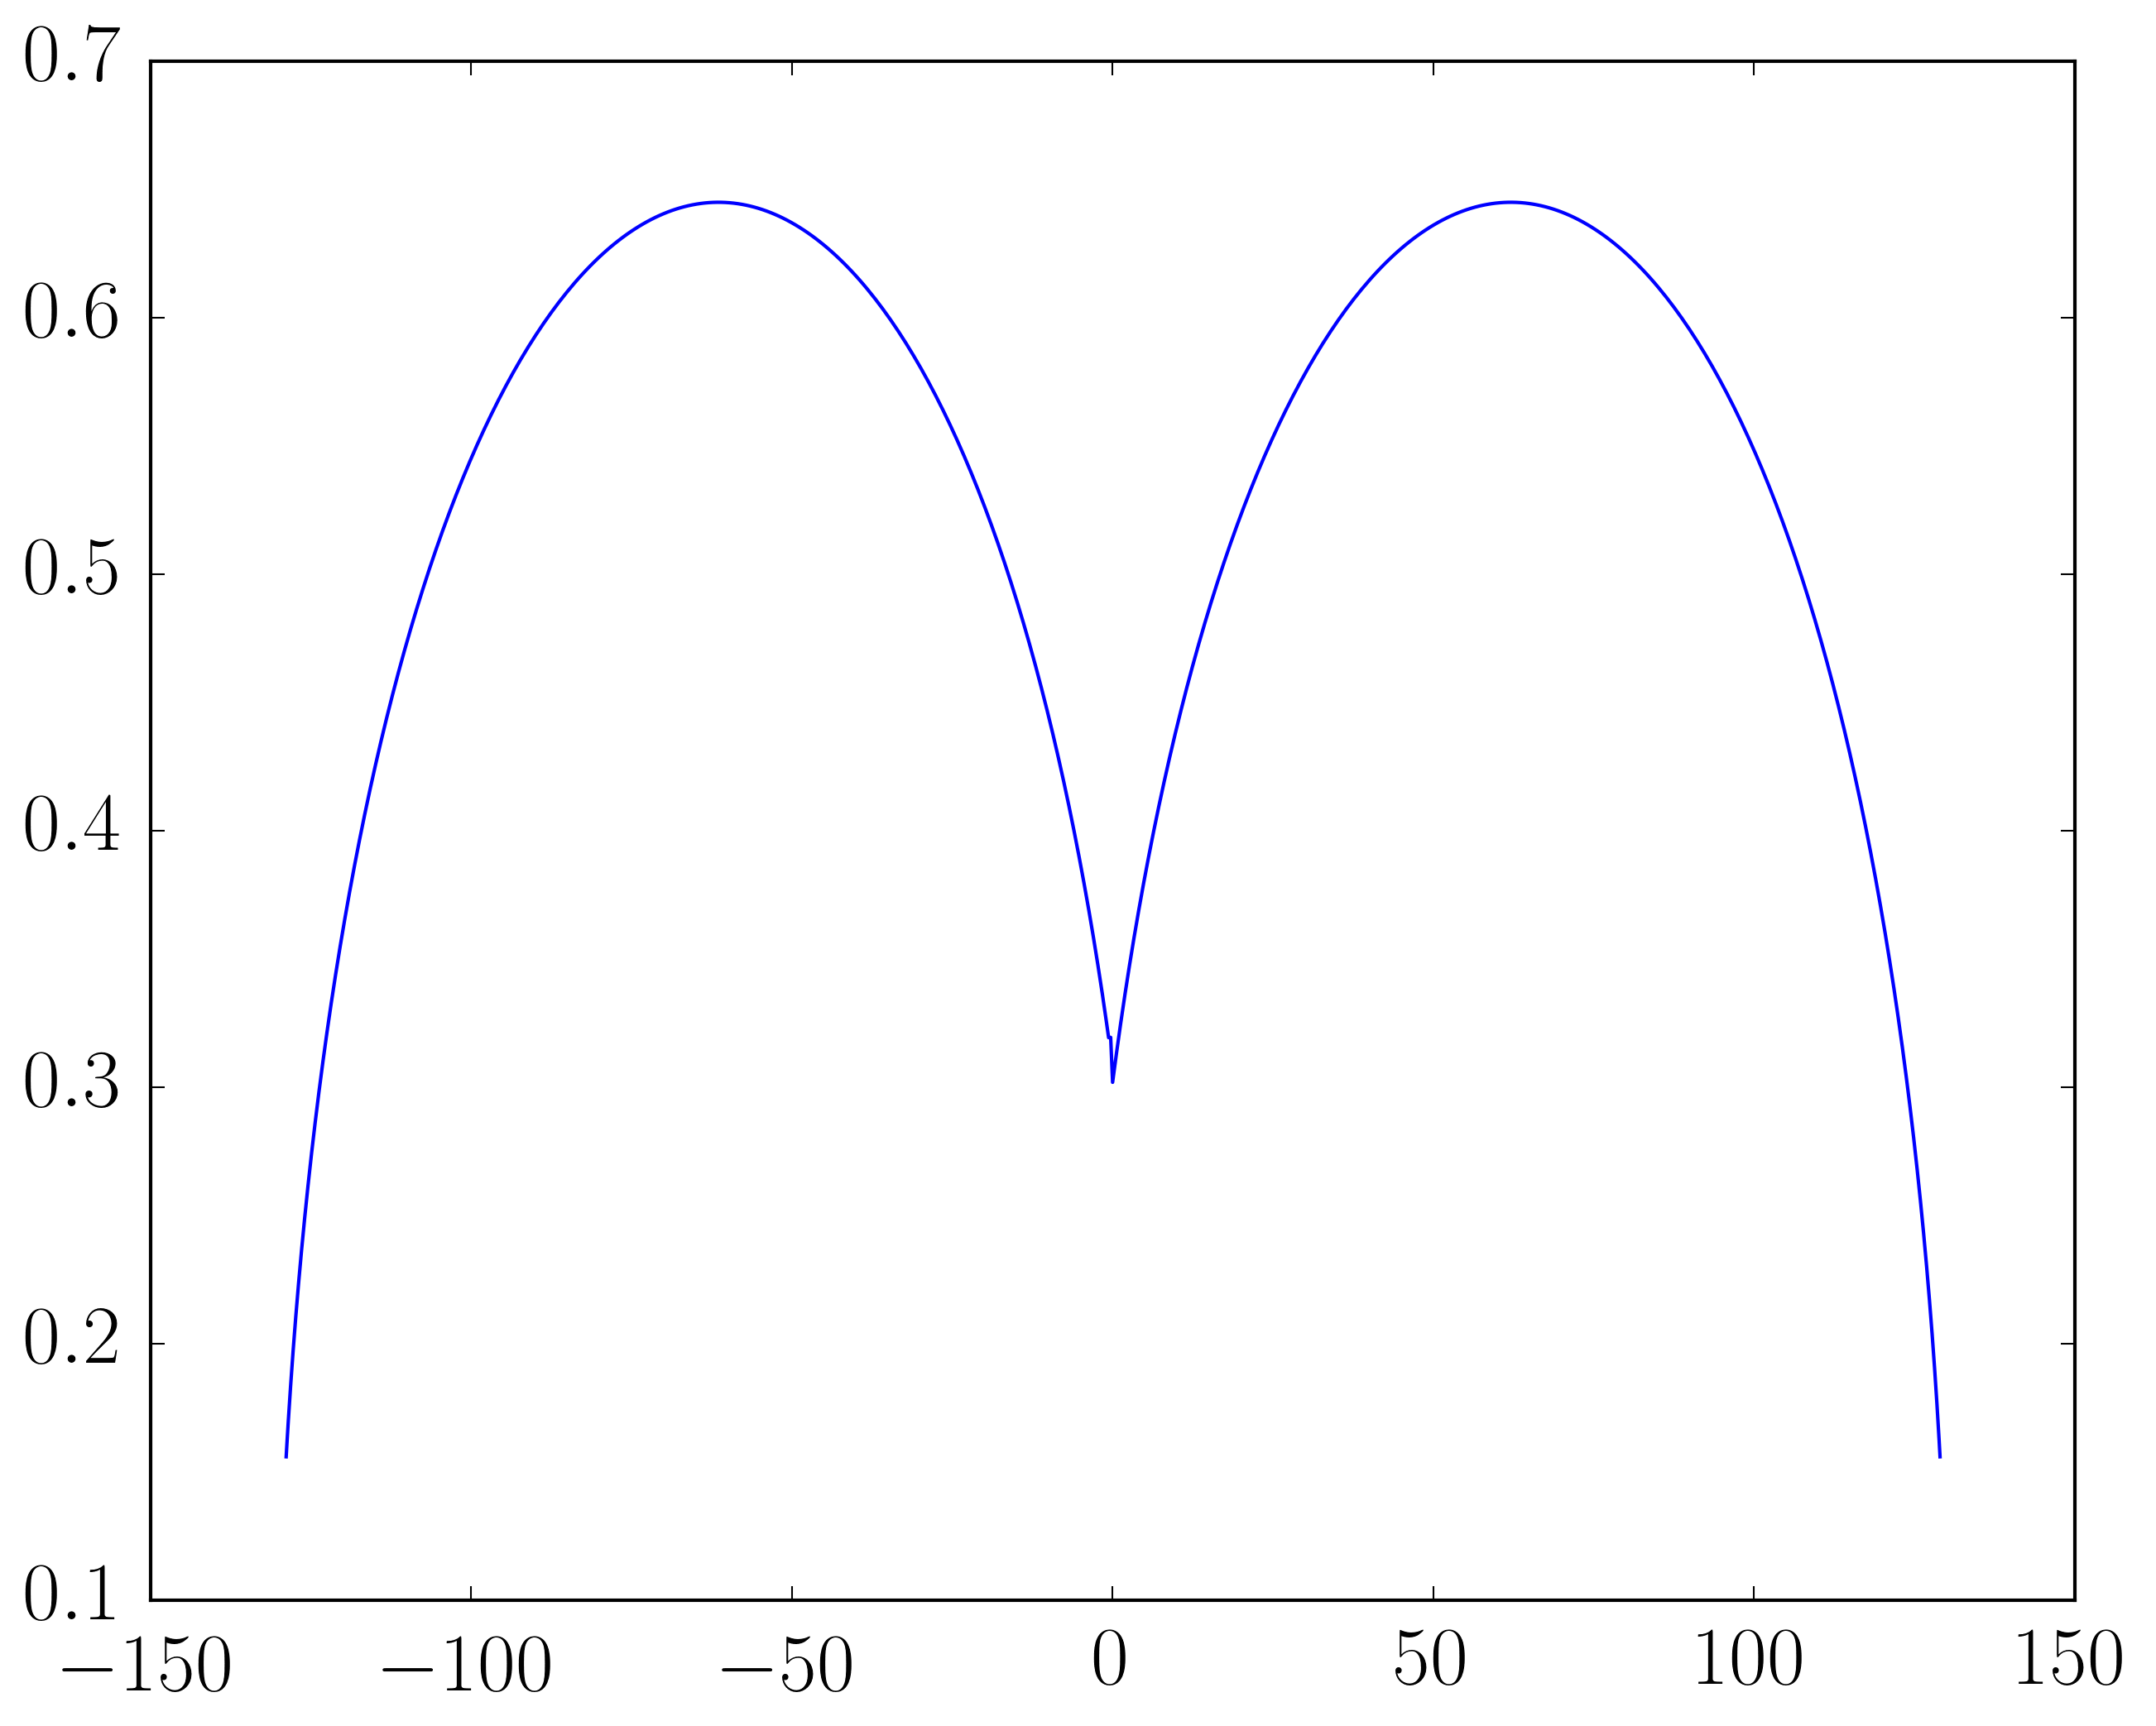

In [378]:
plt.plot(y[1:],np.diff(y)); print np.min(np.diff(y))
Dy = np.diff(y)
print np.min(Dy[1:]/Dy[:-1]),np.max(Dy[1:]/Dy[:-1])
print len(y)

1.02052828722
0.979884646536


(0, 0.45000000000000001)

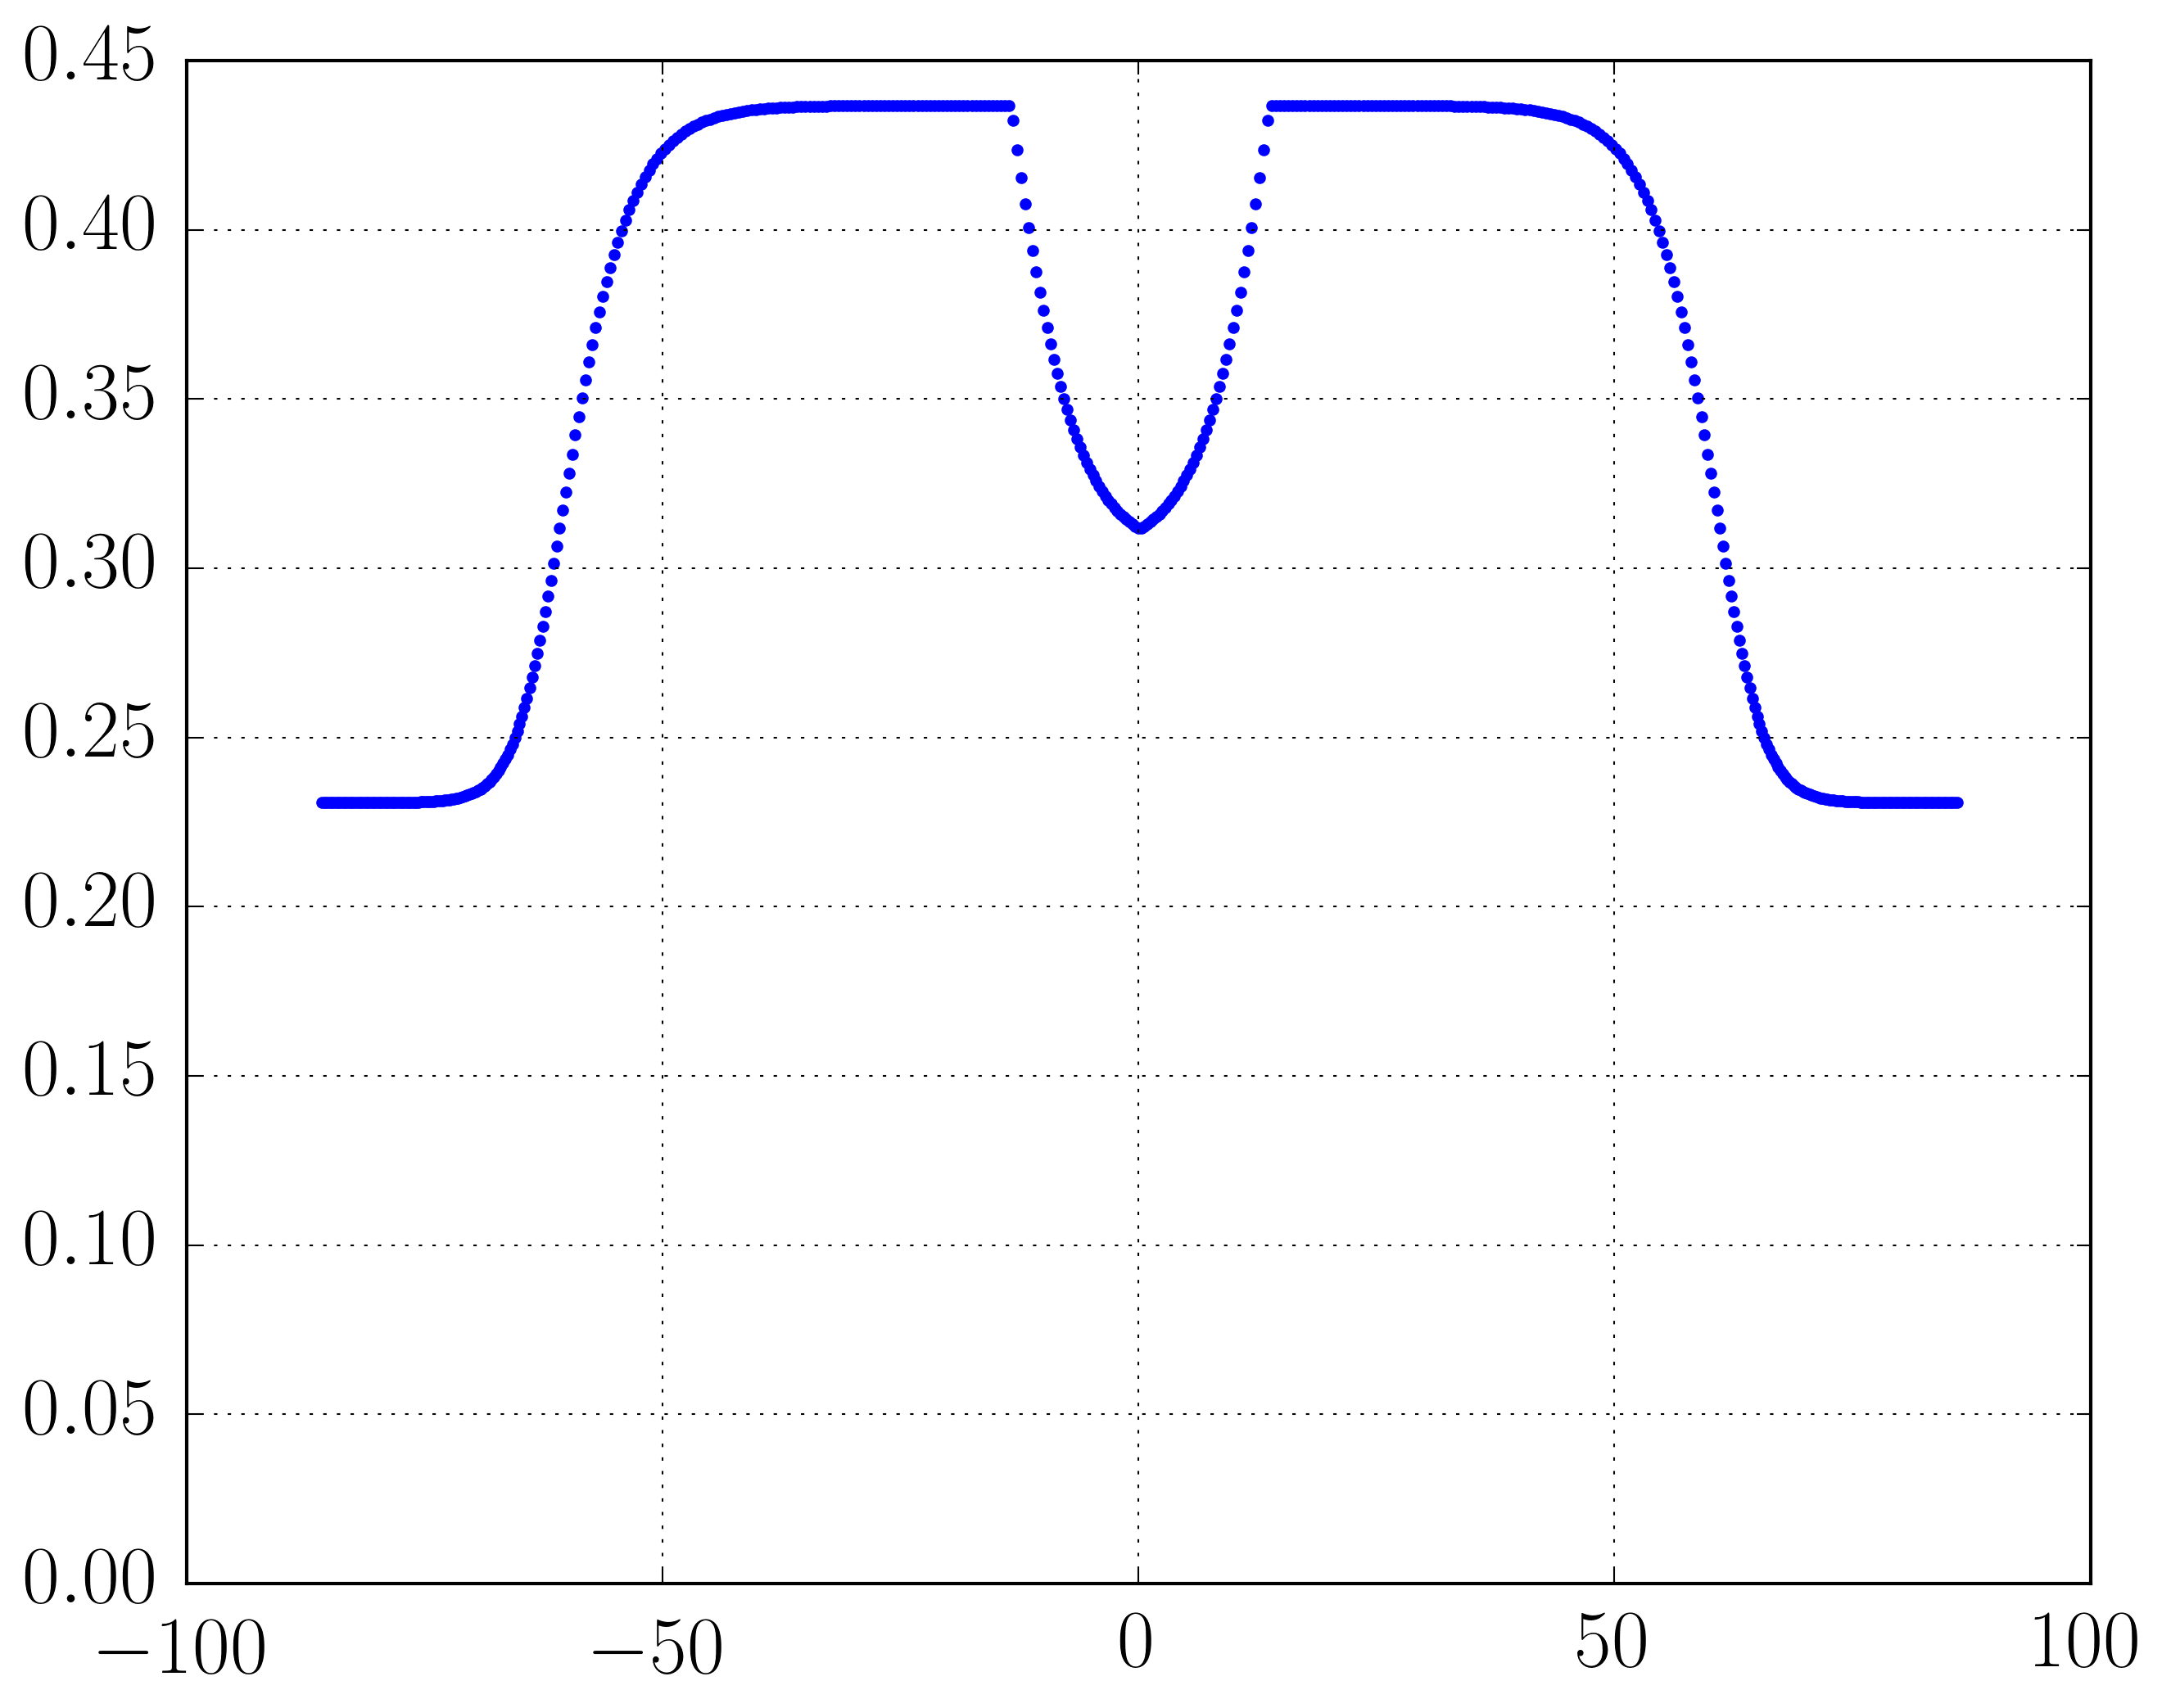

In [634]:
my=513
Ly=172.0
y=create_mesh1D(Ly/2.0,my,'test',1.8,'/home/toni/JFM_news10.txt',0.25,0.0981,218,1.62)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
plt.ylim(bottom=0)
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])


yt= 1.5;
yk = np.linspace(1,yt,300)
yext=yt-1.0
A=0.8;
Dyf=20;
minfk = Dyf*(A-0.5)/(A+0.5)
print "minfk=%s"%minfk; #slope is B
B=(Dyf-minfk)*yext/Dyf*0.16;
print A,B
fk =Dyf*(A+np.tanh(-(yk-yext/2-1.0)/B)/2.0)/(A+0.5)
print np.min(fk[1:]/fk[:-1])
plt.plot(yk,fk)

1.01977304295
0.980610349441


(0, 0.55000000000000004)

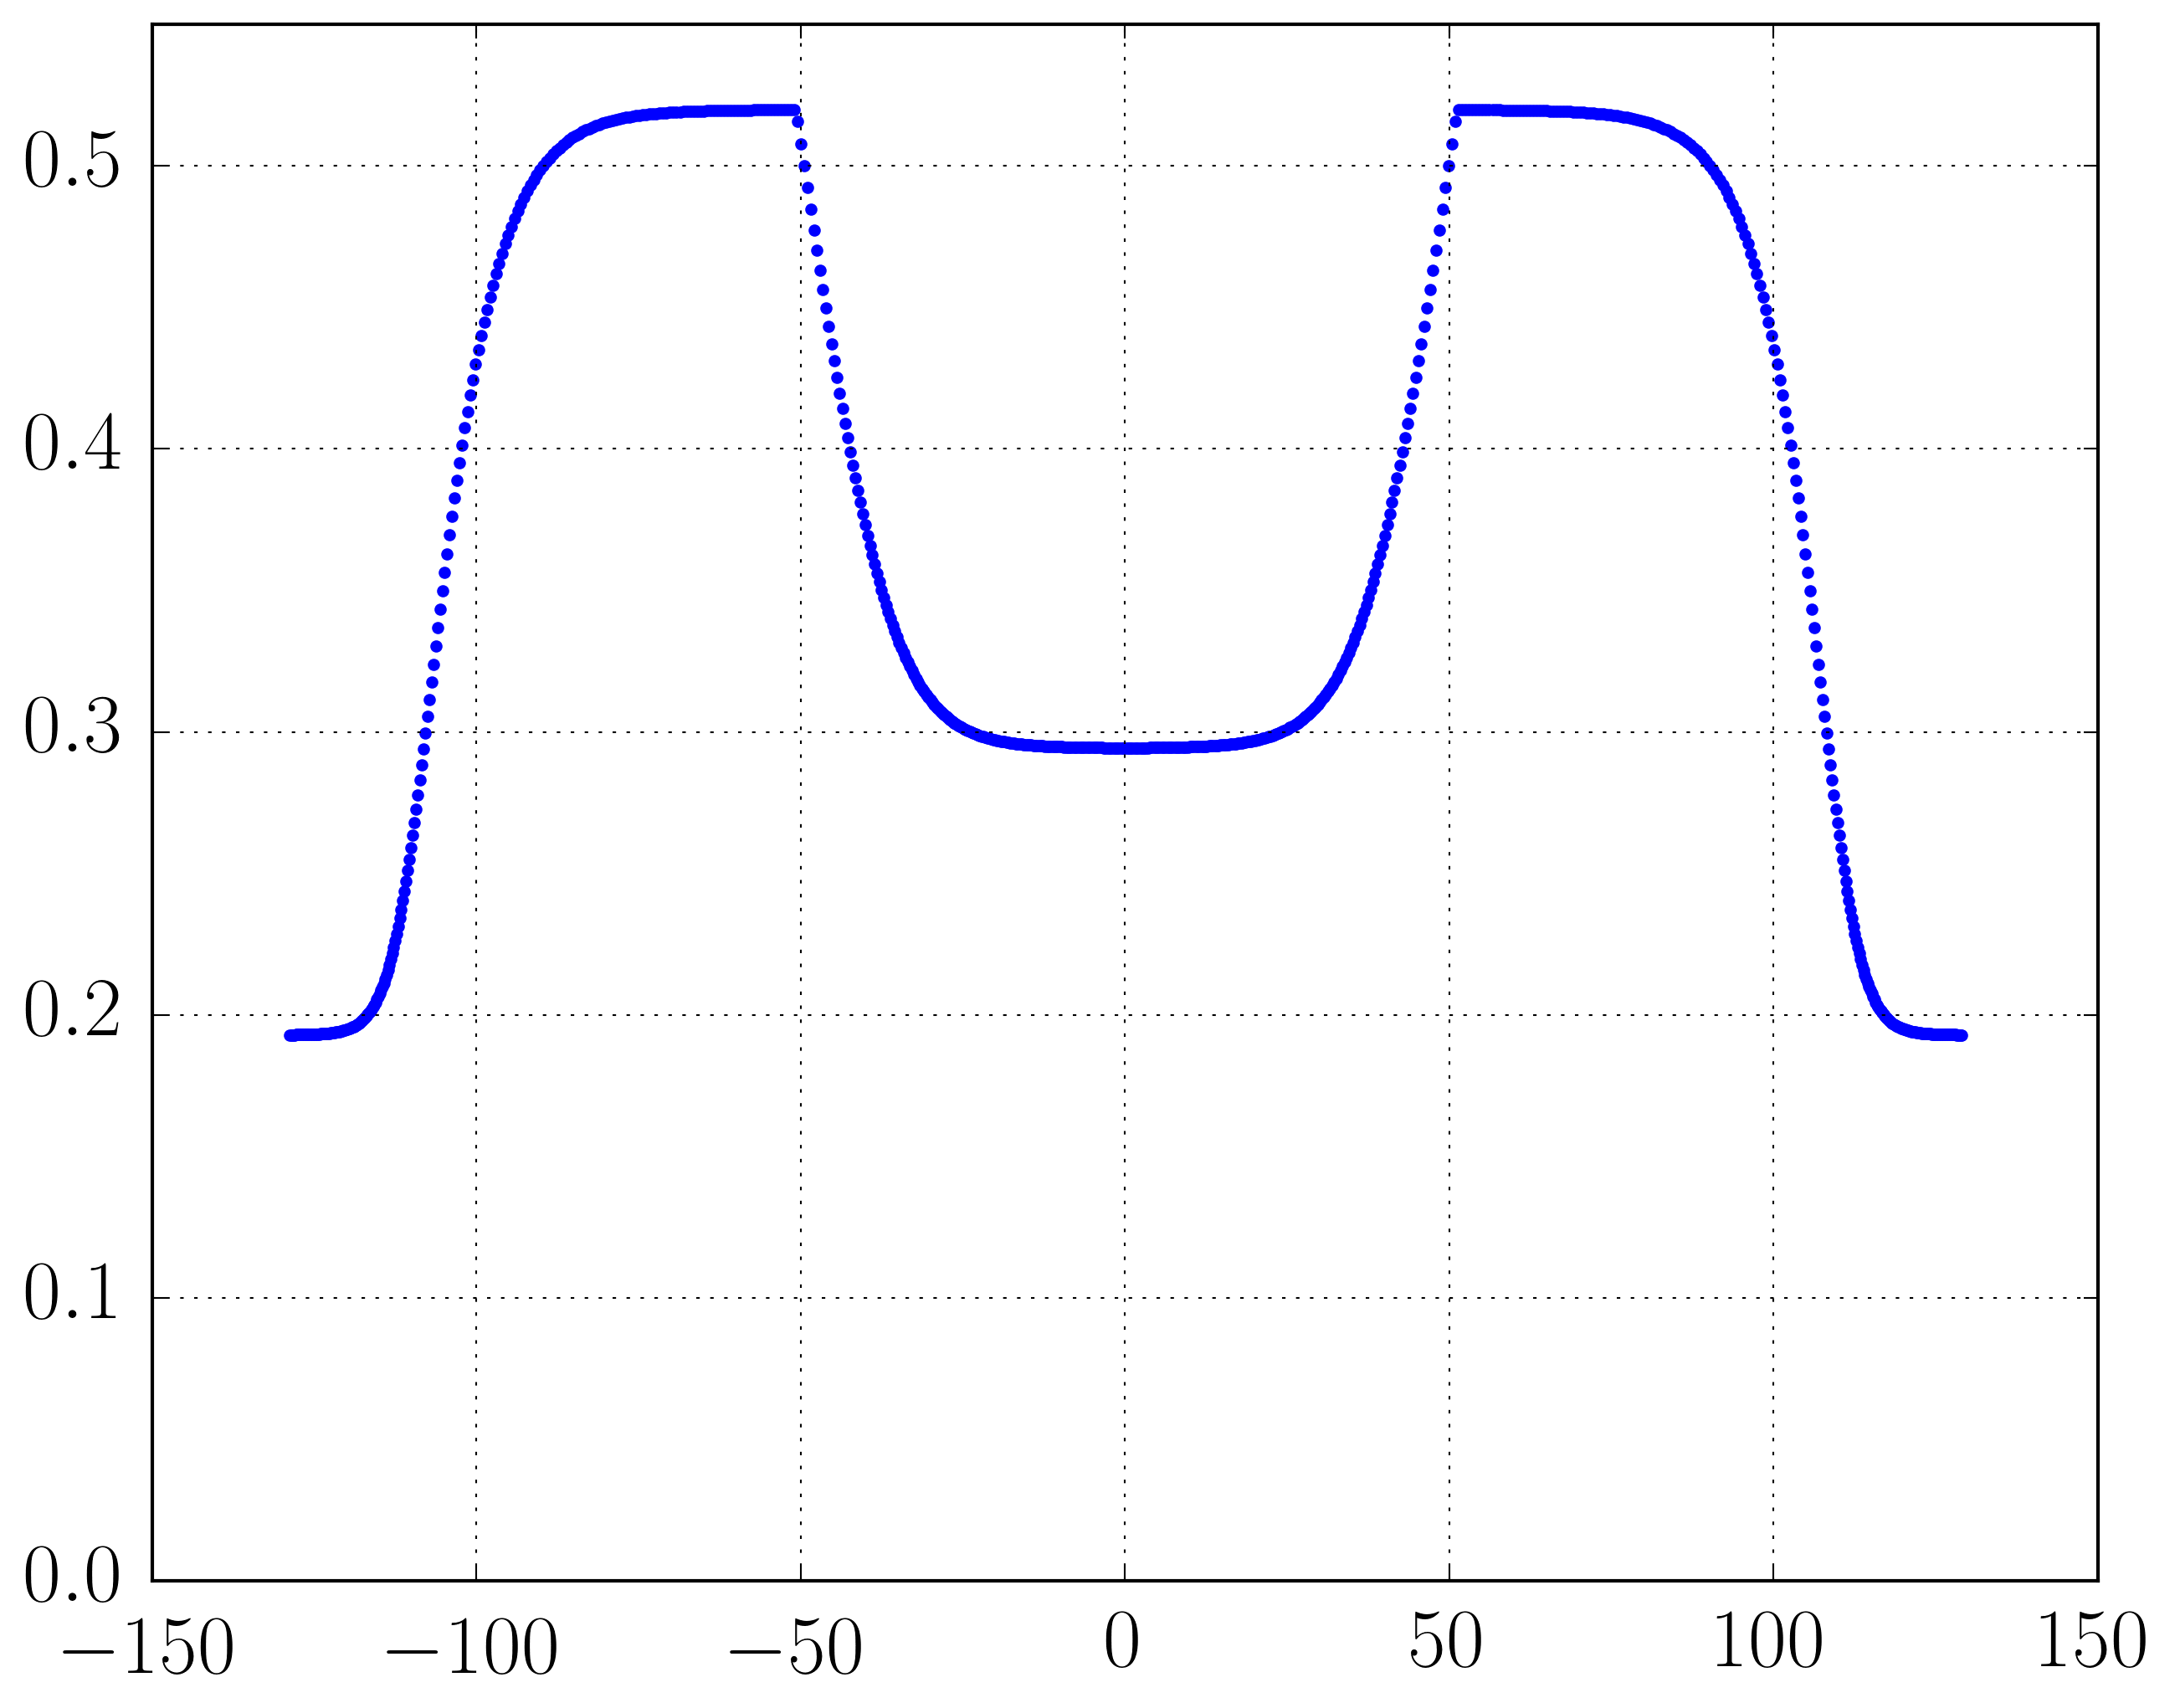

In [604]:
my=751
Ly=258.0
y=create_mesh1D(Ly/2.0,my,'test',1.15,'/home/toni/JFM_news80.txt',0.45,0.0981,220,1.09)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
plt.ylim(bottom=0)
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])

# TESTING LOMA

## Running case of s=1.0001 in order to test the code and well-behaviour

In [4]:
#p_folders   = [ '/share/drive/toni/VDML/s80/test/05/tanhLy250/'] 
p_folders   = [ '/share/drive/toni/VDML/s10/test/00/'] 
p_folders   = [ '/share/drive/toni/VDML/s80/test/03/'] 
#p_folders   = [ '/share/drive/toni/VDML/s80/test/02/test/'] 
#,'/share/drive/toni/VDML/s80/test/06/01/'
#p_folders=['/share/drive/toni/VDML/s80/test/05/']
l_sta_opt = [3,3]
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    #l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_sta_files[ijob][0],l_sta_files[ijob][-1]) 
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_sta_files[ijob])
print nfiles
stats = []
for i in range(njobs):
    for j in range(len(l_sta_files[ijob])):
        stats.append([])
for ijob in range(njobs):
    print ijob
    print l_sta_opt[ijob]
    #for every stafiles in l_sta_files list:
    for fsta,ista in zip(l_sta_files[ijob],range(len(l_sta_files[ijob]))):
        temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        #temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        stats[ijob].append(temp)
#Special variables is'y'
l_var_unique = ['alp','bet','Re','nacum']
l_var_profiles=[]
l_var_point=[]
y = stats[0][0]['y']
my = len(y)
time = stats[0][0]
for key in stats[0][0].keys():
    if size(stats[0][0][key])==my and key!='y':
        l_var_profiles.append(key)
    elif key!='y' and key not in l_var_unique:
        l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point
# add a big axes, hide frame
# hide tick and tick label of the big axes
for ijob in range(njobs):
    nsta = len(l_sta_files[ijob])
    v_temp=np.zeros(nsta)
    y = stats[ijob][0]['y']
    my = len(y)
    matriz = np.zeros([my,nsta])
    path = p_folders[ijob]+'h5.stats'
    with h5py.File(path,"w") as f:
        f['y']=y
        print "my=%s"%(len(y))
        for variable in l_var_unique:
            f[variable]=stats[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,stats[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            ista = 0
            for ista in range(nsta):
                v_temp[ista] = stats[ijob][ista][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
            if variable=='time':
                vtime = np.array(v_temp)
            if variable=='dm':
                vdm  = np.array(v_temp)
            if variable=='dw':
                vdw  = np.array(v_temp)
            if variable=='EPS':
                vEPS  = np.array(v_temp)
            if variable=='Relambda':
                vLambda  = np.array(v_temp)
            if variable=='dmpoint':
                vdmpoint  = np.array(v_temp)
            if variable=='dmpoint2':
                vdmpoint2  = np.array(v_temp)
        for variable in l_var_profiles:
            for ista in range(nsta):
                matriz[:,ista]=stats[ijob][ista][variable]
            f[variable]=matriz

['/share/drive/toni/VDML/s80/test/03/']
job(1): 1st file = /share/drive/toni/VDML/s80/test/03/Pantano_04_051.sta, last file = /share/drive/toni/VDML/s80/test/03/Pantano_04_074.sta
[24]
0
3
['dyeta', 'wrms', 'llambda', 'w1rms', 'w3m', 'w2rms', 'R33', 'w3rms', 'them', 'urms', 'rwm', 'thep', 'Relambday', 'uv', 'um', 'epNH', 'XI', 'vm', 'rvm', 'Tm', 'vrms', 'R12', 'R11', 'TT', 'mum', 'nu', 'rum', 'wm', 'epR', 'epS', 'w1m', 'rhom', 'epD', 'Trms', 'k', 'w2m', 'eta', 'R22']
['EPS', 'Relambda', 'dm', 'dw', 'rhoEPS', 'dmpoint', 'etamin', 'time']
my=813
Writing alp = [ 0.0187656], for ijob = 0
Writing bet = [ 0.0727], for ijob = 0
Writing Re = [ 160.], for ijob = 0
Writing nacum = [1], for ijob = 0
Writing EPS
Writing Relambda
Writing dm
Writing dw
Writing rhoEPS
Writing dmpoint
Writing etamin
Writing time


In [5]:
print 2*np.pi/0.0187656/1151, 2*np.pi/0.0727/287

0.290898907281 0.301136612549


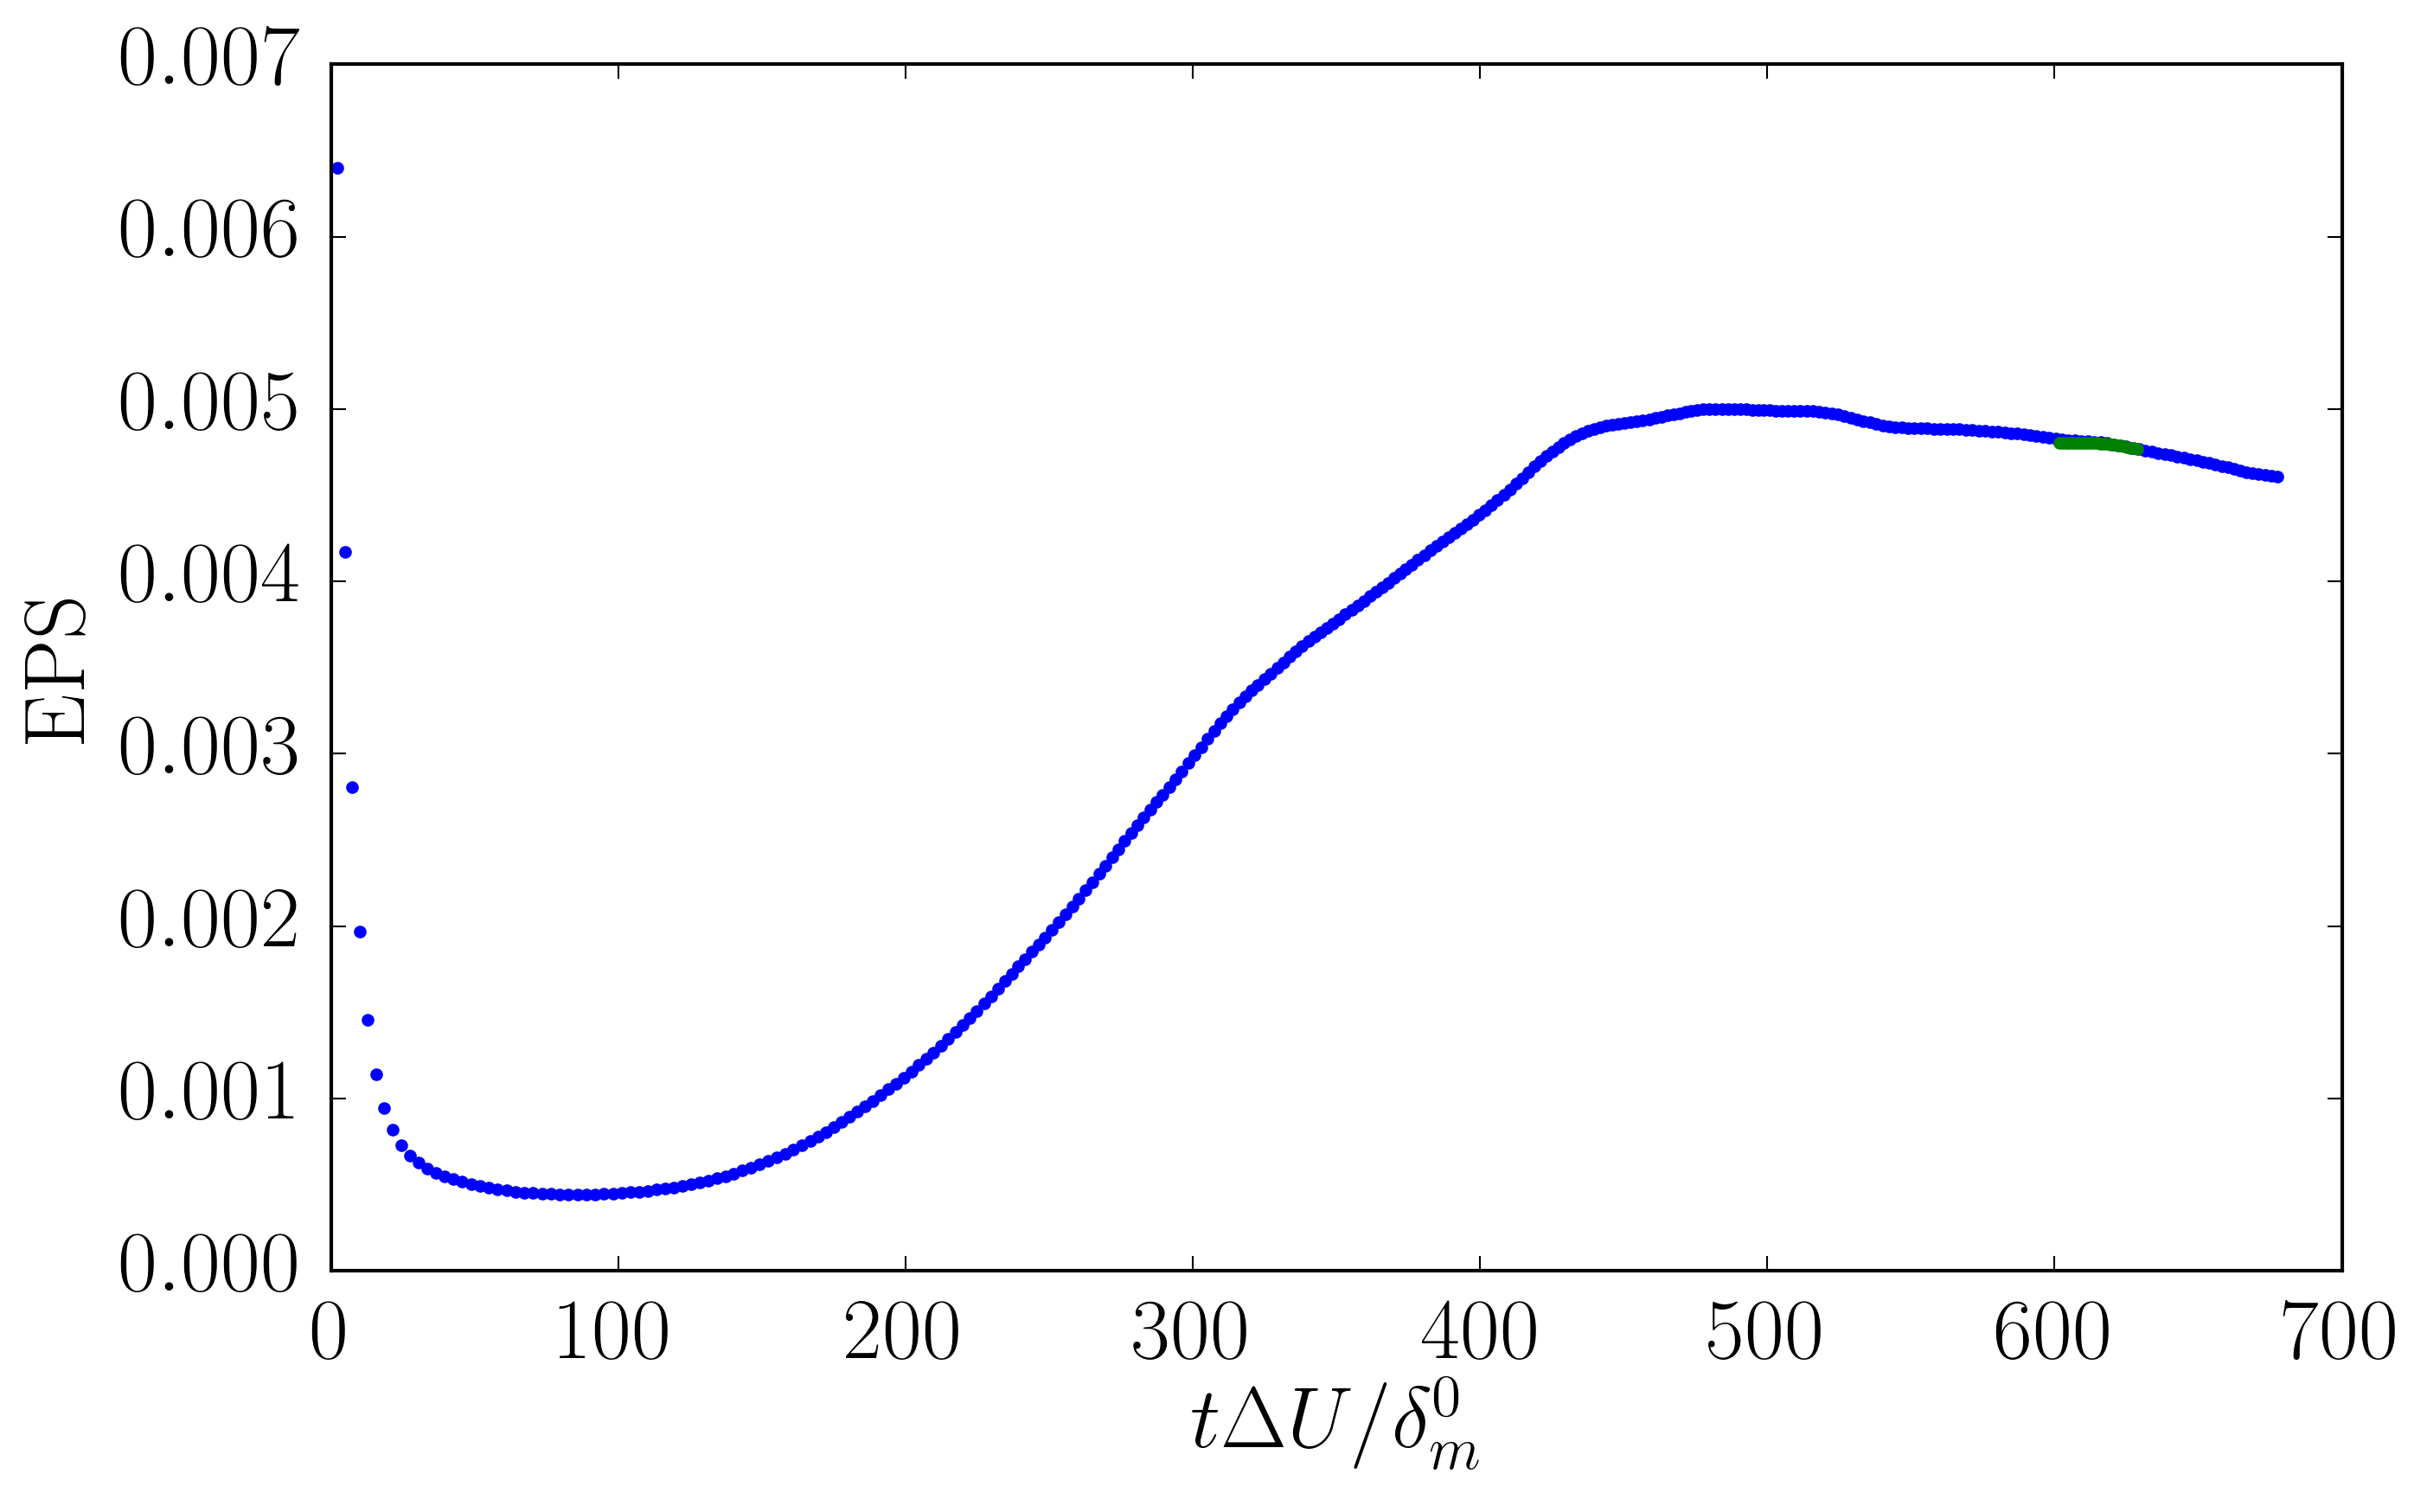

In [6]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'EPS'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/00/init/h5.stats','/share/drive/toni/VDML/s80/test/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/Re160s80/case1/y2/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/VDML/s80/test/03/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        fun = np.array(f[var]);
    plt.plot(time,fun,'.')
plt.xlabel(xlabel);
plt.ylabel(ylabel)

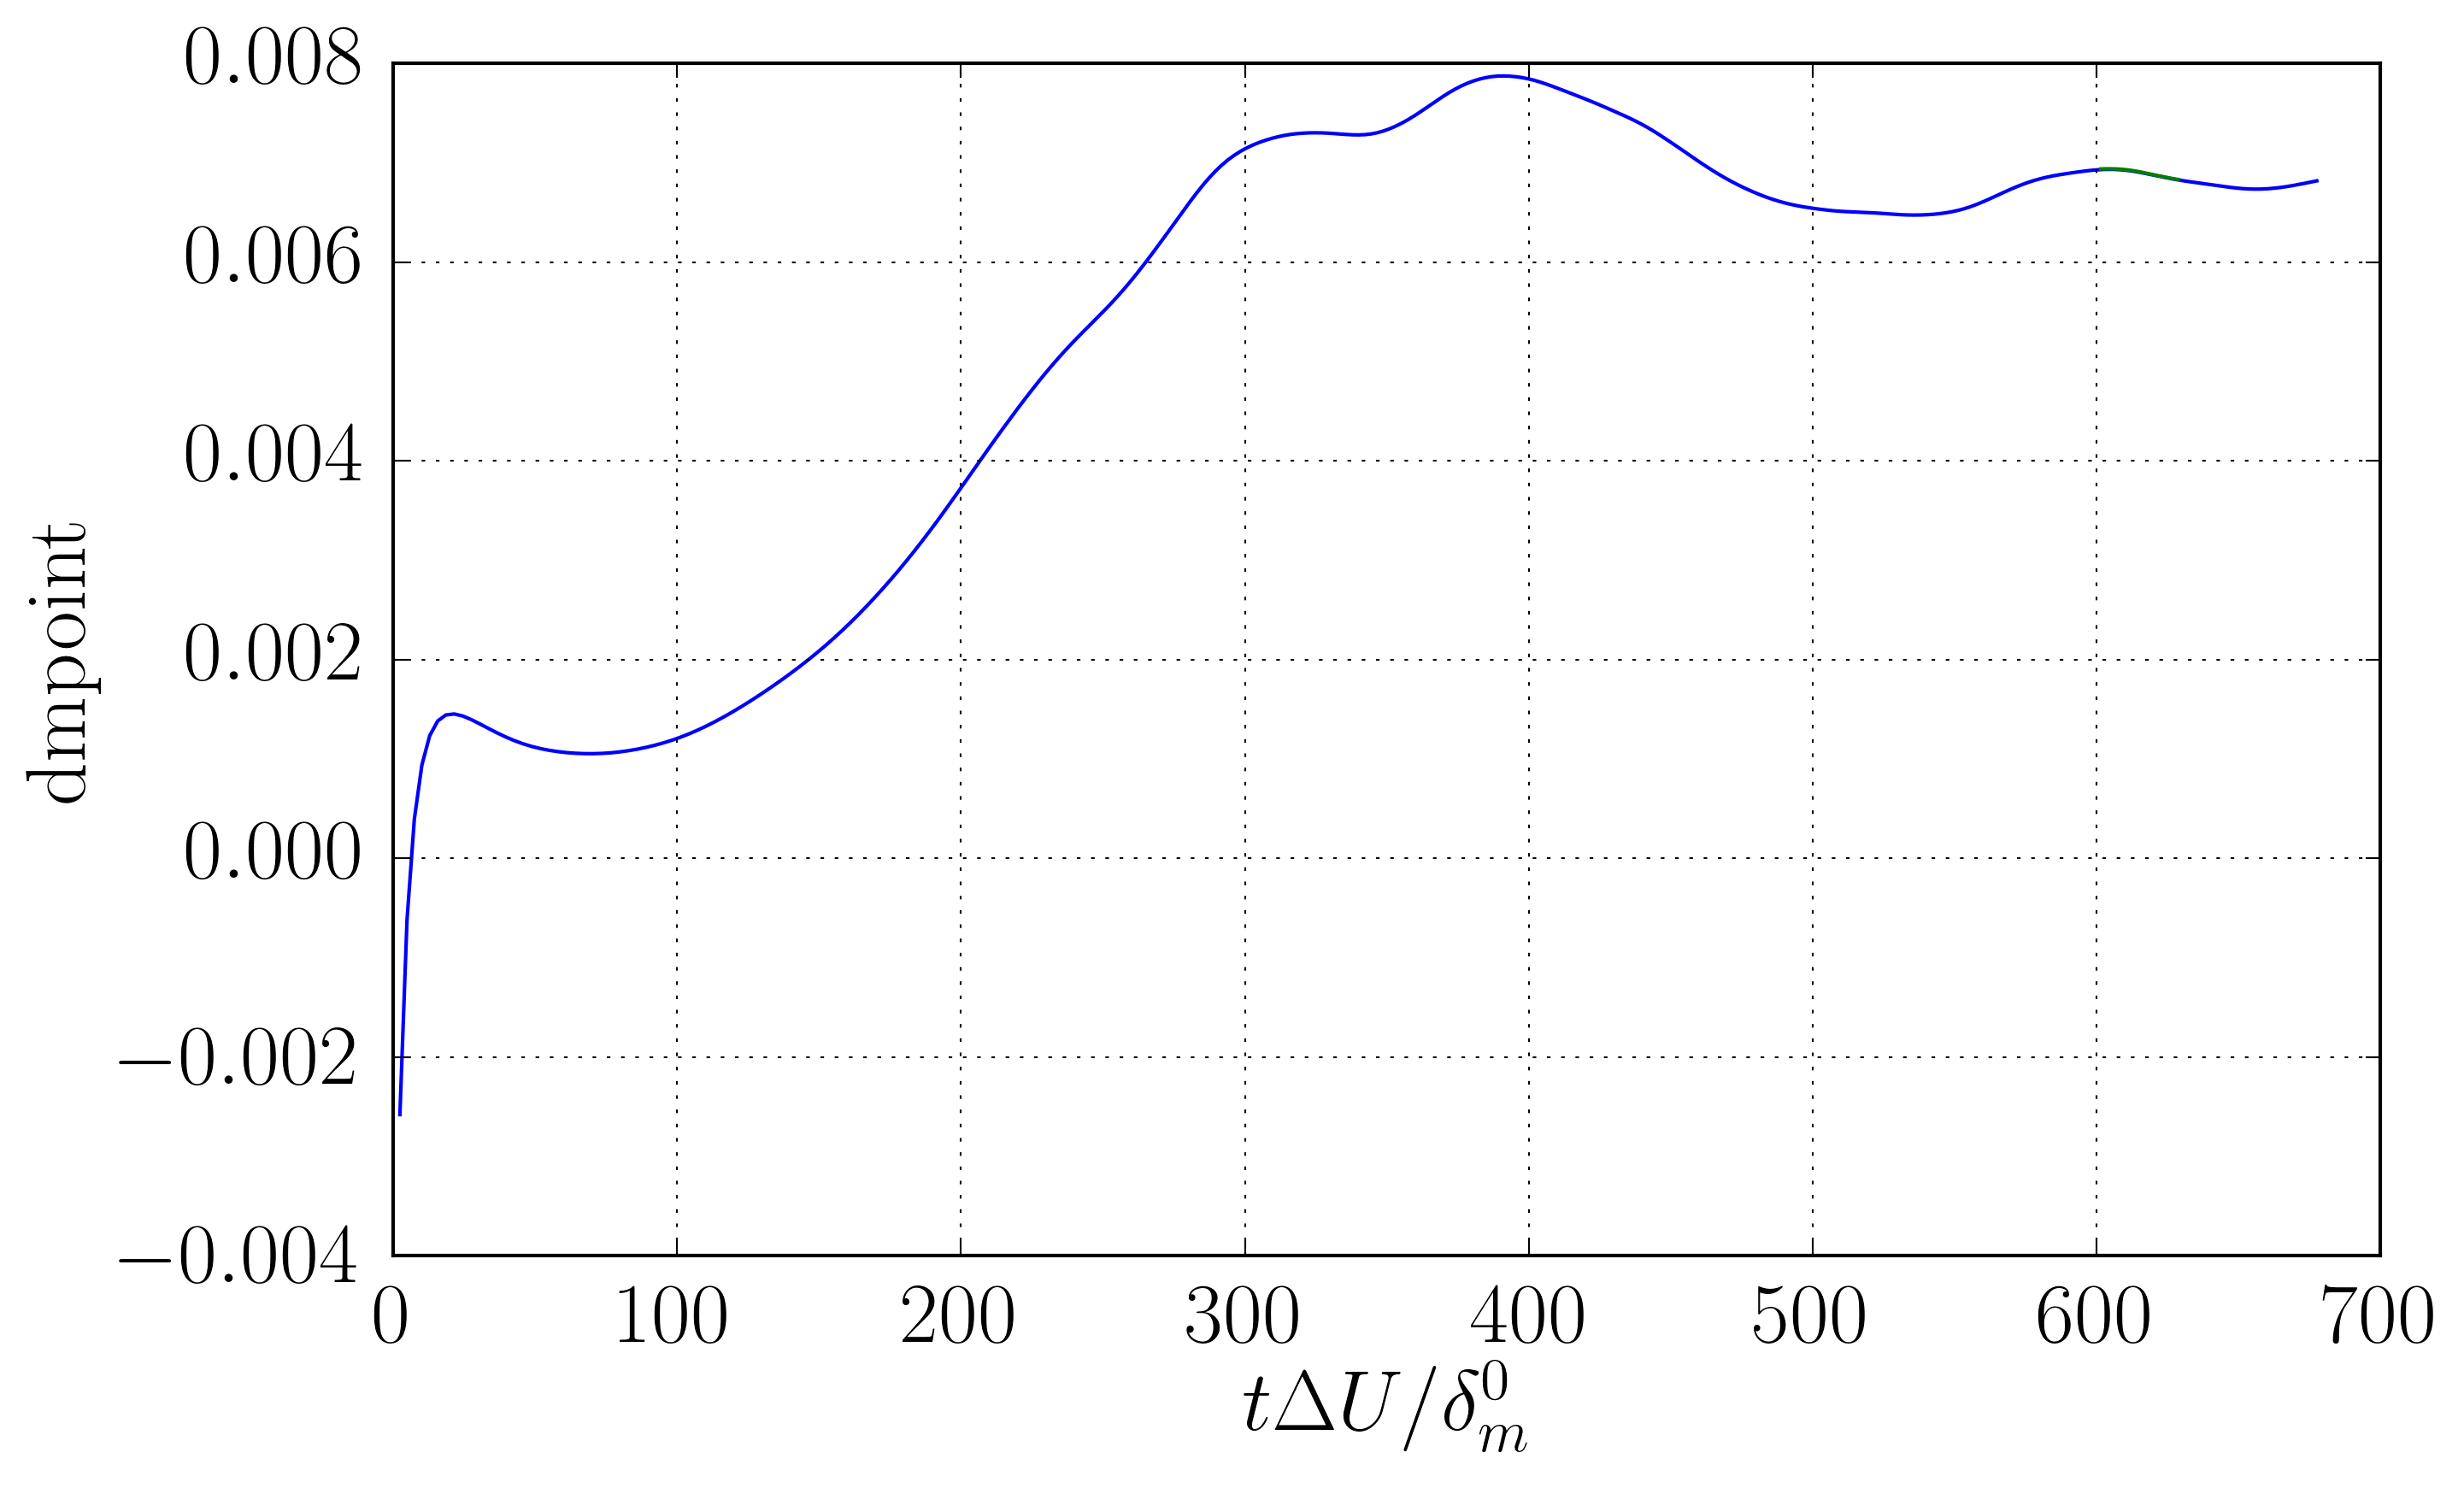

In [7]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'dmpoint'
var2 = 'dm'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/VDML/s80/test/03/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        fun = np.array(f[var]);
        fun2 = np.array(f[var2]);
    plt.plot(time,fun)
plt.xlabel(xlabel);
plt.ylabel(ylabel)
plt.grid('on')

diff time=2.19421386719
677.626647949
diff time=1.18408203125
628.841003418
813 0.0964774690325
0.0964774690325


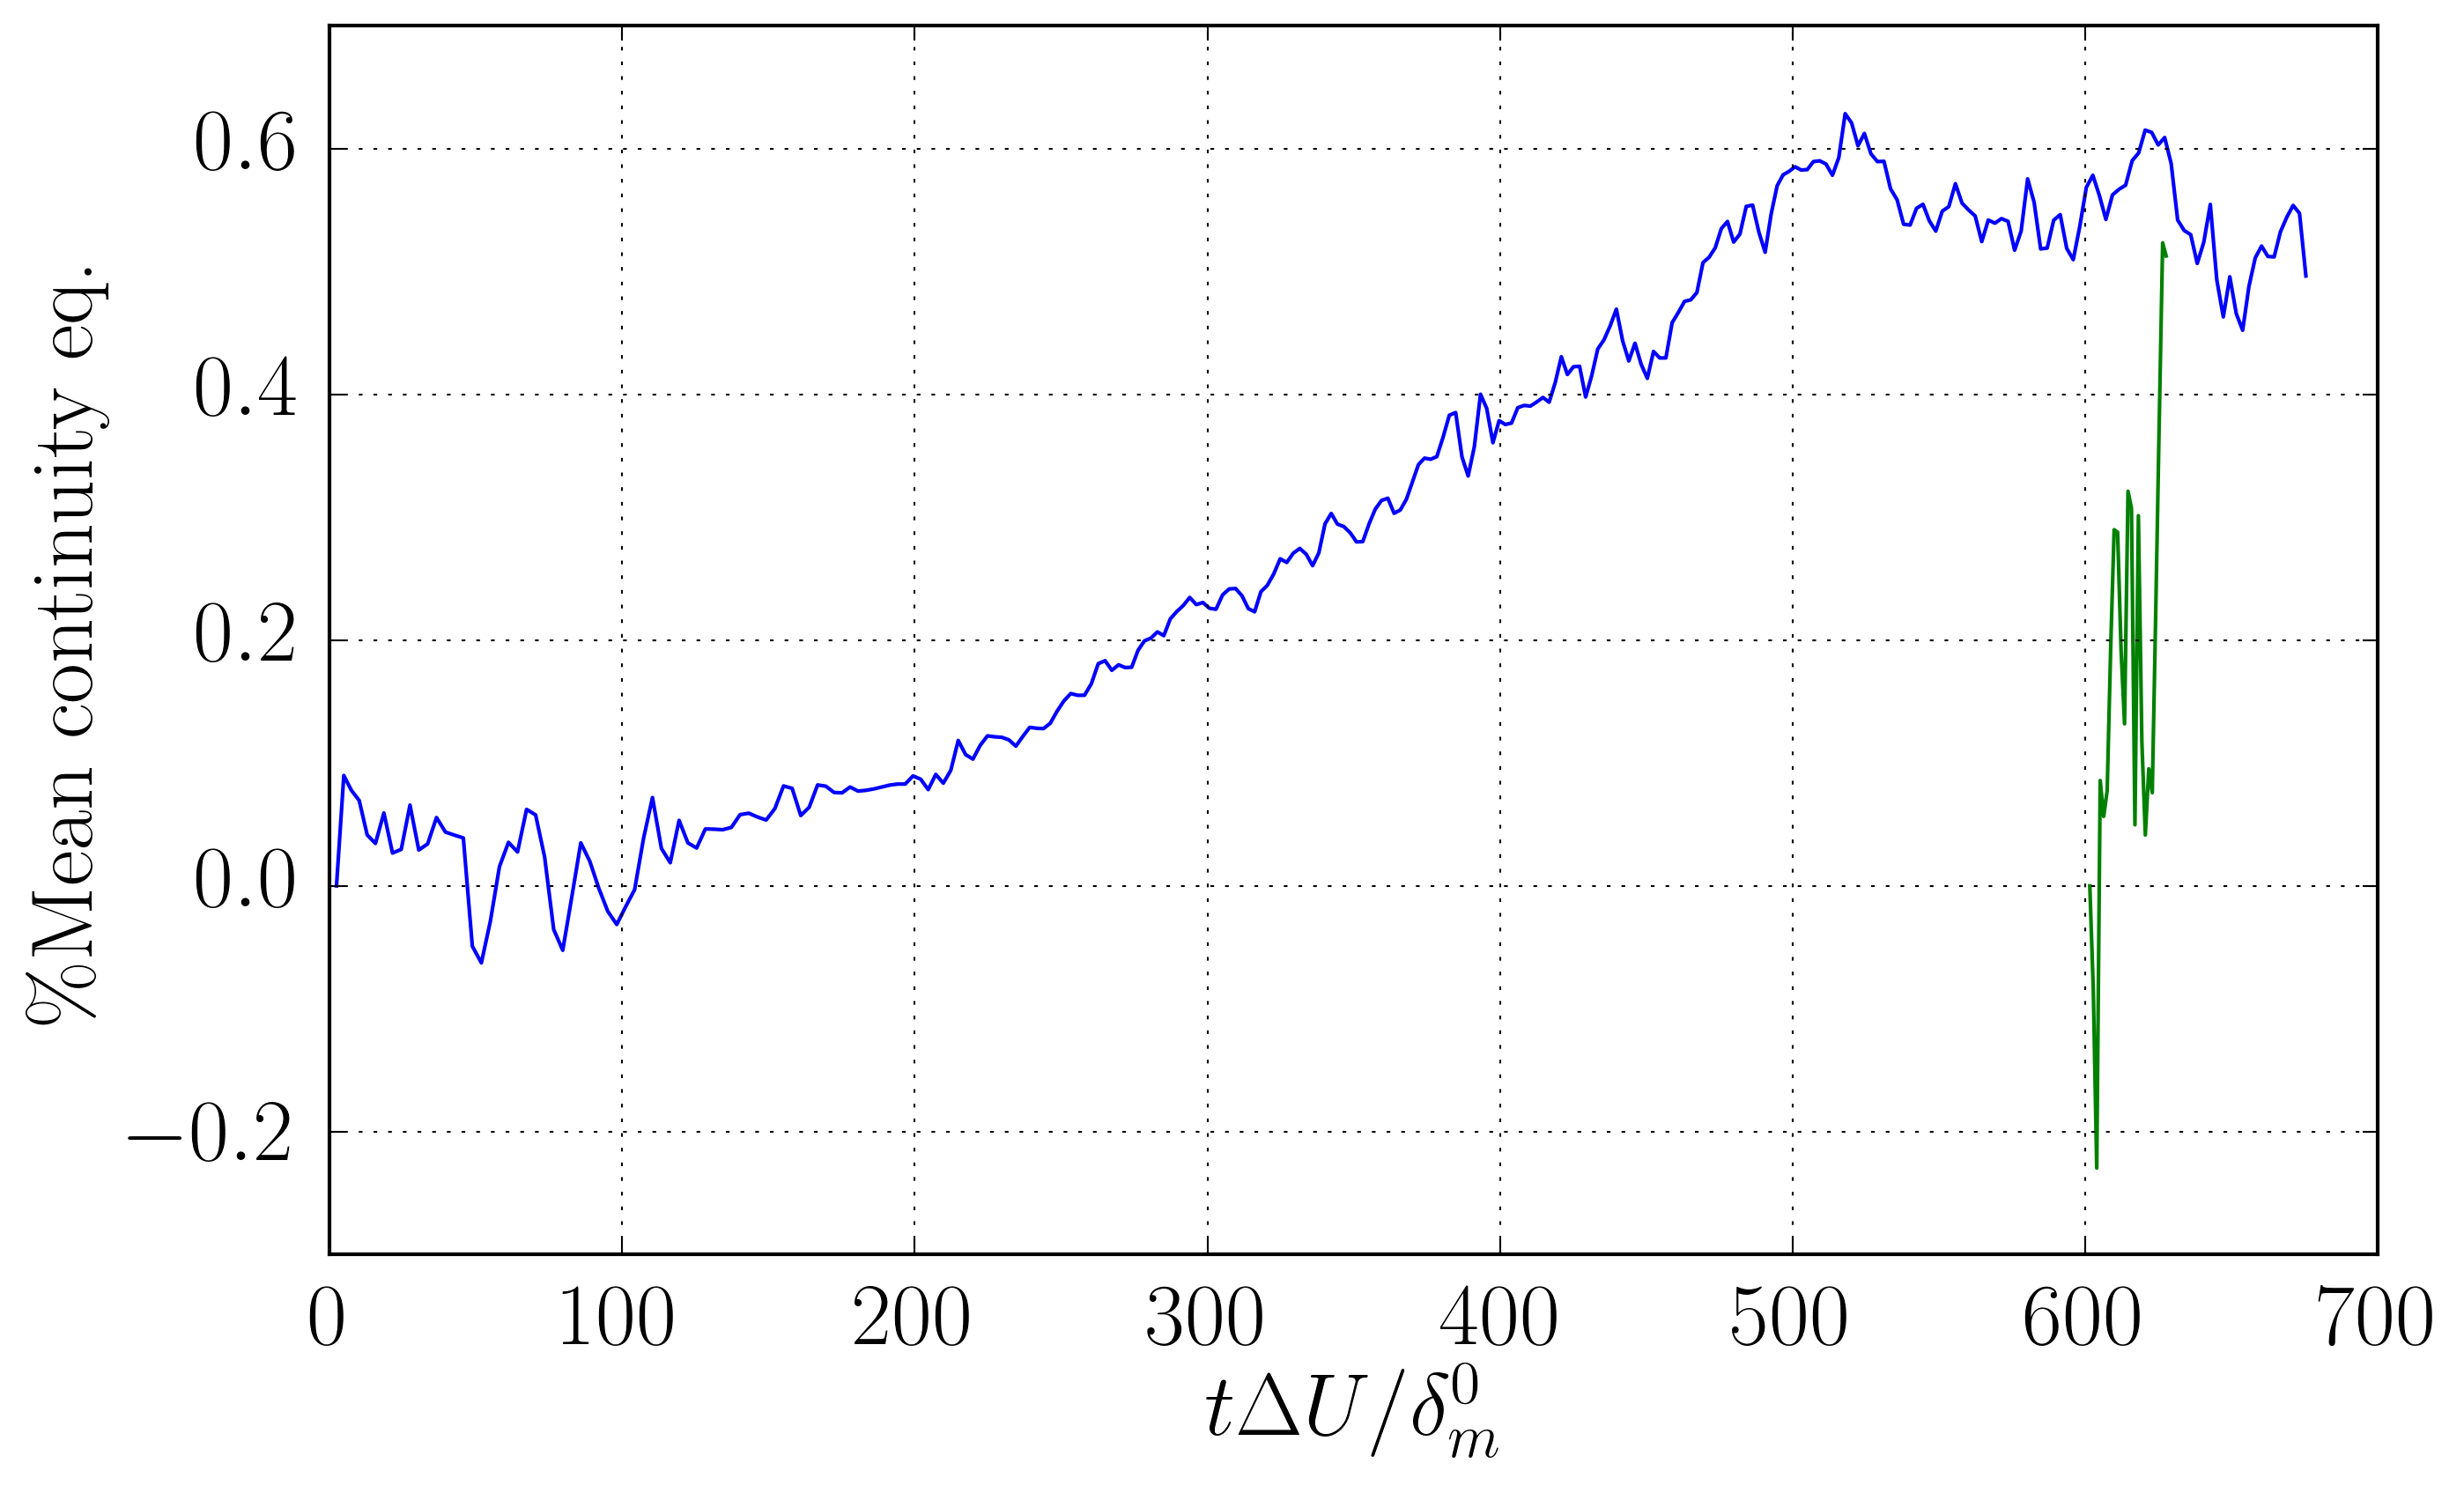

In [8]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'urms'
iobs=-1
ylabel = var
#ylabel="fun"
l_style=['b-','g*']
#'/share/drive/toni/VDML/s80/test/06/h5.stats',
p_folders= ['/share/drive/toni/VDML/s80/test/08/h5.stats','/share/drive/toni/VDML/s80/test/08/diffold/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/VDML/s80/test/03/h5.stats']
jj=0
vobs=[-1,-1]
for path in p_folders:
    iobs=vobs[jj]
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        bet = np.array(f['bet'])
        yf  =np.array(f['y'])
        dm  =np.array(f['dm'])
        rvm = np.array(f['rvm']);
        rhom = np.array(f['rhom']);
        dmpoint = np.array(f['dmpoint'])
        fun = np.array(f[var]);
        vcont = np.zeros(len(time))
        vcont2 = np.zeros(len(time))
        drhodt = np.zeros(len(time))
        #itmax = np.where(time<234.0)[0][-1]
        itmax=len(time)
        for ii in range(1,itmax-1):
            vcont[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii-1],yf))/(time[ii+1]-time[ii-1])+rvm[-1,ii+1]-rvm[0,ii])/np.max(rvm[:,ii])*100
            drhodt[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii],yf))/(time[ii+1]-time[ii]))
            vcont2[ii] = rvm[-1,ii+1]-rvm[0,ii+1]
        print "diff time=%s"%(np.diff(time)[-1])
    #plt.plot(yf,fun[:,iobs-2:iobs])#,l_style[jj]
    plt.plot(time[:-1],(vcont[:-1]))
    #plt.plot(time,dmpoint*100)
    #plt.plot(time[:-1],-(drhodt[:-1]),'--')
    print time[iobs]
    jj = jj +1
#plt.yscale('log')
#plt.plot(time,der1(time,dm)*20)
ylabel=r'$\% \textnormal{Mean continuity eq.}$'

plt.xlabel(xlabel);plt.ylabel(ylabel)
plt.grid('on')
#plt.ylim([0,5])
#plt.xlim([-10,10])
#plt.plot(yf[1:],np.diff(yf)
#plt.yscale('log')
#plt.ylim([-2,2])
print len(yf),np.diff(yf)[1]
print np.diff(yf)[-1]
plt.grid('on')

In [9]:
0.0187656*4

0.0750624

627.165344238
627.656921387


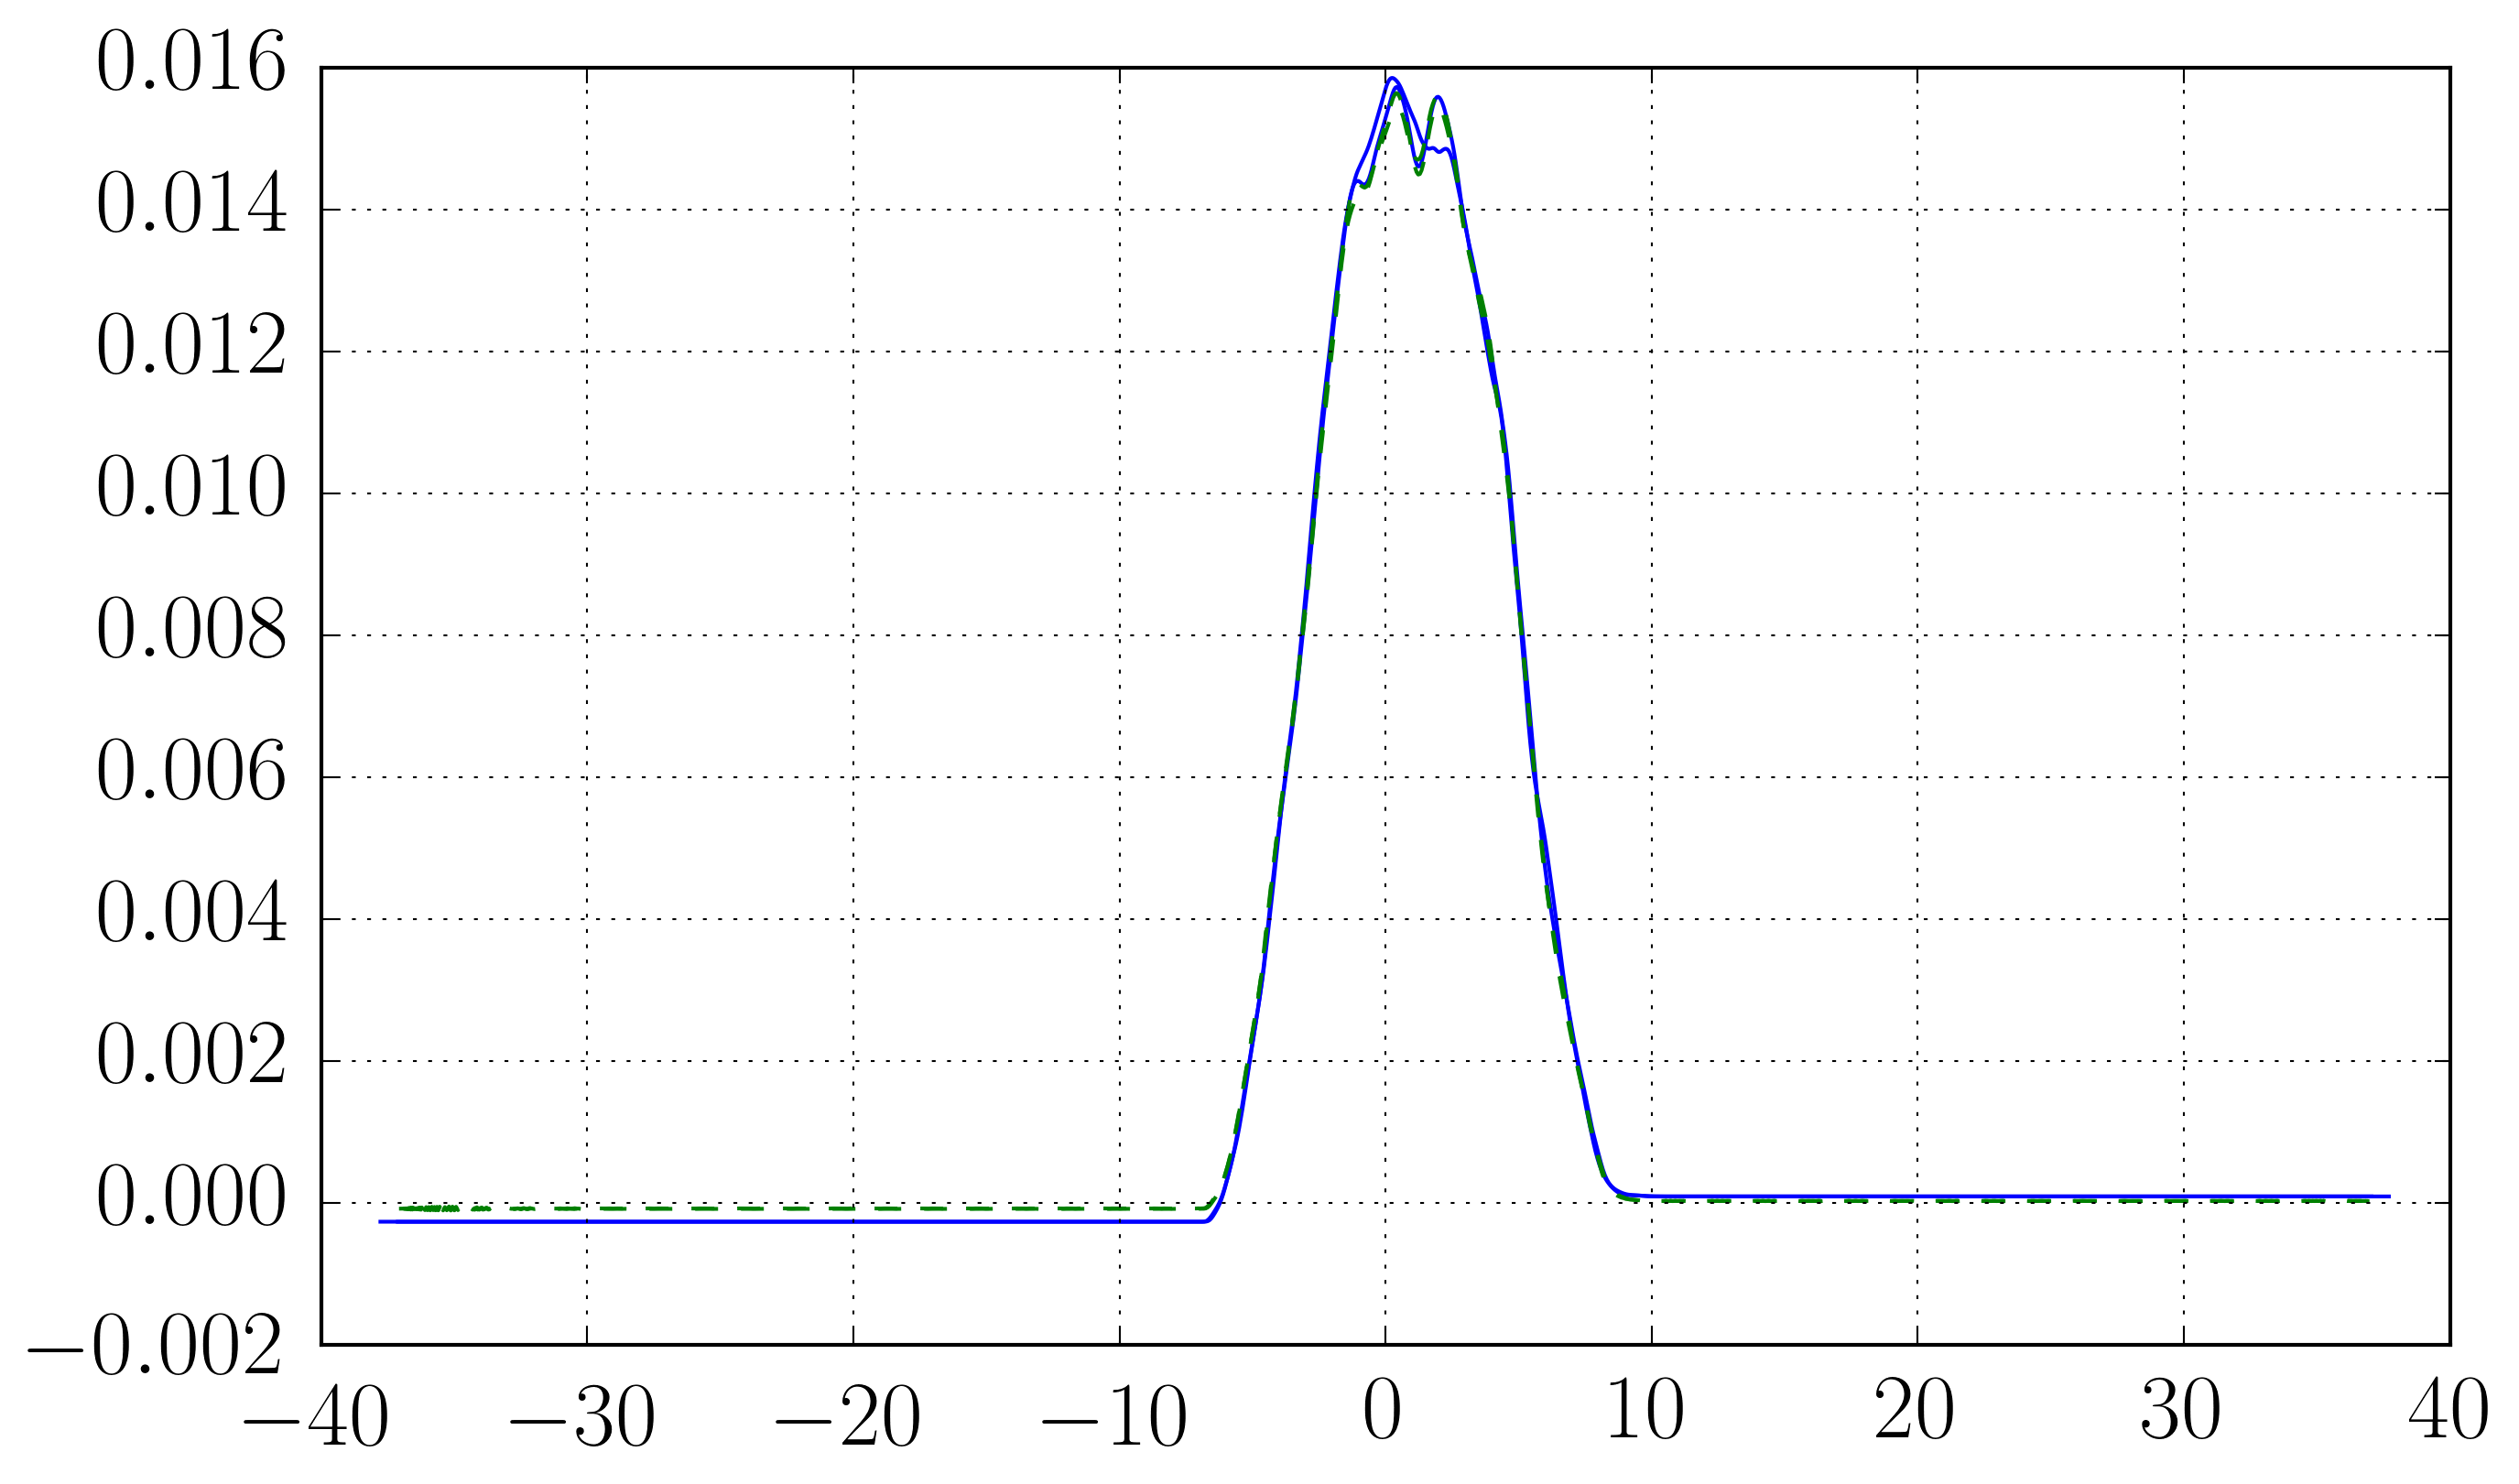

In [12]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'rvm'

ylabel = var
#ylabel="fun"
l_style=['b-','g--']
#'/share/drive/toni/VDML/s80/test/06/h5.stats',
p_folders= ['/share/drive/toni/VDML/s80/test/08/h5.stats','/share/drive/toni/VDML/s80/test/08/diffold/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/VDML/s80/test/03/h5.stats']
jj=0
vobs=[-1,2]
for path in p_folders:
    iobs=vobs[jj]
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        bet = np.array(f['bet'])
        yf  =np.array(f['y'])
        dm  =np.array(f['dm'])
        rvm = np.array(f['rvm']);
        rhom = np.array(f['rhom']);
        dmpoint = np.array(f['dmpoint'])
        fun = np.array(f[var]);
        vcont = np.zeros(len(time))
        itmax = np.where(time<628.0)[0][-1]
        #itmax = len(time)-1
        for ii in range(itmax-10,itmax,5):
            vcont[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii],yf))/(time[ii+1]-time[ii])+rvm[-1,ii]-rvm[0,ii])/np.max(rvm[:,ii])*100
    #plt.plot(yf,fun[:,iobs-2:iobs])#,l_style[jj]
            #plt.plot(yf/dm[ii],fun[:,ii]*rhom[:,ii]**(-0.5))
            plt.plot(yf/dm[ii],fun[:,ii],l_style[jj])
        print time[itmax]
    jj = jj +1
#plt.yscale('log')
#plt.plot(time,der1(time,dm)*20)
#ylabel=r'$\% \textnormal{Mean continuity eq.}$'

#plt.xlabel(xlabel);plt.ylabel(ylabel)
plt.grid('on')
#plt.ylim([0,1])
#plt.xlim([-20,50])
#plt.plot(yf[1:],np.diff(yf))
#print len(yf),np.diff(yf)[1]
#print np.diff(yf)[-1]

677.626647949
603.947814941
813 0.0964774690325
0.0964774690325


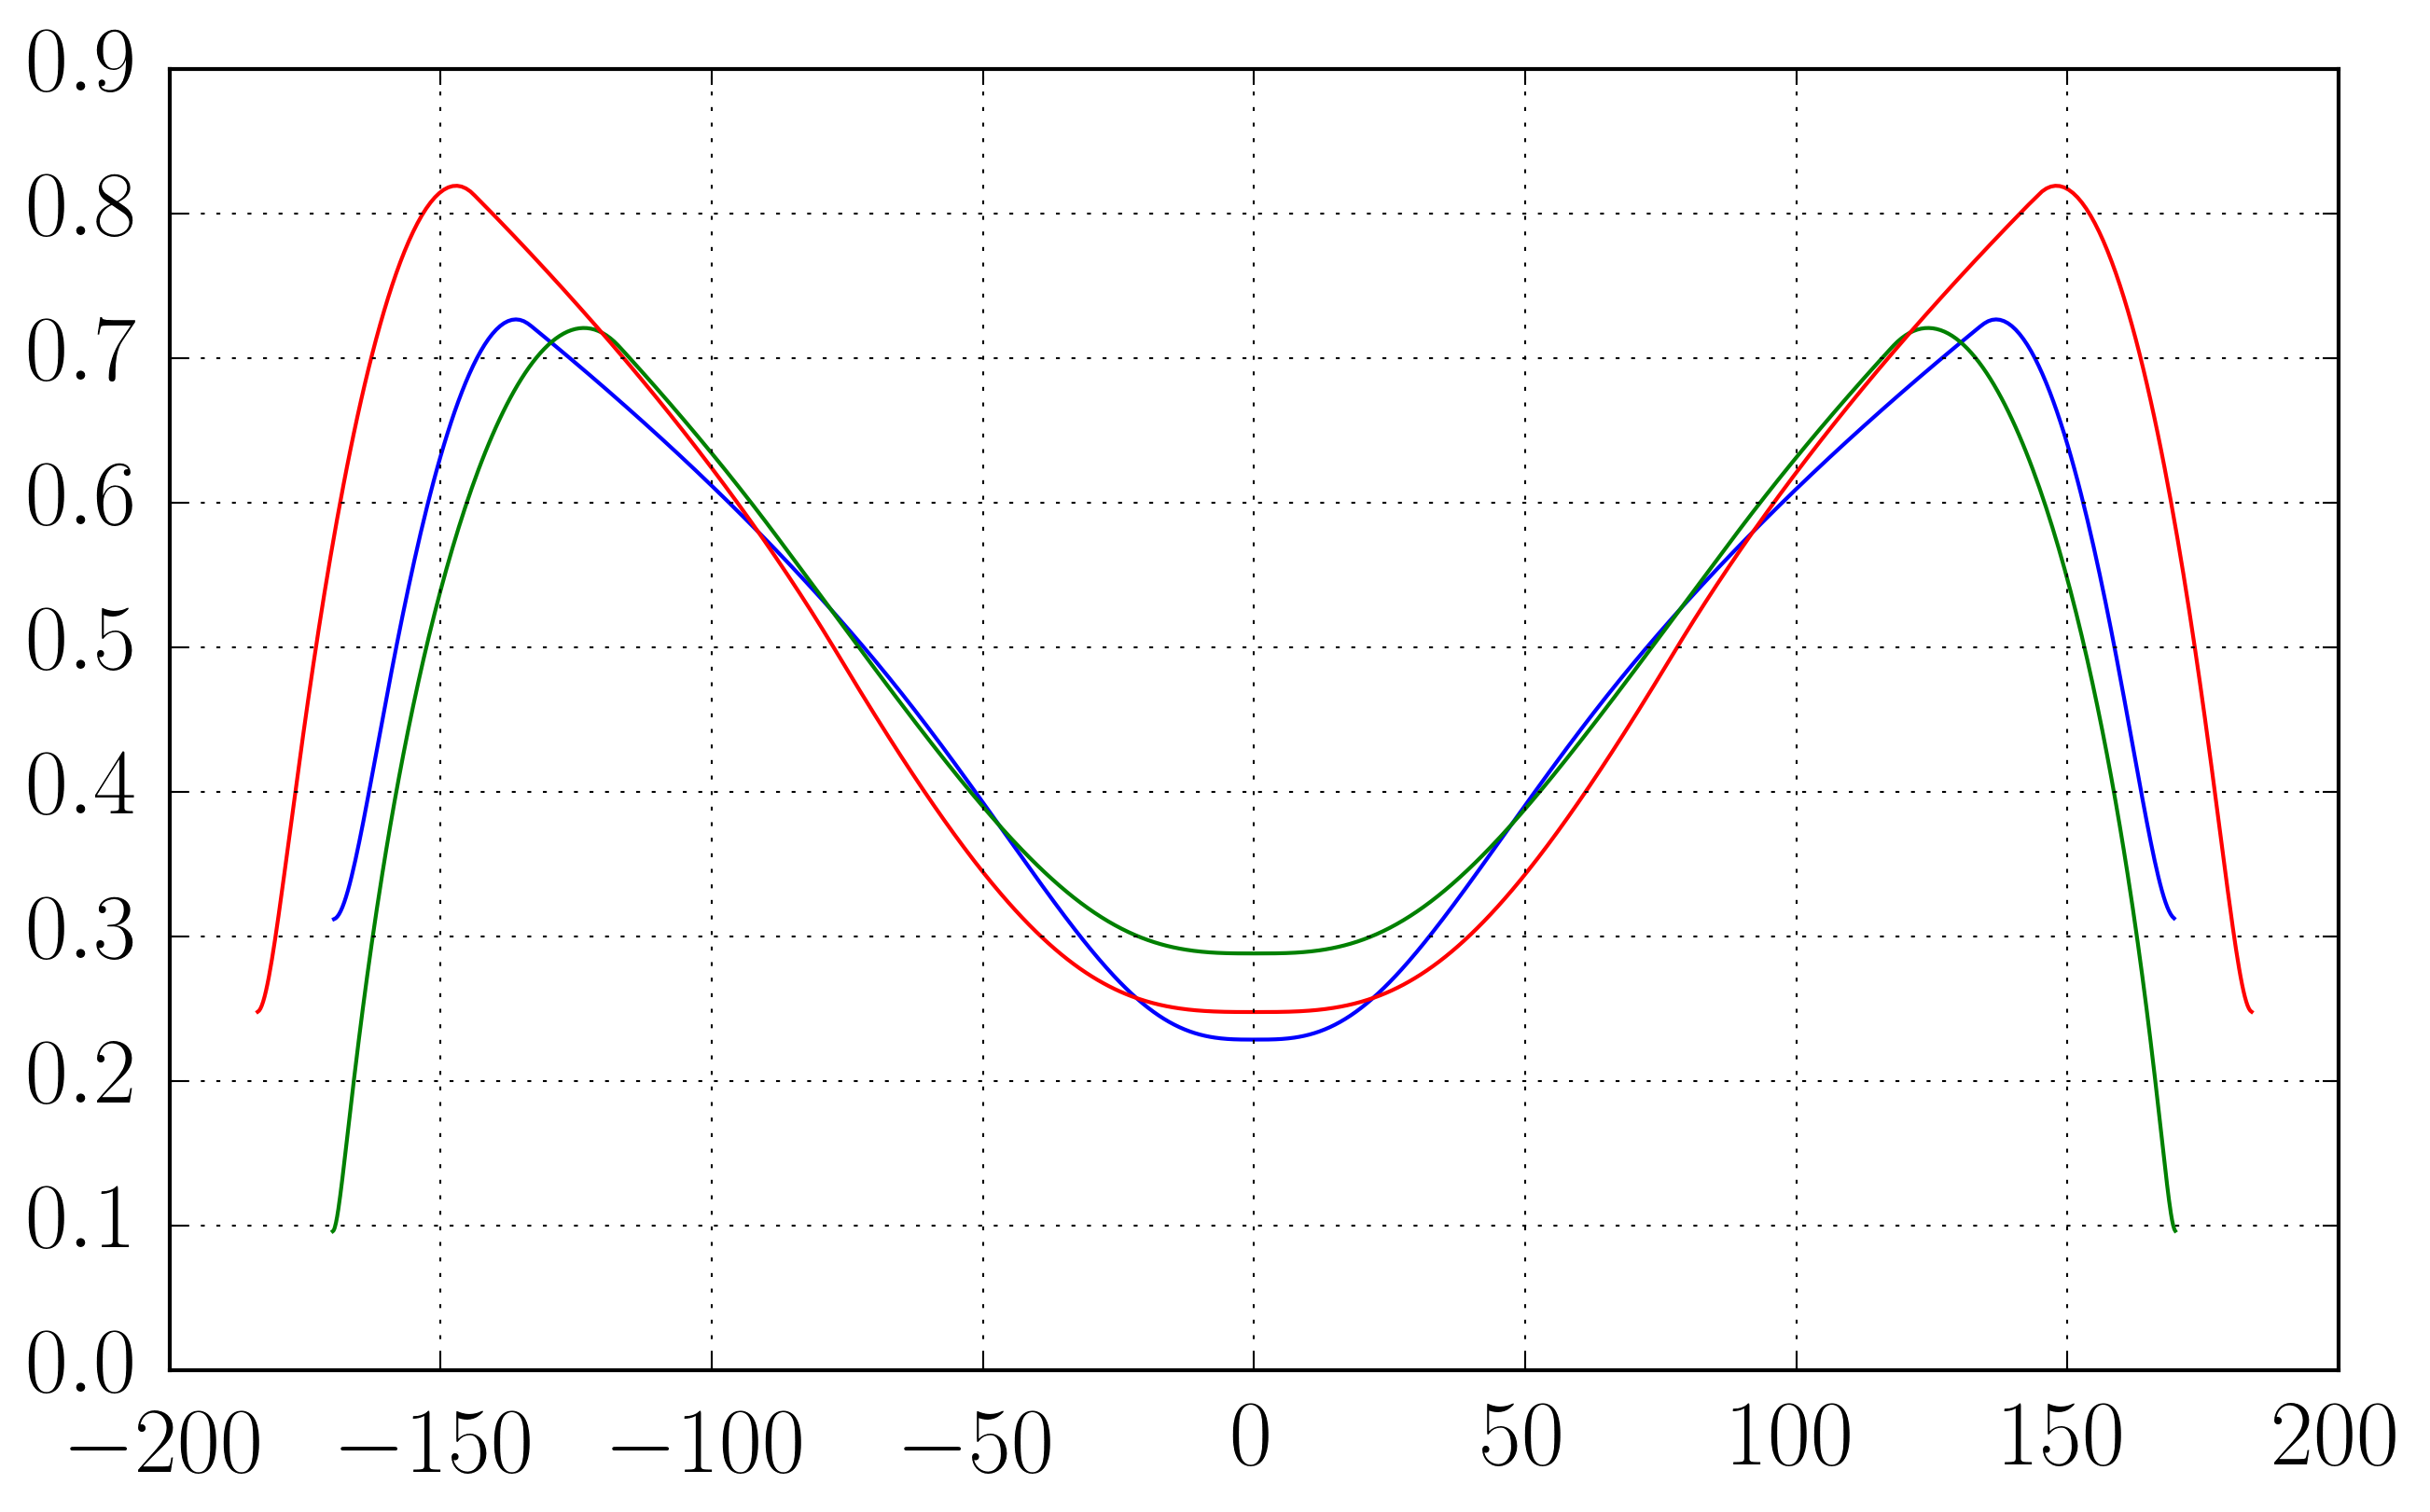

In [18]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'dyeta'

ylabel = var
#ylabel="fun"
l_style=['b-','g--']
#'/share/drive/toni/VDML/s80/test/06/h5.stats',
p_folders= ['/share/drive/toni/VDML/s80/test/08/h5.stats','/share/drive/toni/VDML/s80/test/08/diffold/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/VDML/s80/test/03/h5.stats']
jj=0
vobs=[-1,2]
for path in p_folders:
    iobs=vobs[jj]
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        bet = np.array(f['bet'])
        yf  =np.array(f['y'])
        dm  =np.array(f['dm'])
        rvm = np.array(f['rvm']);
        rhom = np.array(f['rhom']);
        dmpoint = np.array(f['dmpoint'])
        fun = np.array(f[var]);
        vcont = np.zeros(len(time))
        itmax = np.where(time<620.0)[0][-1]
        #itmax = len(time)-1
        for ii in range(itmax-10,itmax,5):
            vcont[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii],yf))/(time[ii+1]-time[ii])+rvm[-1,ii]-rvm[0,ii])/np.max(rvm[:,ii])*100
    #plt.plot(yf,fun[:,iobs-2:iobs])#,l_style[jj]
            #plt.plot(yf/dm[ii],fun[:,ii]*rhom[:,ii]**(-0.5))
            #plt.plot(yf/dm[ii],fun[:,ii])
        print time[iobs]
        #np.savetxt('/home/toni/s80_test_02_my801.txt',yf)
        plt.plot(yf[1:],np.diff(yf))
    jj = jj +1
#plt.yscale('log')
#plt.plot(time,der1(time,dm)*20)
#ylabel=r'$\% \textnormal{Mean continuity eq.}$'

#plt.xlabel(xlabel);plt.ylabel(ylabel)
plt.grid('on')
#plt.ylim([0,1])
#plt.xlim([-20,50])
#plt.plot(yf[1:],np.diff(yf))
print len(yf),np.diff(yf)[1]
print np.diff(yf)[-1]
filename='/home/toni/Ly368Dy025my851.txt'
y = np.loadtxt(filename)
plt.plot(y[1:],np.diff(y),'r-')

In [1225]:
readASCII?

In [58]:
#Read continuity

kk = readASCII('/share/drive/toni/VDML/s80/test/02/test/SS_01.cf')

Reading file of 5 lines and 21 columns


In [59]:
trapz = kk[4,:]
intrhom = kk[5,:]

3 4


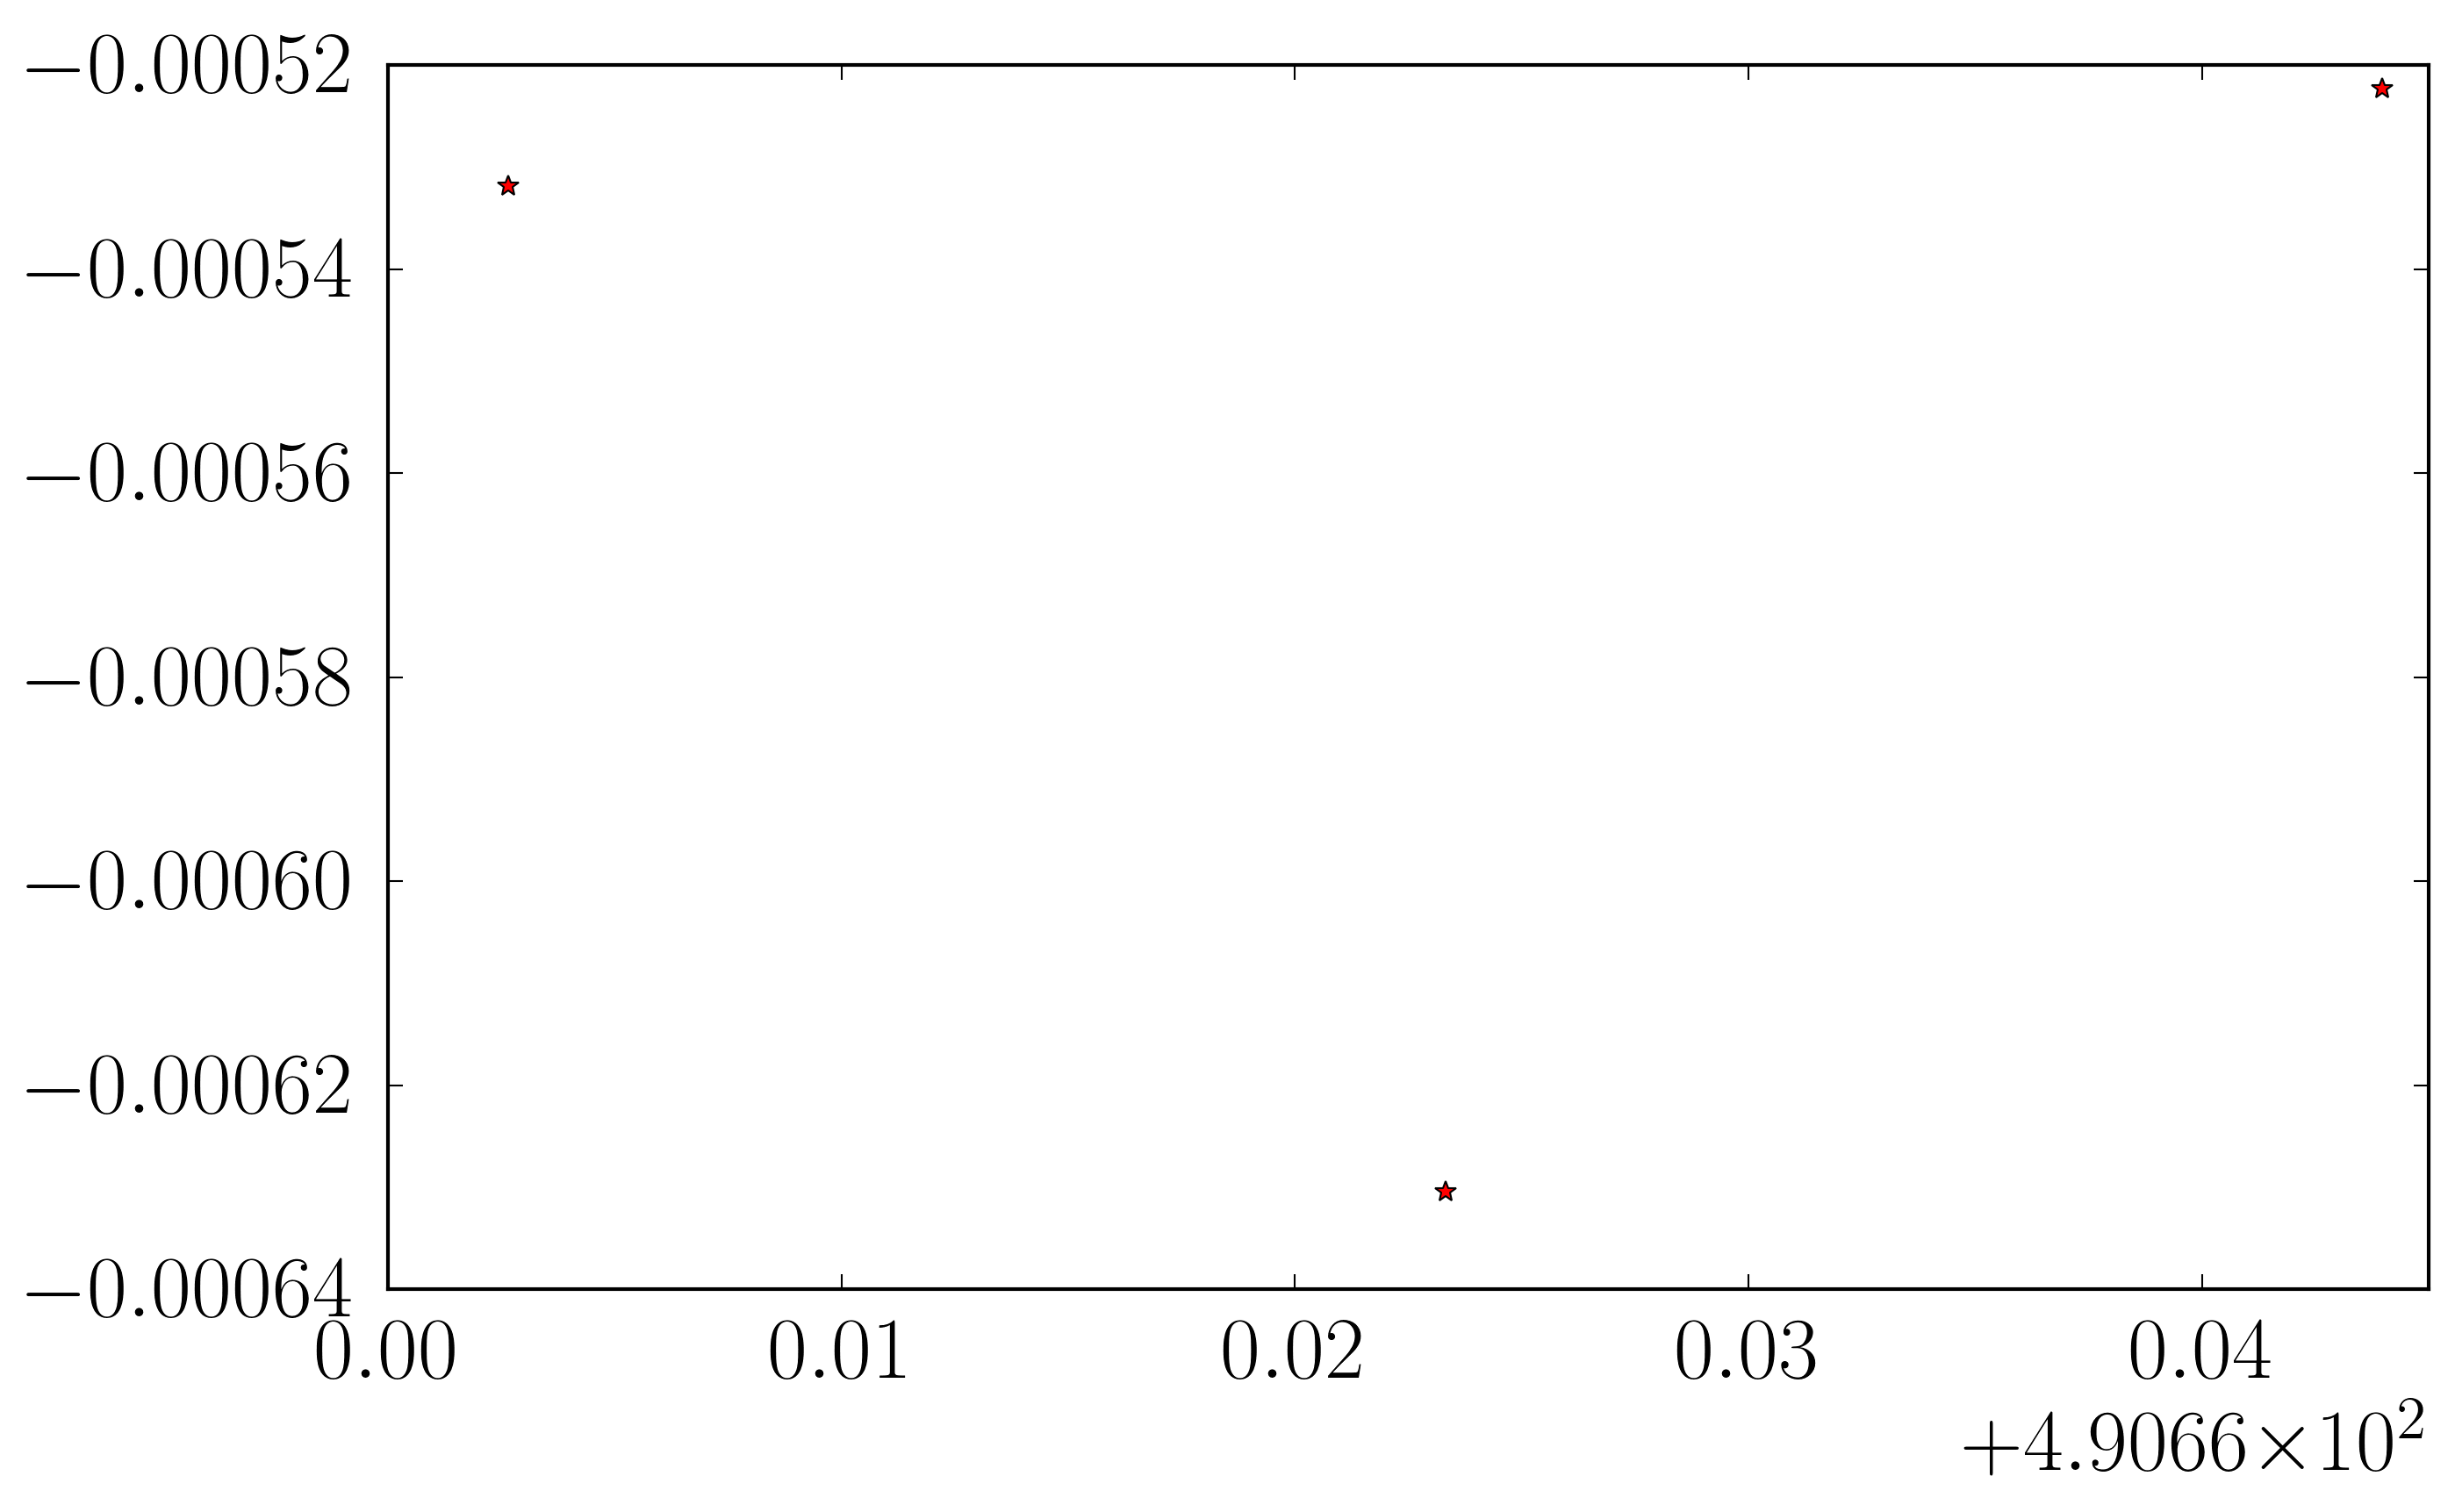

In [65]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
vtime = kk[0,:]
cont1 = (intrhom[1:]-intrhom[:-1])/(vtime[1:]-vtime[:-1])
cont2 = (intrhom[:-1]-intrhom[1:])/(vtime[:-1]-vtime[1:])
cont3 = (cont1+cont2)/2
#cont4 = (intrhom[4:]-intrhom[:-4])/(vtime[4:]-vtime[:-4])
print len(vtime[2:]),len(cont2)
plt.plot(vtime[2:],(intrhom[1:]-intrhom[:-1])[1:]/np.diff(vtime)[1:]+trapz[1:-1],'r*')
#plt.plot(vtime[2:],trapz[2:])
#plt.plot(vtime[1:-1],cont2[1:]+trapz[1:-1])
#plt.plot(vtime[2:-1],cont3[1:-1]+trapz[2:-1])
#plt.plot(vtime[1:],cont1[1:]+trapz[1:])
#plt.plot(vtime[3:-2],cont4[1:])

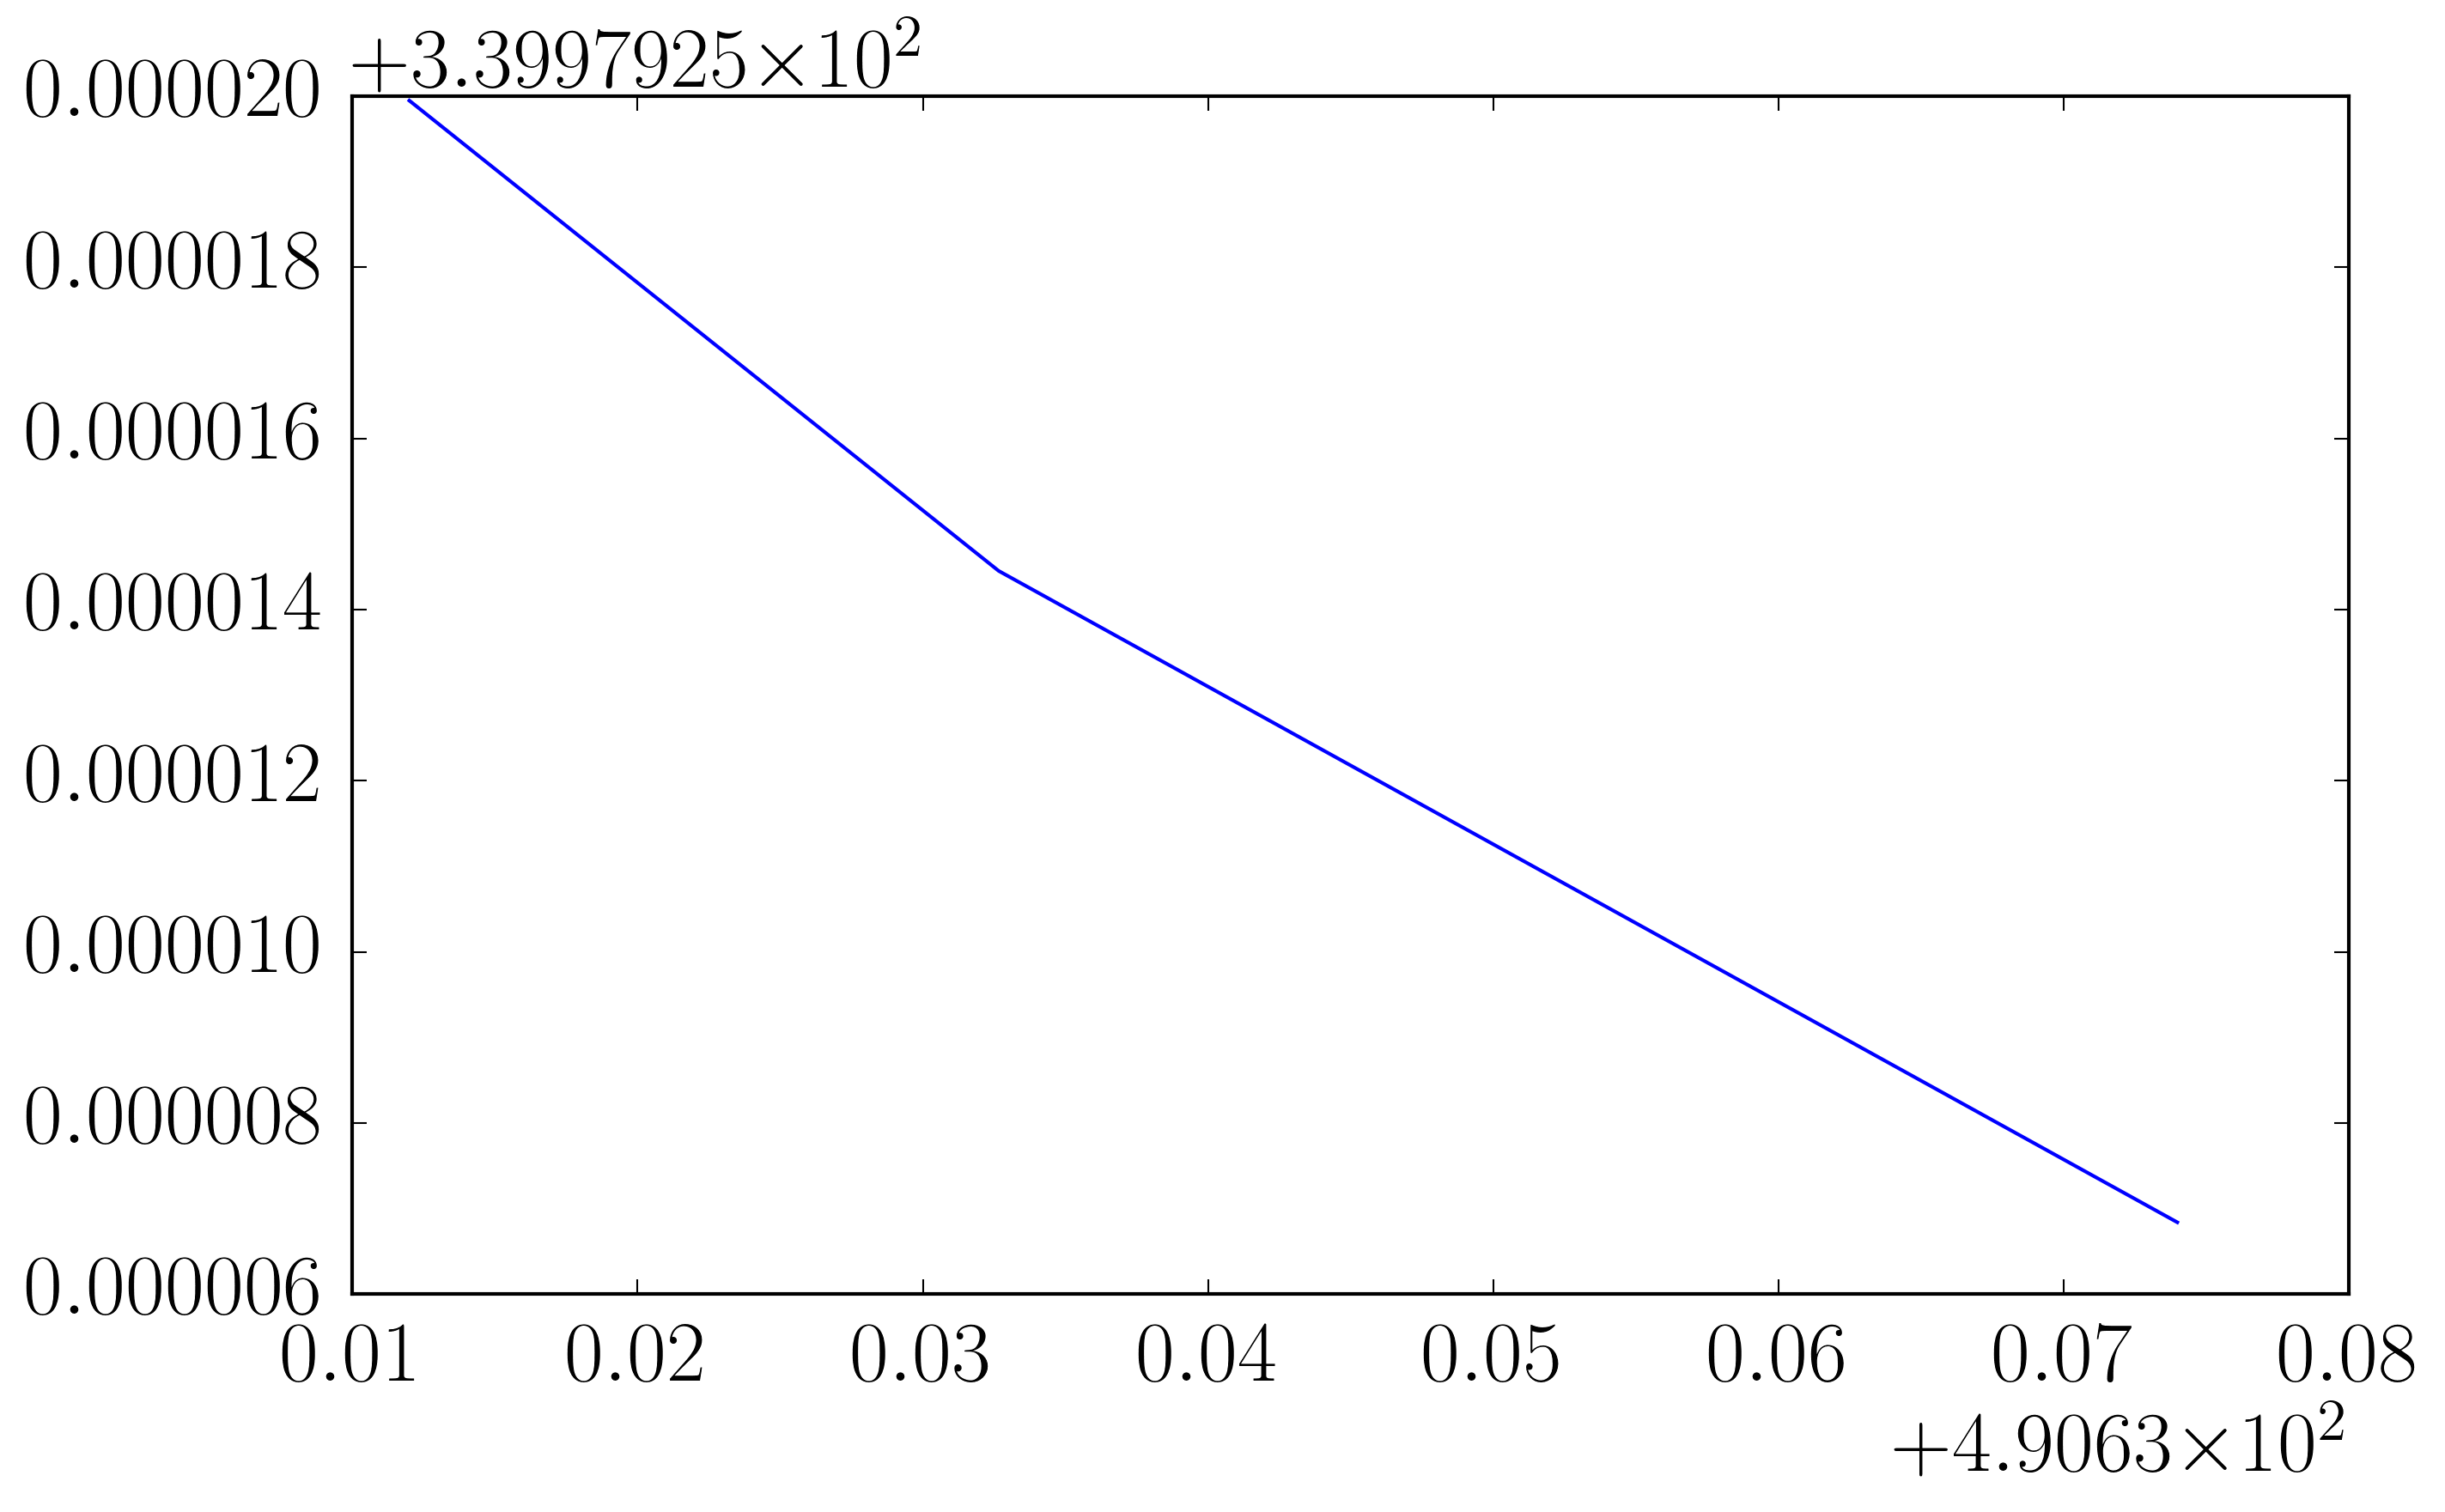

In [64]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
plt.plot(vtime[1:],intrhom[1:])
#plt.plot(vtime[1:],cont1[1:]+trapz[1:])
#plt.plot(vtime[3:-2],cont4[1:])

### CFL ANALYSIS

In [91]:
#p_folders   = [ '/share/drive/toni/VDML/s80/test/05/tanhLy250/'] 
p_folders   = [ '/share/drive/toni/VDML/s10/test/00/'] 
p_folders   = [ '/share/drive/toni/VDML/s80/CFL/025/','/share/drive/toni/VDML/s80/CFL/0125/','/share/drive/toni/VDML/s80/CFL/05/'] 
#p_folders   = [ '/share/drive/toni/VDML/s80/test/02/test/'] 
#,'/share/drive/toni/VDML/s80/test/06/01/'
#p_folders=['/share/drive/toni/VDML/s80/test/05/']
l_sta_opt = [3,3,3]
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    #l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_sta_files[ijob][0],l_sta_files[ijob][-1]) 
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_sta_files[ijob])
print nfiles
stats = []
for i in range(njobs):
    for j in range(len(l_sta_files[ijob])):
        stats.append([])
for ijob in range(njobs):
    print ijob
    print l_sta_opt[ijob]
    #for every stafiles in l_sta_files list:
    for fsta,ista in zip(l_sta_files[ijob],range(len(l_sta_files[ijob]))):
        temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        #temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        stats[ijob].append(temp)
#Special variables is'y'
l_var_unique = ['alp','bet','Re','nacum']
l_var_profiles=[]
l_var_point=[]
y = stats[0][0]['y']
my = len(y)
time = stats[0][0]
for key in stats[0][0].keys():
    if size(stats[0][0][key])==my and key!='y':
        l_var_profiles.append(key)
    elif key!='y' and key not in l_var_unique:
        l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point
# add a big axes, hide frame
# hide tick and tick label of the big axes
for ijob in range(njobs):
    nsta = len(l_sta_files[ijob])
    v_temp=np.zeros(nsta)
    y = stats[ijob][0]['y']
    my = len(y)
    matriz = np.zeros([my,nsta])
    path = p_folders[ijob]+'h5.stats'
    with h5py.File(path,"w") as f:
        f['y']=y
        print "my=%s"%(len(y))
        for variable in l_var_unique:
            f[variable]=stats[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,stats[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            ista = 0
            for ista in range(nsta):
                v_temp[ista] = stats[ijob][ista][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
            if variable=='time':
                vtime = np.array(v_temp)
            if variable=='dm':
                vdm  = np.array(v_temp)
            if variable=='dw':
                vdw  = np.array(v_temp)
            if variable=='EPS':
                vEPS  = np.array(v_temp)
            if variable=='Relambda':
                vLambda  = np.array(v_temp)
            if variable=='dmpoint':
                vdmpoint  = np.array(v_temp)
            if variable=='dmpoint2':
                vdmpoint2  = np.array(v_temp)
        for variable in l_var_profiles:
            for ista in range(nsta):
                matriz[:,ista]=stats[ijob][ista][variable]
            f[variable]=matriz

['/share/drive/toni/VDML/s80/CFL/025/', '/share/drive/toni/VDML/s80/CFL/0125/', '/share/drive/toni/VDML/s80/CFL/05/']
job(1): 1st file = /share/drive/toni/VDML/s80/CFL/025/a_01_001.sta, last file = /share/drive/toni/VDML/s80/CFL/025/a_01_051.sta
job(2): 1st file = /share/drive/toni/VDML/s80/CFL/0125/b_01_001.sta, last file = /share/drive/toni/VDML/s80/CFL/0125/b_01_101.sta
job(3): 1st file = /share/drive/toni/VDML/s80/CFL/05/c_01_001.sta, last file = /share/drive/toni/VDML/s80/CFL/05/c_01_011.sta
[51, 101, 11]
0
3
1
3
2
3
['dyeta', 'wrms', 'llambda', 'w1rms', 'w3m', 'w2rms', 'R33', 'w3rms', 'them', 'urms', 'rwm', 'thep', 'Relambday', 'uv', 'um', 'epNH', 'XI', 'vm', 'rvm', 'Tm', 'vrms', 'R12', 'R11', 'TT', 'mum', 'nu', 'rum', 'wm', 'epR', 'epS', 'w1m', 'rhom', 'epD', 'Trms', 'k', 'w2m', 'eta', 'R22']
['EPS', 'Relambda', 'dm', 'dw', 'rhoEPS', 'dmpoint', 'etamin', 'time']
my=851
Writing alp = [ 0.0187656], for ijob = 0
Writing bet = [ 0.0727], for ijob = 0
Writing Re = [ 160.], for ijob =

diff time=0.00946044921875
385.396820068
diff time=0.0188903808594
385.803344727
diff time=0.0378112792969
385.216796875
851 0.248712916979
0.247991589001
[ 0.00100708  0.03781128  0.03781128  0.03781128  0.03781128  0.03781128
  0.03781128  0.03781128  0.03781128  0.03781128]


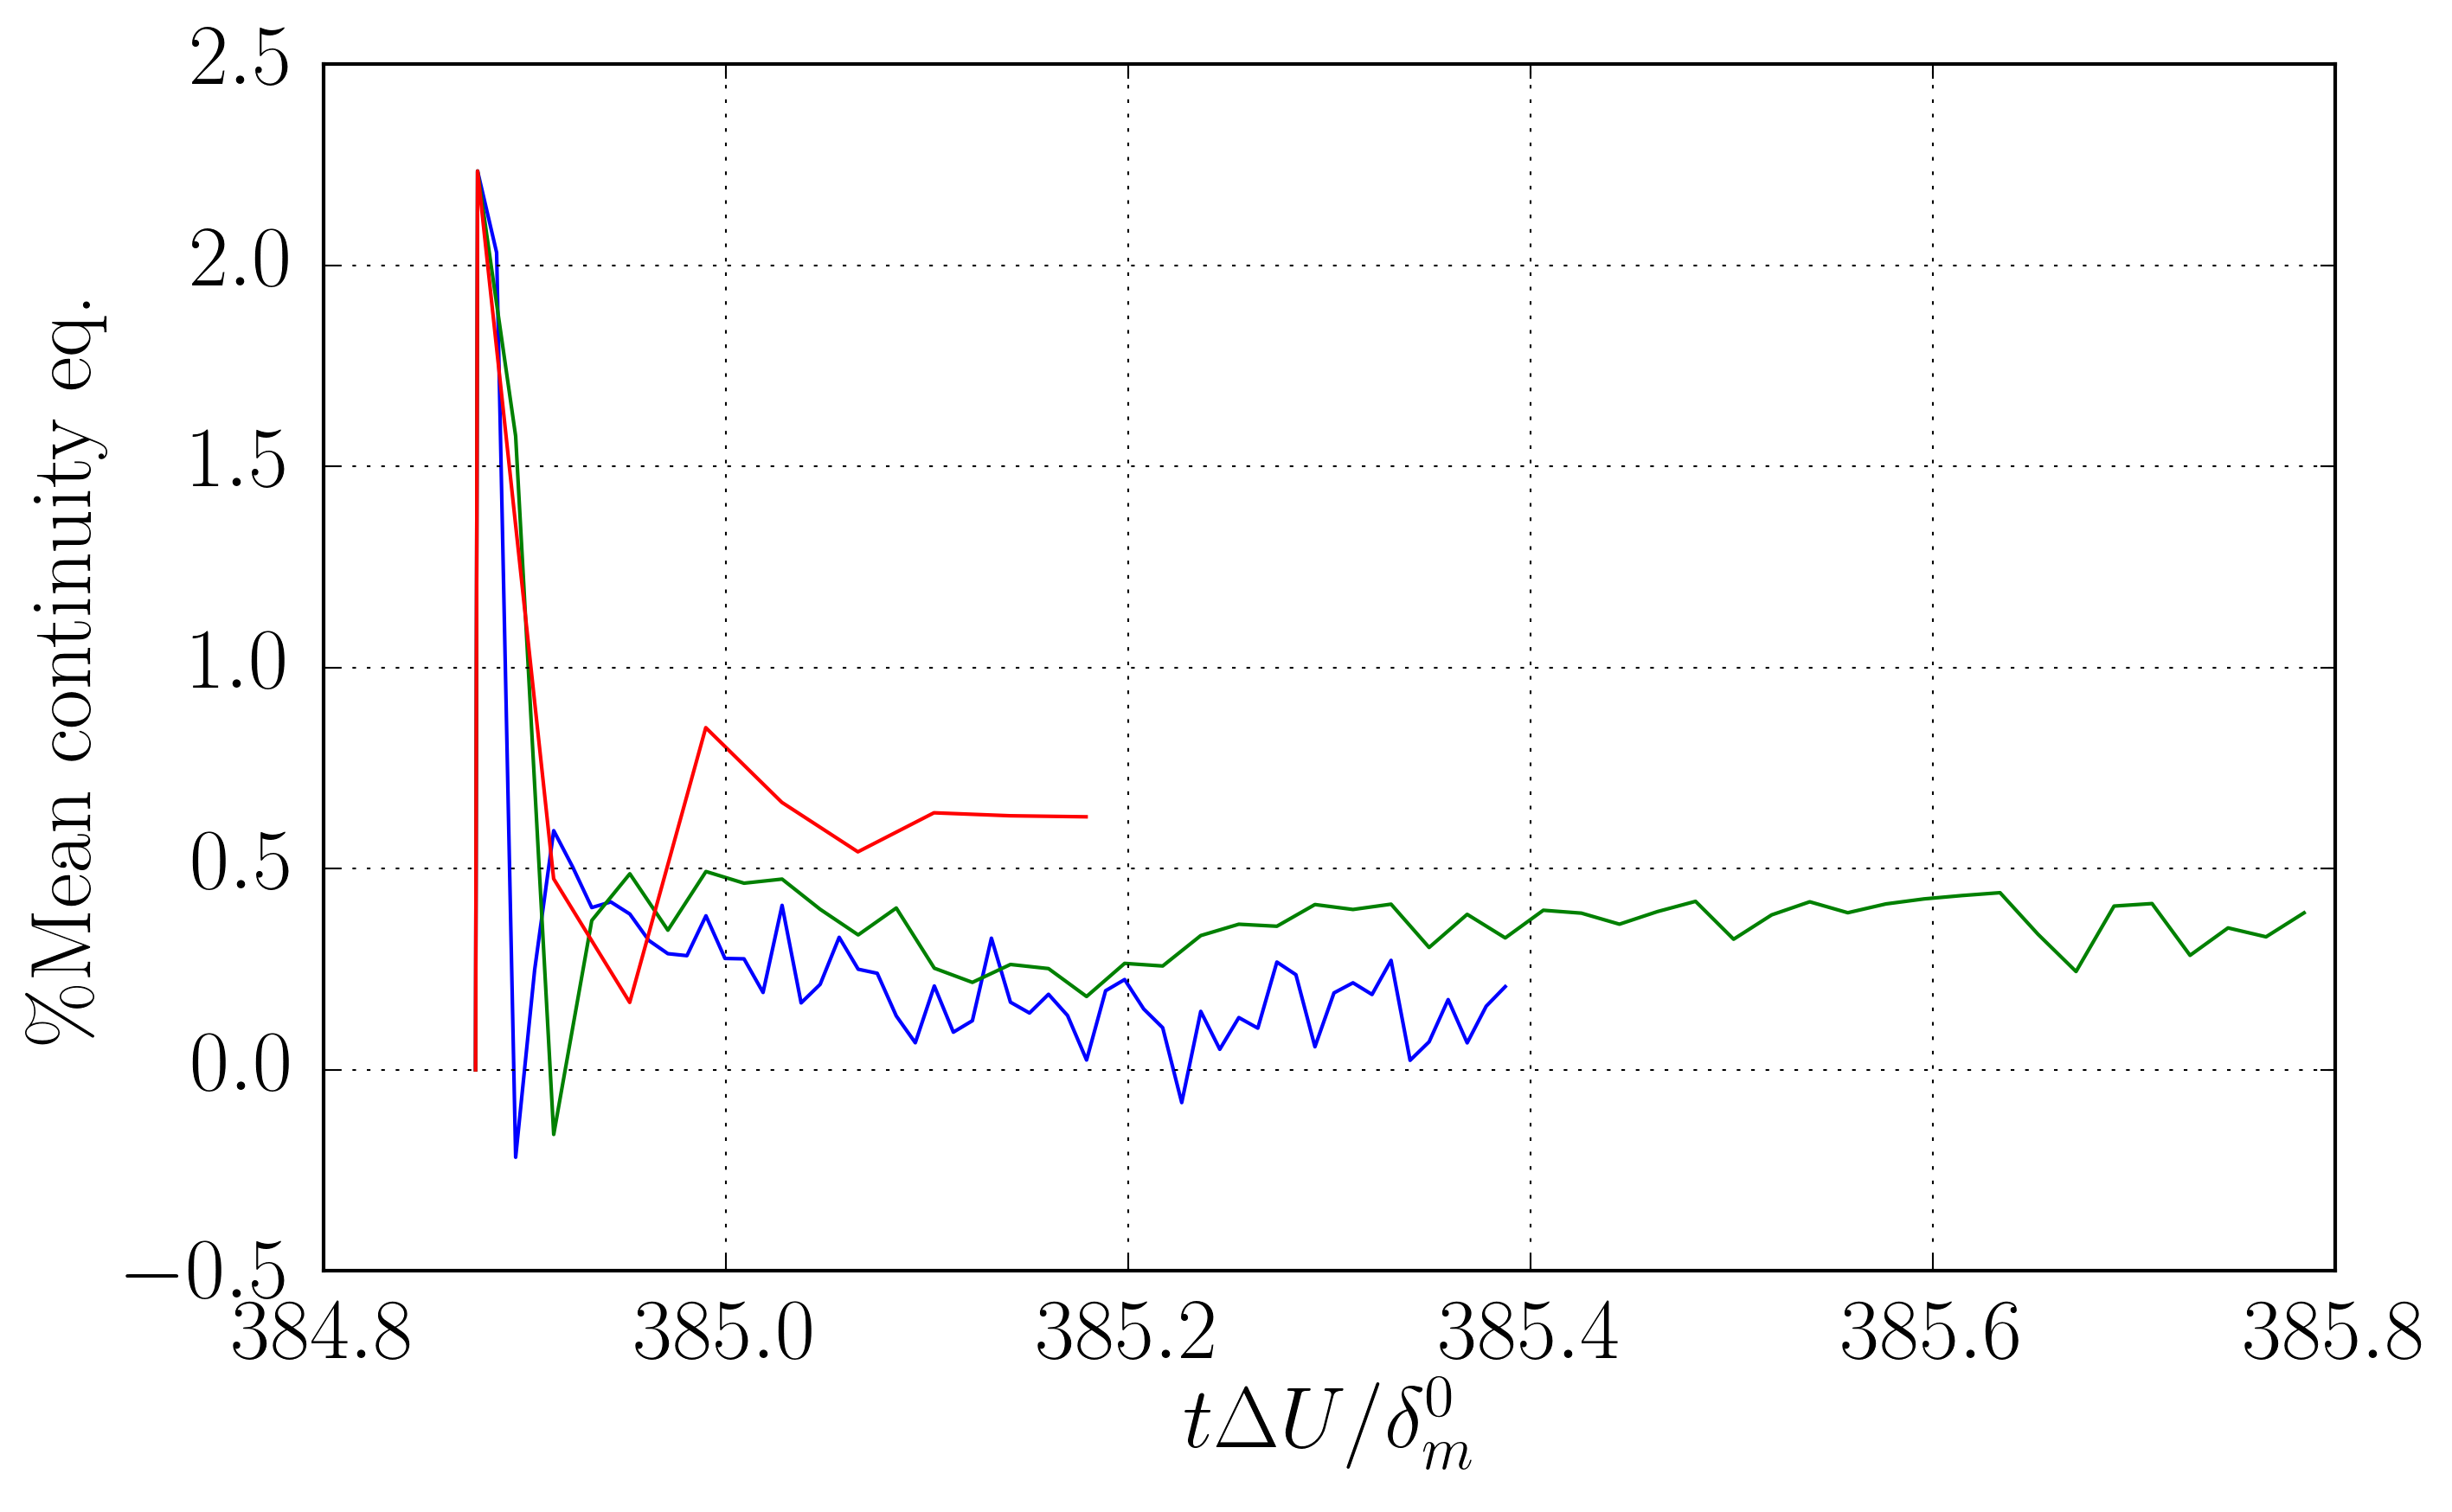

In [87]:
-
print np.diff(time)

In [88]:
15.0*100/60

25.0

diff time=0.00946044921875
385.396820068
diff time=0.0188903808594
385.803344727
diff time=0.0378112792969
385.216796875
851 0.248712916979
0.247991589001


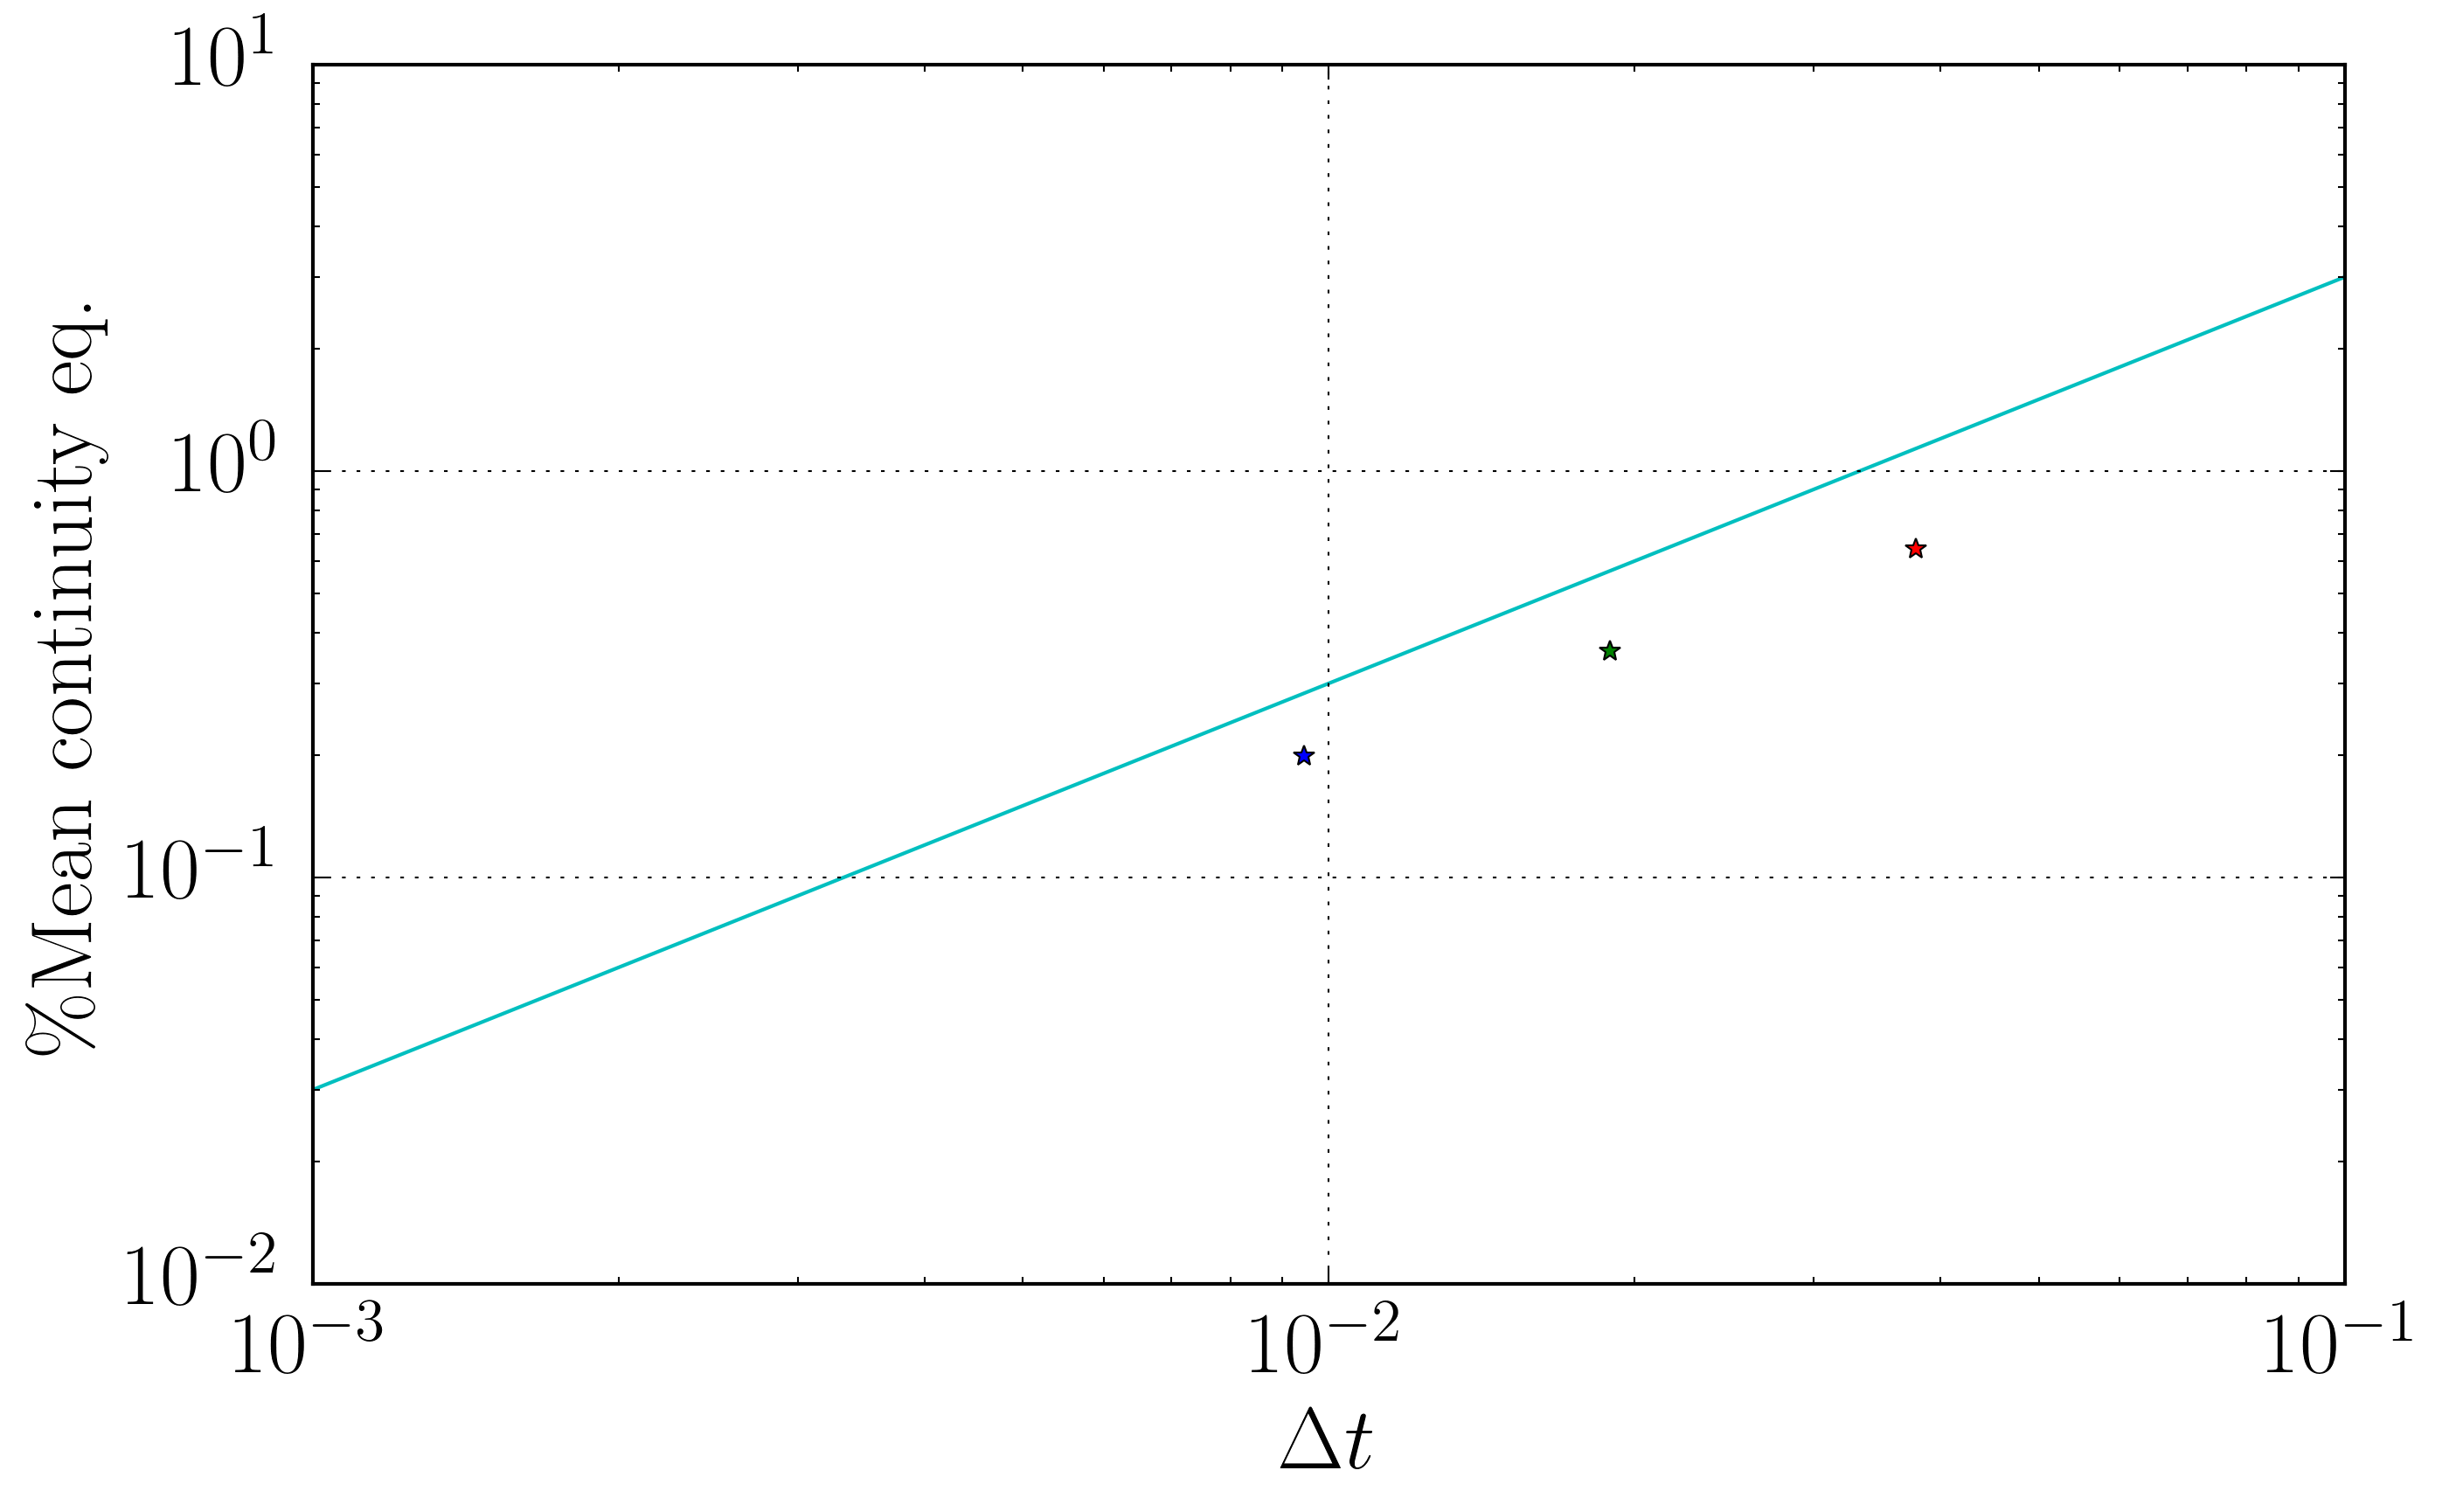

In [89]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'urms'
iobs=-1
ylabel = var
#ylabel="fun"
l_style=['b-','g*']
#'/share/drive/toni/VDML/s80/test/06/h5.stats',
p_folders= ['/share/drive/toni/VDML/s80/test/08/h5.stats','/share/drive/toni/VDML/s80/test/08/diffold/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/CFL/0125/h5.stats','/share/drive/toni/VDML/s80/CFL/025/h5.stats', \
           '/share/drive/toni/VDML/s80/CFL/05/h5.stats']
jj=0
o2vect=np.zeros(3)
Dtvect=np.zeros(3)
vobs=[-1,-1,-1]
for path in p_folders:
    iobs=vobs[jj]
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        bet = np.array(f['bet'])
        yf  =np.array(f['y'])
        dm  =np.array(f['dm'])
        rvm = np.array(f['rvm']);
        rhom = np.array(f['rhom']);
        dmpoint = np.array(f['dmpoint'])
        fun = np.array(f[var]);
        vcont = np.zeros(len(time))
        vcont2 = np.zeros(len(time))
        drhodt = np.zeros(len(time))
        #itmax = np.where(time<234.0)[0][-1]
        itmax=len(time)
        for ii in range(1,itmax-1):
            vcont[ii] = (((np.trapz(rhom[:,ii+1]-rhom[:,ii],yf))/(time[ii+1]-time[ii])+ \
                          (np.trapz(rhom[:,ii]-rhom[:,ii-1],yf))/(time[ii]-time[ii-1]))*0.5+rvm[-1,ii]-rvm[0,ii])/np.max(rvm[:,ii])*100
            drhodt[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii],yf))/(time[ii+1]-time[ii]))
            vcont2[ii] = rvm[-1,ii+1]-rvm[0,ii+1]
        print "diff time=%s"%(np.diff(time)[-1])
    #plt.plot(yf,fun[:,iobs-2:iobs])#,l_style[jj]
    #plt.plot(time[1:-1],(vcont[1:-1]))
    plt.plot(np.diff(time)[-1],vcont[-2],'*')
    o2vect[jj]=vcont[-2]
    Dtvect[jj]=np.diff(time)[-1]

    #plt.plot(time,dmpoint*100)
    #plt.plot(time[:-1],-(drhodt[:-1]),'--')
    print time[iobs]
    jj = jj +1
#plt.yscale('log')
#plt.plot(time,der1(time,dm)*20)
ylabel=r'$\% \textnormal{Mean continuity eq.}$'
plt.plot([0.001,0.005,0.1],30*np.array([0.001,0.005,0.1]))
plt.xlabel(r'$\Delta t$');plt.ylabel(ylabel)
plt.grid('on')
#plt.ylim([0,5])
#plt.xlim([-10,10])
#plt.plot(yf[1:],np.diff(yf)
plt.xscale('log')
plt.yscale('log')
#plt.ylim([-2,2])
print len(yf),np.diff(yf)[1]
print np.diff(yf)[-1]
plt.grid('on')

diff time=0.00946044921875
385.396820068
diff time=0.0188903808594
385.803344727
diff time=0.0378112792969
385.216796875
851 0.248712916979
0.247991589001


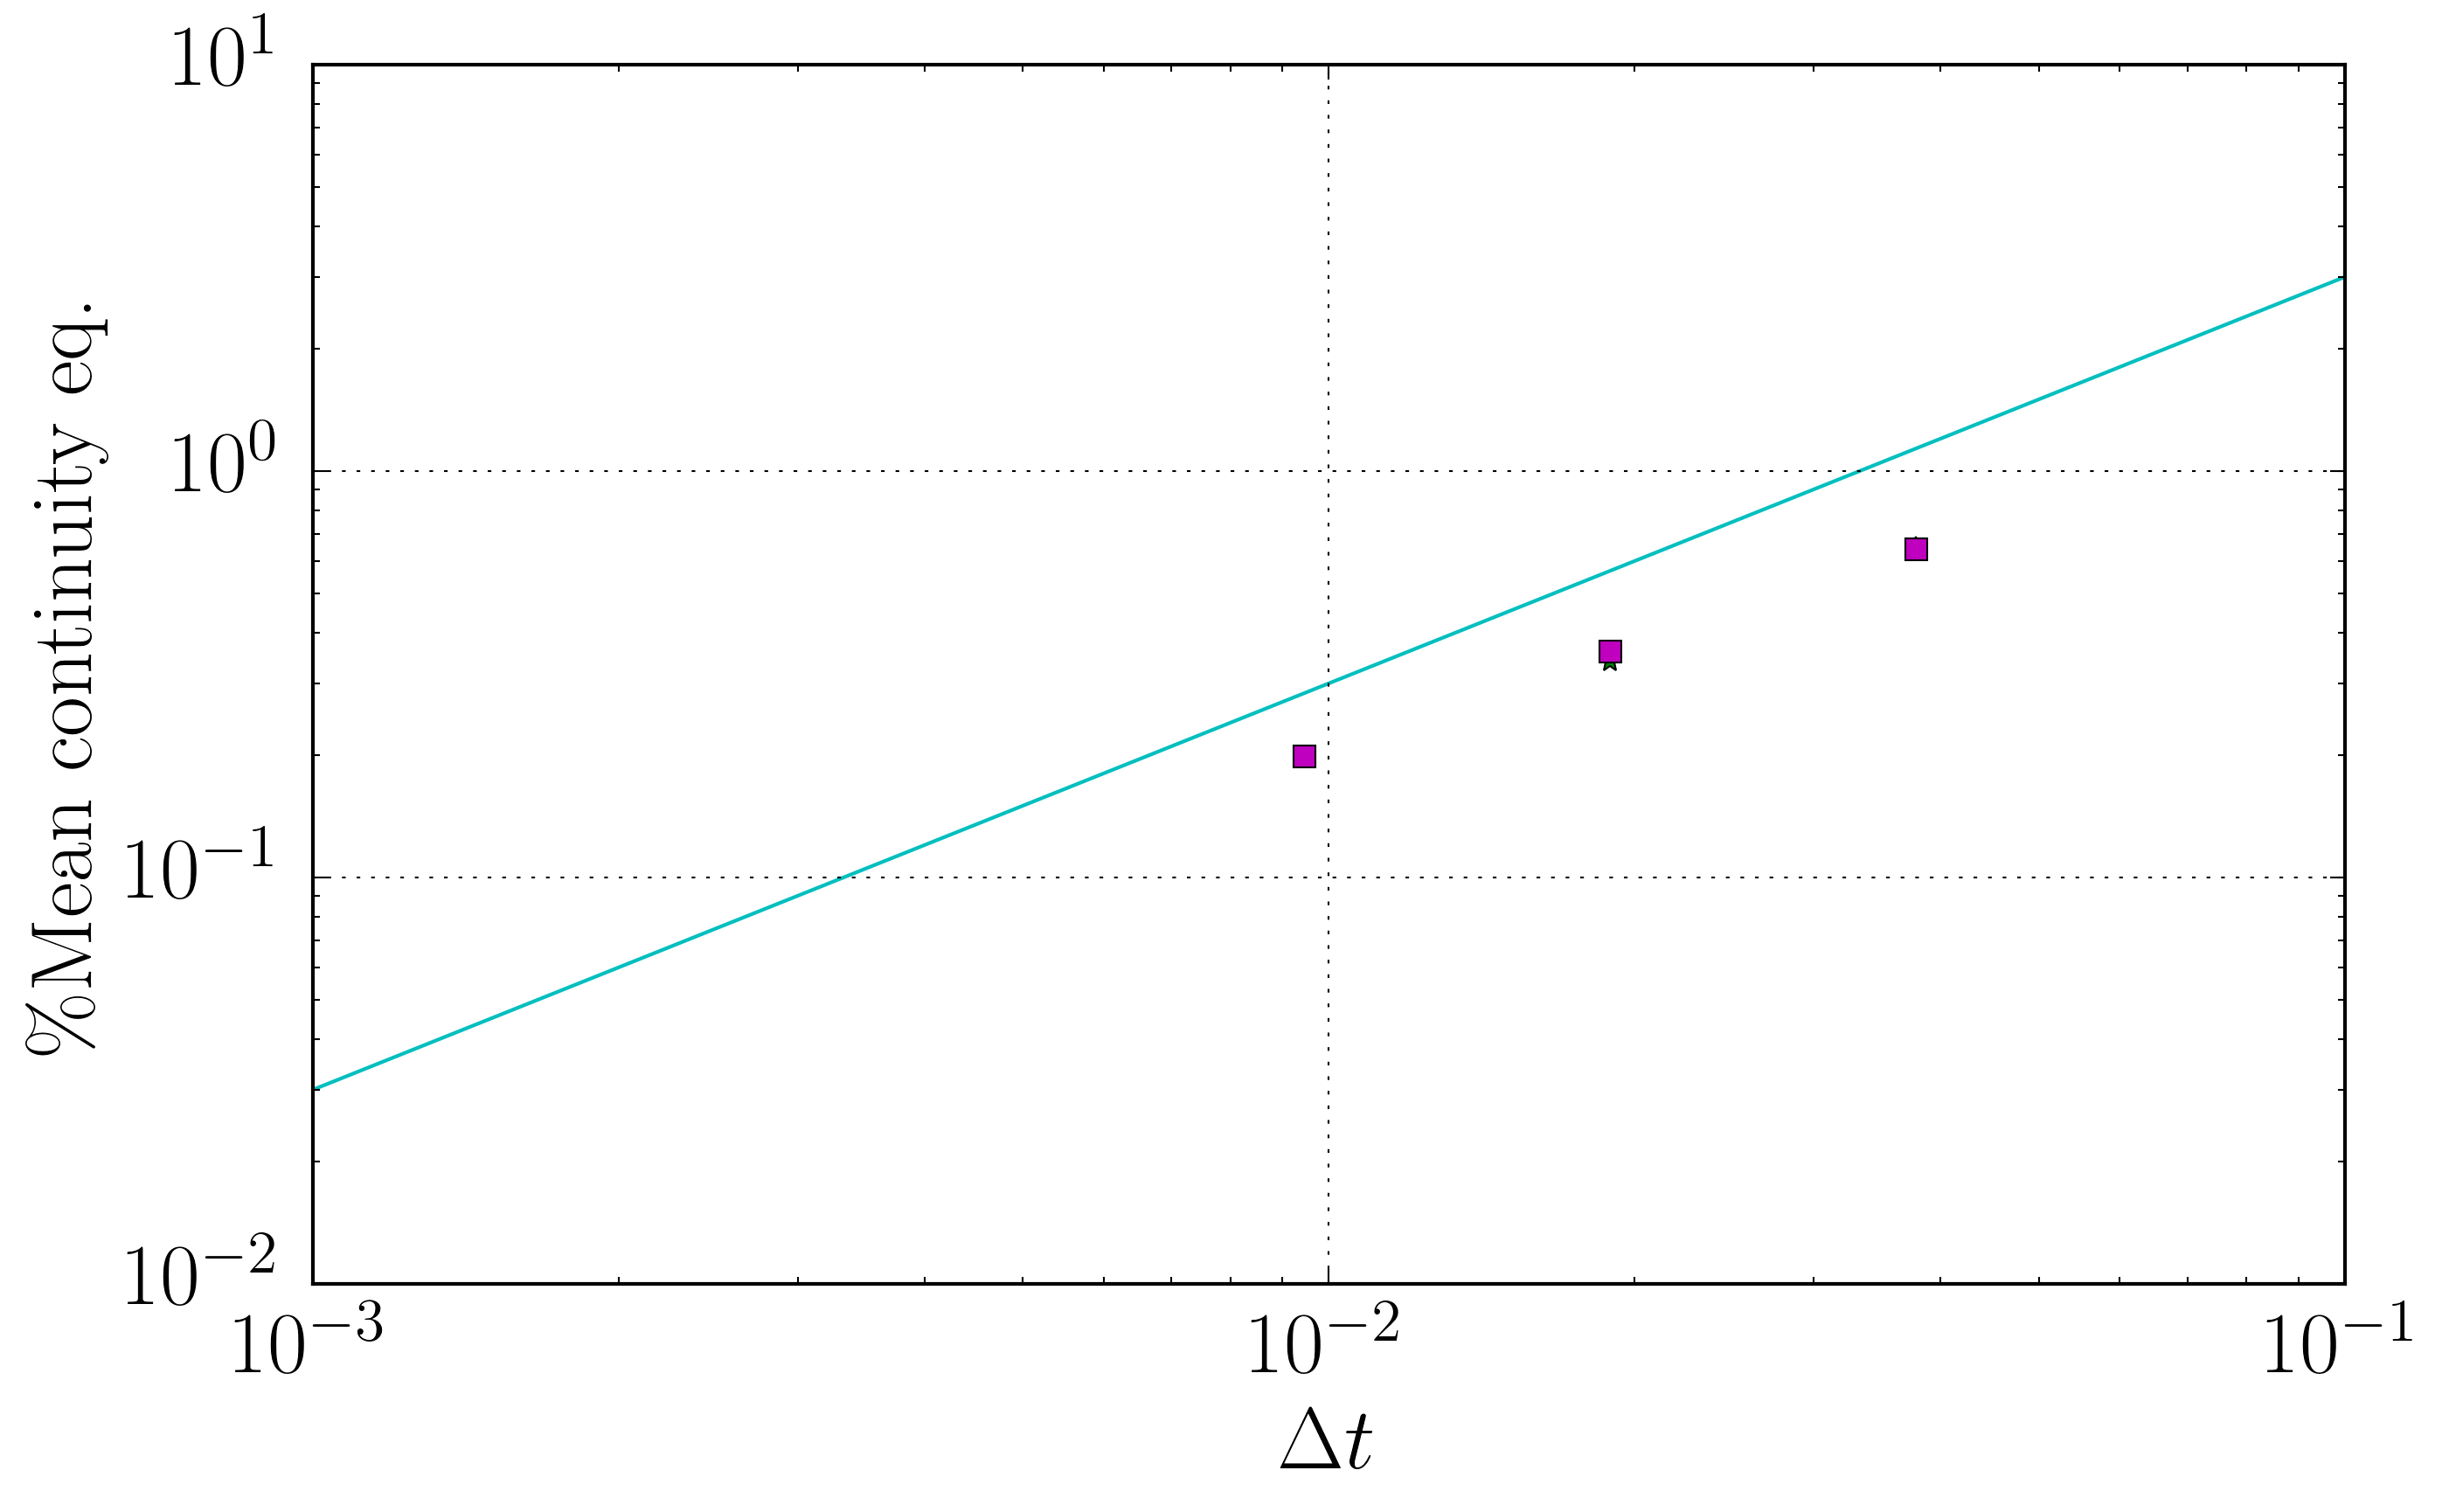

In [90]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'urms'
iobs=-1
ylabel = var
#ylabel="fun"
l_style=['b-','g*']
#'/share/drive/toni/VDML/s80/test/06/h5.stats',
p_folders= ['/share/drive/toni/VDML/s80/test/08/h5.stats','/share/drive/toni/VDML/s80/test/08/diffold/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/CFL/0125/h5.stats','/share/drive/toni/VDML/s80/CFL/025/h5.stats', \
           '/share/drive/toni/VDML/s80/CFL/05/h5.stats']
jj=0
o1vect=np.zeros(3)
#Dtvect=np.zeros(3)
vobs=[-1,-1,-1]
for path in p_folders:
    iobs=vobs[jj]
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        bet = np.array(f['bet'])
        yf  =np.array(f['y'])
        dm  =np.array(f['dm'])
        rvm = np.array(f['rvm']);
        rhom = np.array(f['rhom']);
        dmpoint = np.array(f['dmpoint'])
        fun = np.array(f[var]);
        vcont = np.zeros(len(time))
        vcont2 = np.zeros(len(time))
        drhodt = np.zeros(len(time))
        #itmax = np.where(time<234.0)[0][-1]
        itmax=len(time)
        for ii in range(1,itmax-1):
            vcont[ii] = ((np.trapz(rhom[:,ii+1]-rhom[:,ii],yf))/(time[ii+1]-time[ii])+rvm[-1,ii]-rvm[0,ii])/np.max(rvm[:,ii])*100
            drhodt[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii],yf))/(time[ii+1]-time[ii]))
            vcont2[ii] = rvm[-1,ii+1]-rvm[0,ii+1]
        print "diff time=%s"%(np.diff(time)[-1])
    #plt.plot(yf,fun[:,iobs-2:iobs])#,l_style[jj]
    #plt.plot(time[1:-1],(vcont[1:-1]))
    plt.plot(np.diff(time)[-1],vcont[-2],'*')
    o1vect[jj]=vcont[-2]
    #Dtvect[jj]=np.diff(time)[-1]


    #plt.plot(time,dmpoint*100)
    #plt.plot(time[:-1],-(drhodt[:-1]),'--')
    print time[iobs]
    jj = jj +1
#plt.yscale('log')
#plt.plot(time,der1(time,dm)*20)
ylabel=r'$\% \textnormal{Mean continuity eq.}$'
plt.plot([0.001,0.005,0.1],30*np.array([0.001,0.005,0.1]))
plt.xlabel(r'$\Delta t$');plt.ylabel(ylabel)
plt.grid('on')
plt.plot(Dtvect,o2vect,'s')
#plt.ylim([0,5])
#plt.xlim([-10,10])
#plt.plot(yf[1:],np.diff(yf)
plt.xscale('log')
plt.yscale('log')
#plt.ylim([-2,2])
print len(yf),np.diff(yf)[1]
print np.diff(yf)[-1]
plt.grid('on')

In [586]:
#Importing all definitions needed
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats.stats import pearsonr
from writefiles import *
import glob
import os
from readfiles import *
import h5py
from lomapost import * #All functions defined within module lomapost
import compact

In [587]:
set_fig_props()
xlen=plt.rcParams['figure.figsize'][0]
xyratio=0.6
ylen = xyratio*xlen

In [601]:
#p_folders   = [ '/share/drive/toni/VDML/s80/test/05/tanhLy250/'] 
p_folders   = [ '/share/drive/toni/VDML/s10/test/00/'] 
p_folders   = [ '/share/drive/toni/VDML/s10/02/']
p_folders = ['/share/drive/toni/VDML/s80/01/']
#p_folders = ['/share/drive/toni/VDML/s80/01/','/share/drive/toni/VDML/s80/02/','/share/drive/toni/VDML/s80/03/']
#p_folders   = [ '/share/drive/toni/VDML/s80/test/02/test/'] 
#,'/share/drive/toni/VDML/s80/test/06/01/'
#p_folders=['/share/drive/toni/VDML/s80/test/05/']
l_sta_opt = [0]
l_sta_opt =[3,3,3]
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    #l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_sta_files[ijob][0],l_sta_files[ijob][-1]) 
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_sta_files[ijob])
print nfiles
stats = []
for i in range(njobs):
    for j in range(len(l_sta_files[ijob])):
        stats.append([])
for ijob in range(njobs):
    print ijob
    print l_sta_opt[ijob]
    #for every stafiles in l_sta_files list:
    for fsta,ista in zip(l_sta_files[ijob],range(len(l_sta_files[ijob]))):
        #temp = workstaSCAL(fsta) #save the stats on the right place
        temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        stats[ijob].append(temp)
#Special variables is'y'
l_var_unique = ['alp','bet','Re','nacum']
l_var_profiles=[]
l_var_point=[]
y = stats[0][0]['y']
my = len(y)
time = stats[0][0]
for key in stats[0][0].keys():
    if size(stats[0][0][key])==my and key!='y':
        l_var_profiles.append(key)
    elif key!='y' and key not in l_var_unique:
        l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point
# add a big axes, hide frame
# hide tick and tick label of the big axes
for ijob in range(njobs):
    nsta = len(l_sta_files[ijob])
    v_temp=np.zeros(nsta)
    y = stats[ijob][0]['y']
    my = len(y)
    matriz = np.zeros([my,nsta])
    path = p_folders[ijob]+'h5.stats'
    with h5py.File(path,"w") as f:
        f['y']=y
        print "my=%s"%(len(y))
        for variable in l_var_unique:
            f[variable]=stats[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,stats[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            ista = 0
            for ista in range(nsta):
                v_temp[ista] = stats[ijob][ista][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
            if variable=='time':
                vtime = np.array(v_temp)
            if variable=='dm':
                vdm  = np.array(v_temp)
            if variable=='dw':
                vdw  = np.array(v_temp)
            if variable=='EPS':
                vEPS  = np.array(v_temp)
            if variable=='Relambda':
                vLambda  = np.array(v_temp)
            if variable=='dmpoint':
                vdmpoint  = np.array(v_temp)
        for variable in l_var_profiles:
            for ista in range(nsta):
                matriz[:,ista]=stats[ijob][ista][variable]
            f[variable]=matriz

['/share/drive/toni/VDML/s80/01/']
job(1): 1st file = /share/drive/toni/VDML/s80/01/s80a_01_001.sta, last file = /share/drive/toni/VDML/s80/01/s80a_02_120.sta
[174]
0
3
['dyeta', 'wrms', 'llambda', 'w1rms', 'w3m', 'w2rms', 'R33', 'w3rms', 'them', 'urms', 'rwm', 'thep', 'Relambday', 'uv', 'um', 'epNH', 'XI', 'vm', 'rvm', 'Tm', 'vrms', 'R12', 'R11', 'TT', 'mum', 'nu', 'rum', 'wm', 'epR', 'epS', 'w1m', 'rhom', 'epD', 'Trms', 'k', 'w2m', 'eta', 'R22']
['EPS', 'Relambda', 'dm', 'dw', 'rhoEPS', 'dmpoint', 'etamin', 'time']
my=851
Writing alp = [ 0.0136295], for ijob = 0
Writing bet = [ 0.036319], for ijob = 0
Writing Re = [ 160.], for ijob = 0
Writing nacum = [1], for ijob = 0
Writing EPS
Writing Relambda
Writing dm
Writing dw
Writing rhoEPS
Writing dmpoint
Writing etamin
Writing time


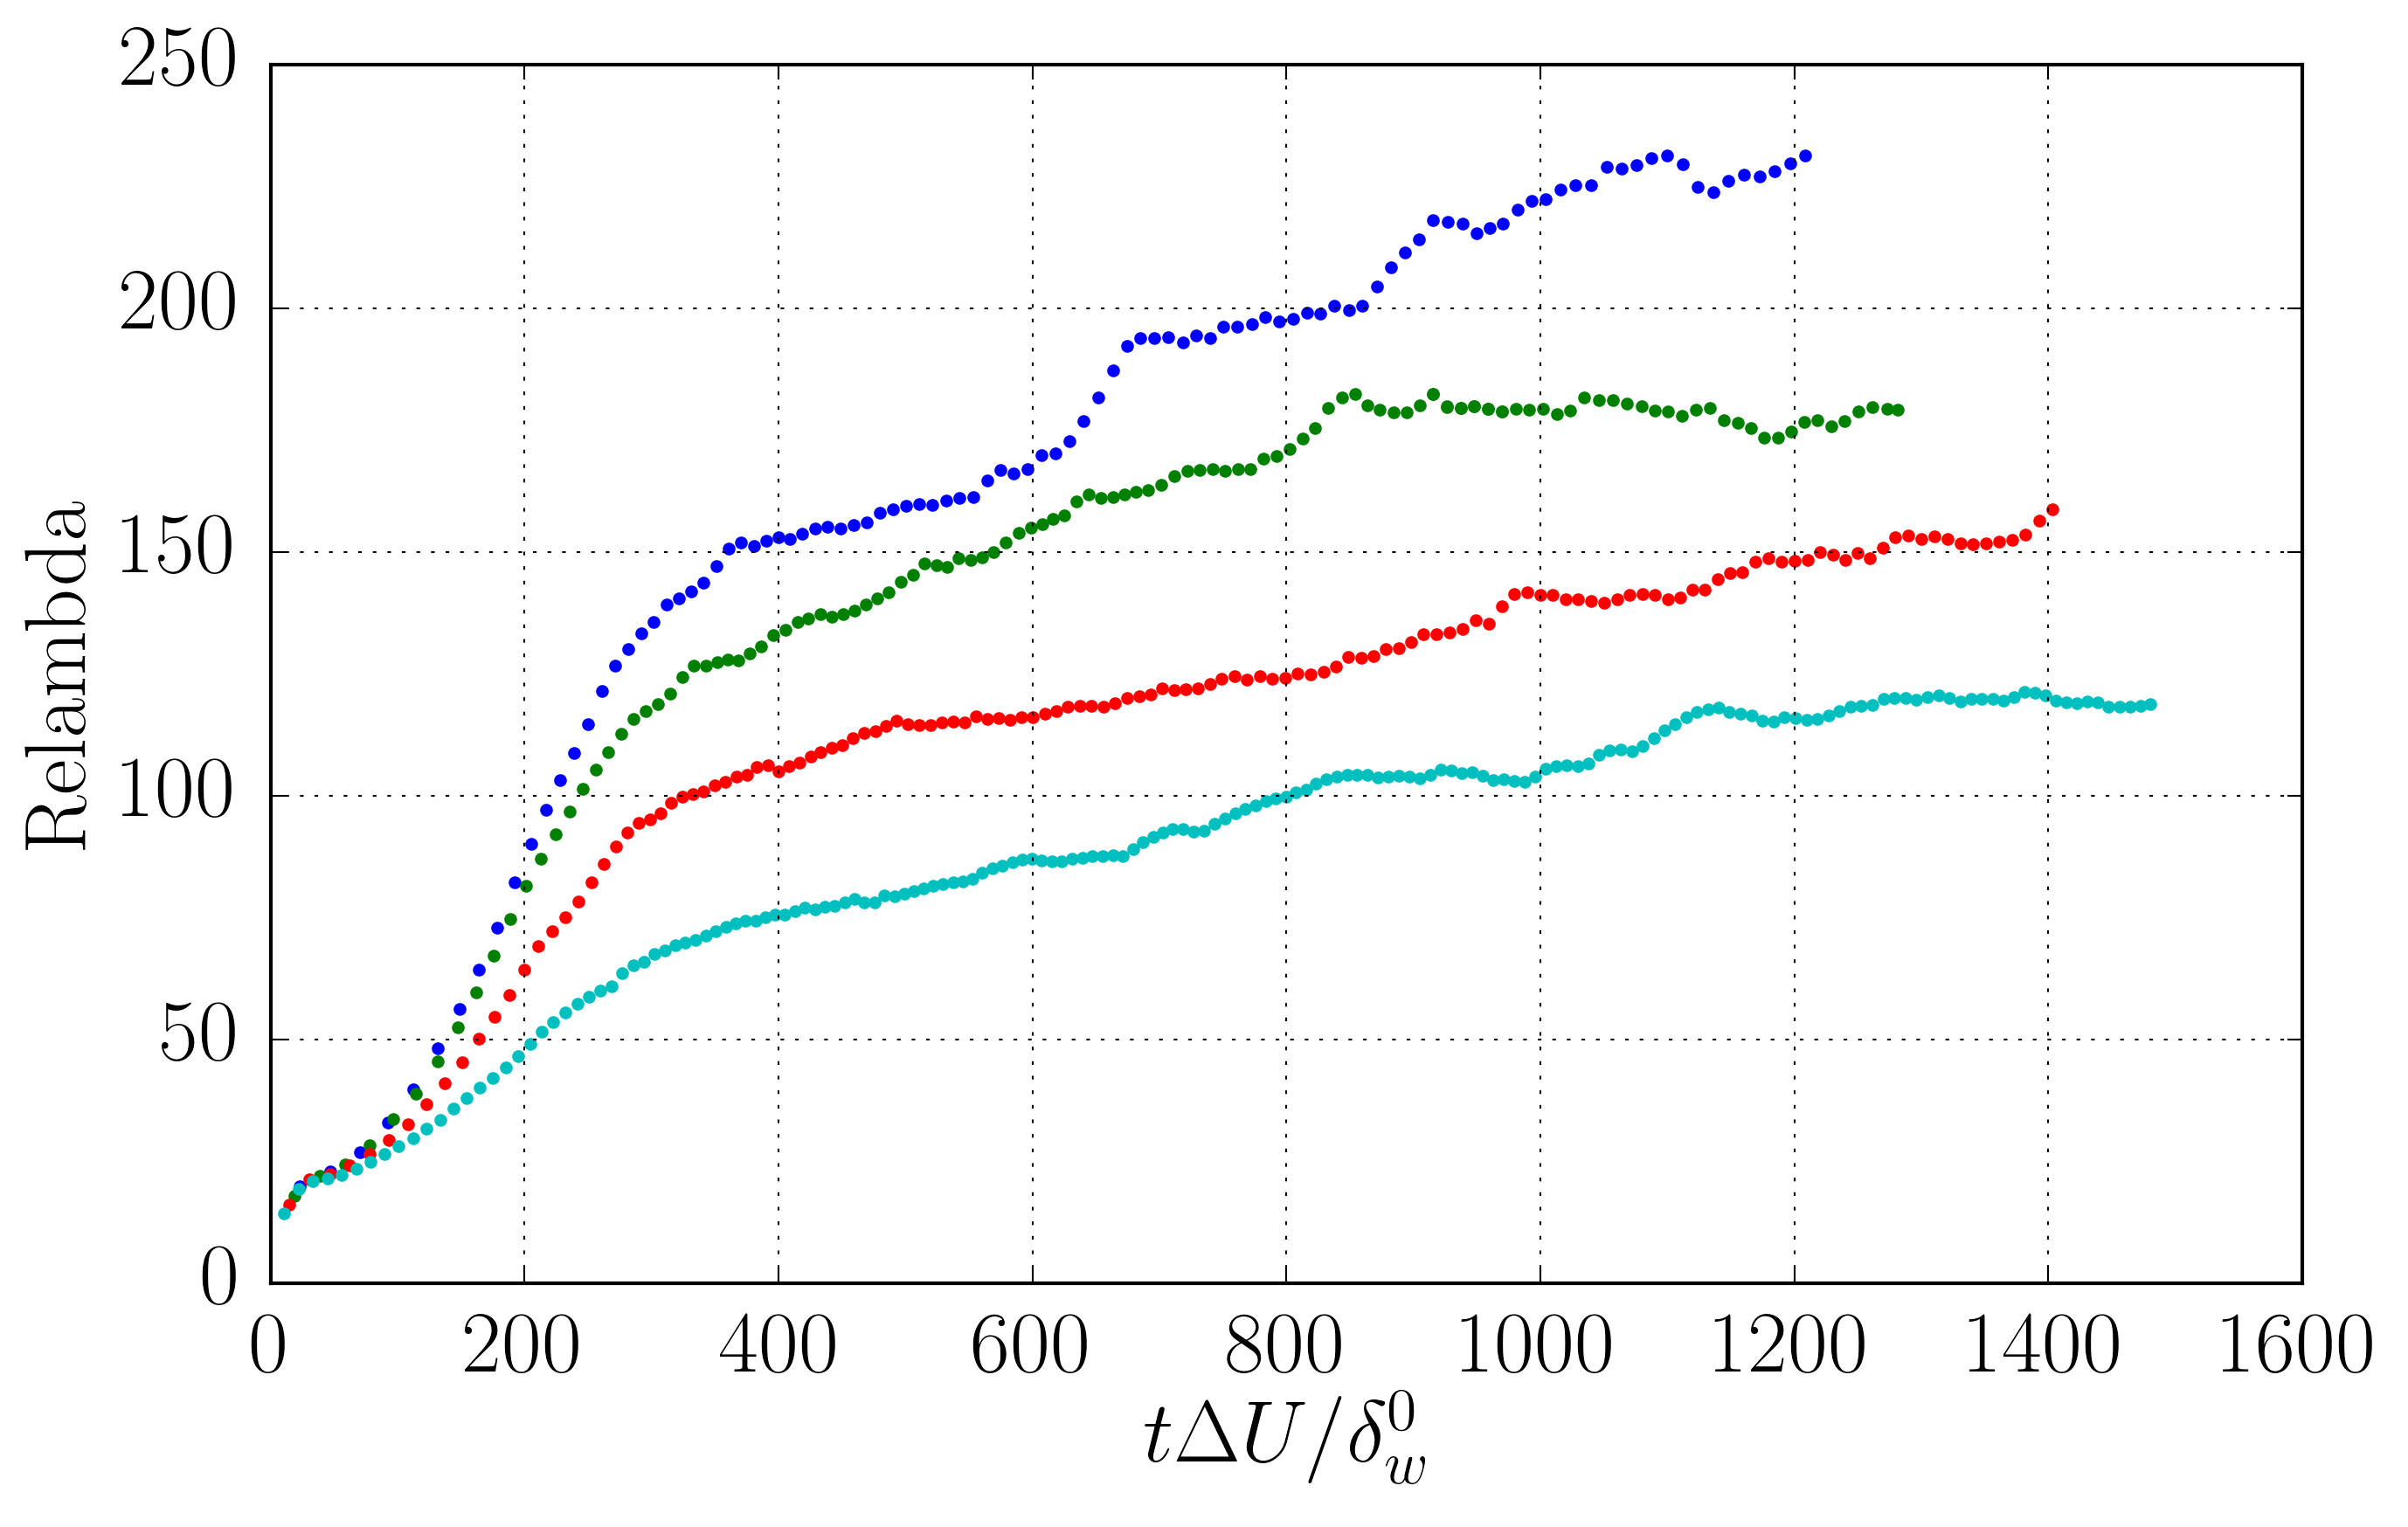

In [603]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_w^0$'
var = 'Relambda'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/00/init/h5.stats','/share/drive/toni/VDML/s80/test/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/Re160s80/case1/y2/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/01/h5.stats','/share/drive/toni/VDML/s20/03/h5.stats', \
            '/share/drive/toni/VDML/s40/03/h5.stats','/share/drive/toni/VDML/s80/01/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        dw = np.array(f['dw'])
        fun = np.array(f[var]);
    plt.plot(time,fun,'.')
plt.xlabel(xlabel);
plt.ylabel(ylabel)
plt.grid('on')

In [604]:
36*528.0

19008.0

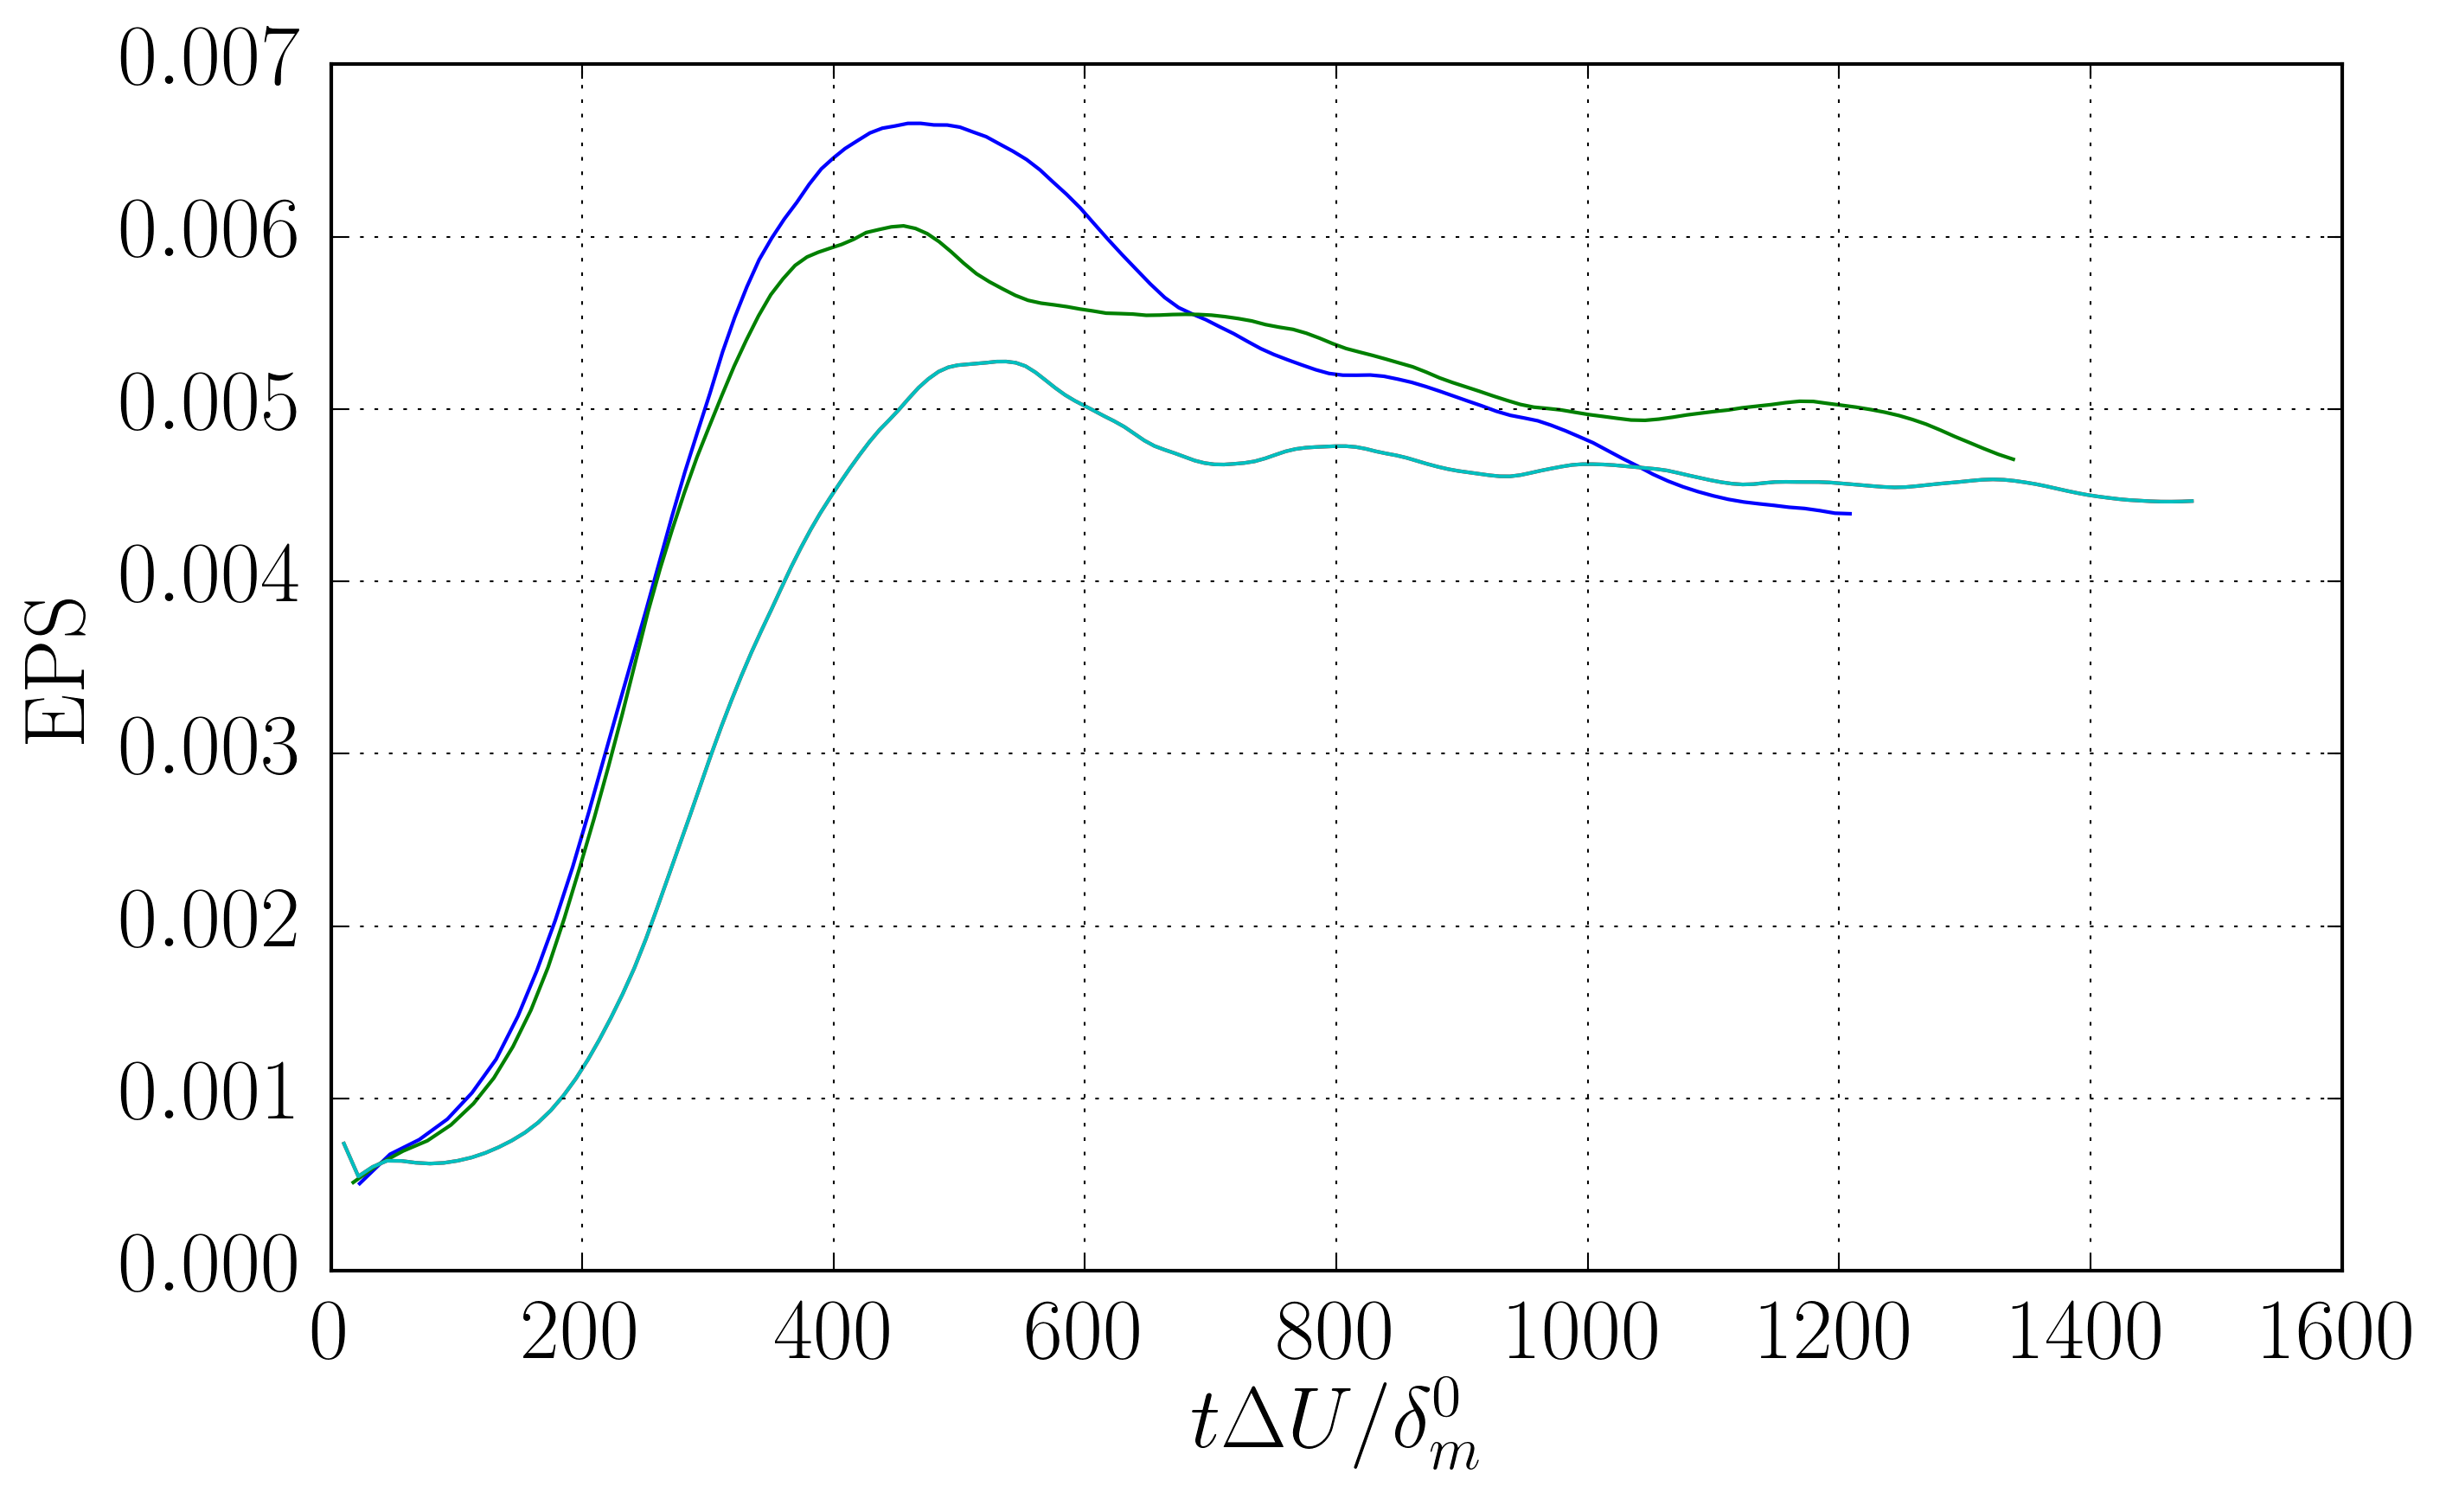

In [606]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'EPS'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/00/init/h5.stats','/share/drive/toni/VDML/s80/test/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/Re160s80/case1/y2/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/03/h5.stats','/share/drive/toni/VDML/s80/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/01/h5.stats','/share/drive/toni/VDML/s20/01/h5.stats', \
            '/share/drive/toni/VDML/s80/01/h5.stats','/share/drive/toni/VDML/s80/01/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        dw = np.array(f['dw'])
        fun = np.array(f[var]);
    plt.plot(time,fun,'-')
plt.xlabel(xlabel);
plt.ylabel(ylabel)
plt.grid('on')

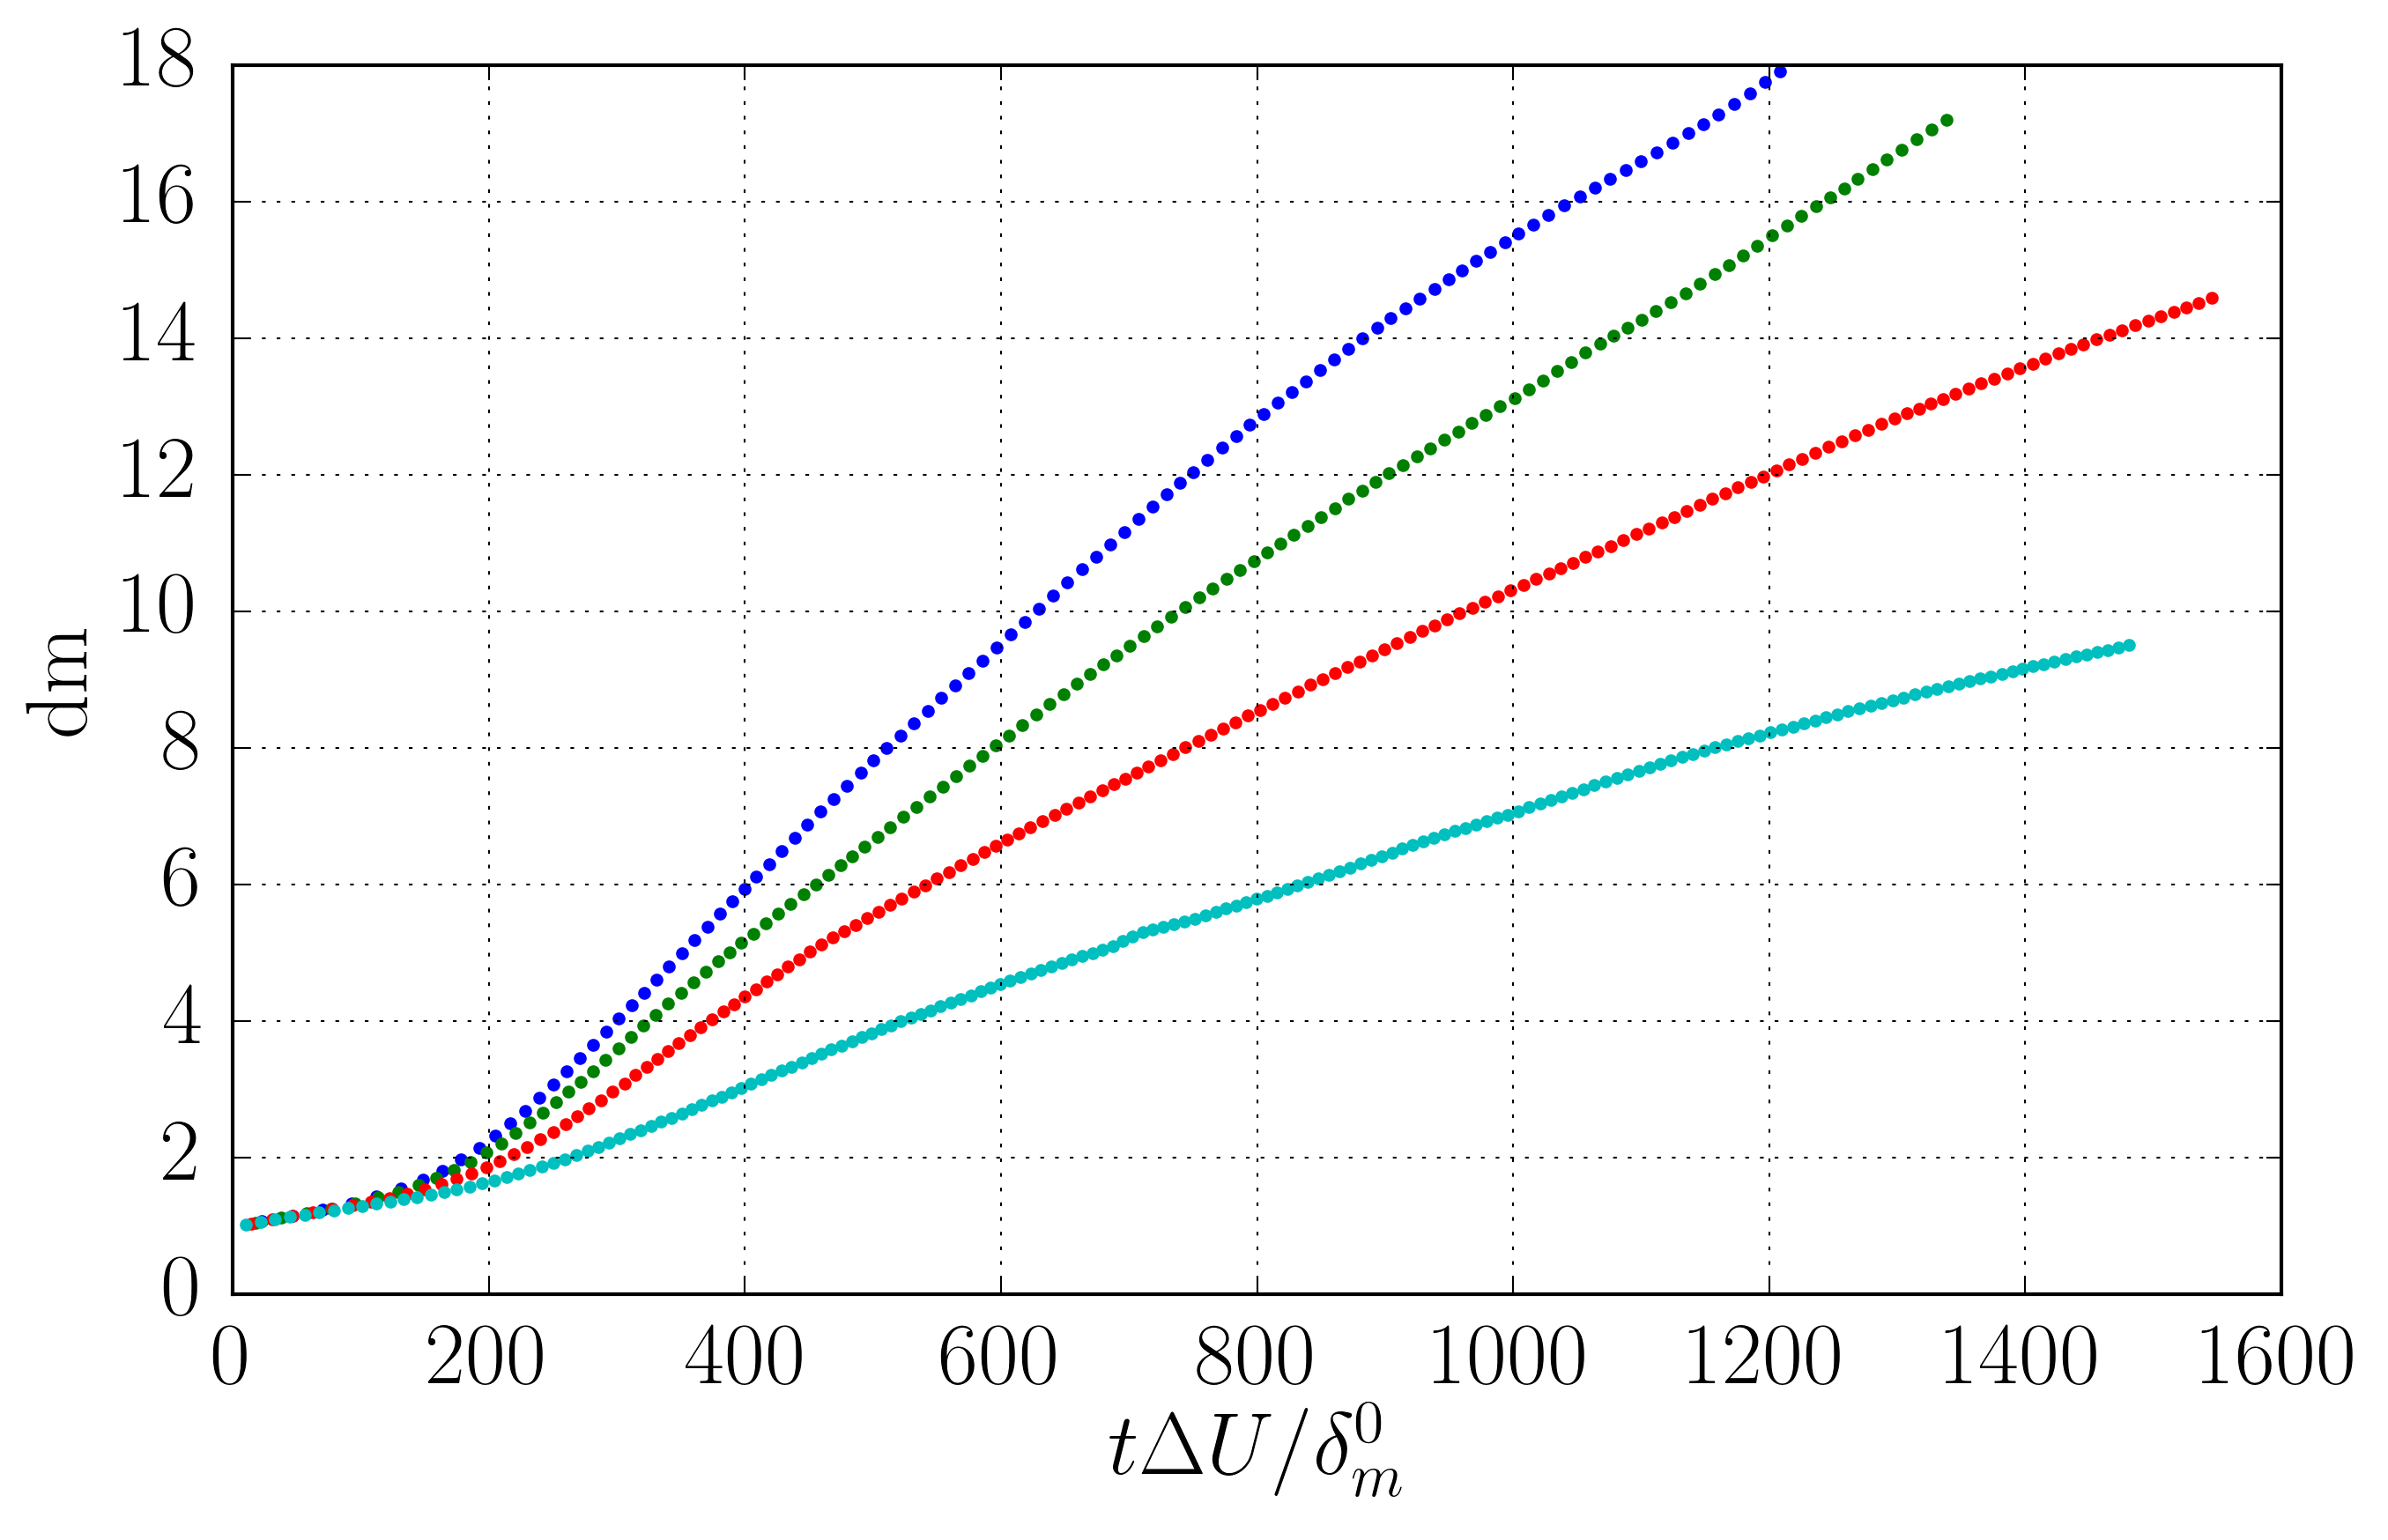

In [607]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'dm'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/00/init/h5.stats','/share/drive/toni/VDML/s80/test/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/Re160s80/case1/y2/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/02/h5.stats','/share/drive/toni/VDML/s80/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/01/h5.stats','/share/drive/toni/VDML/s20/01/h5.stats', \
            '/share/drive/toni/VDML/s40/01/h5.stats','/share/drive/toni/VDML/s80/01/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        dw = np.array(f['dw'])
        fun = np.array(f[var]);
    plt.plot(time,fun,'.')
plt.xlabel(xlabel);
plt.ylabel(ylabel)
plt.grid('on')

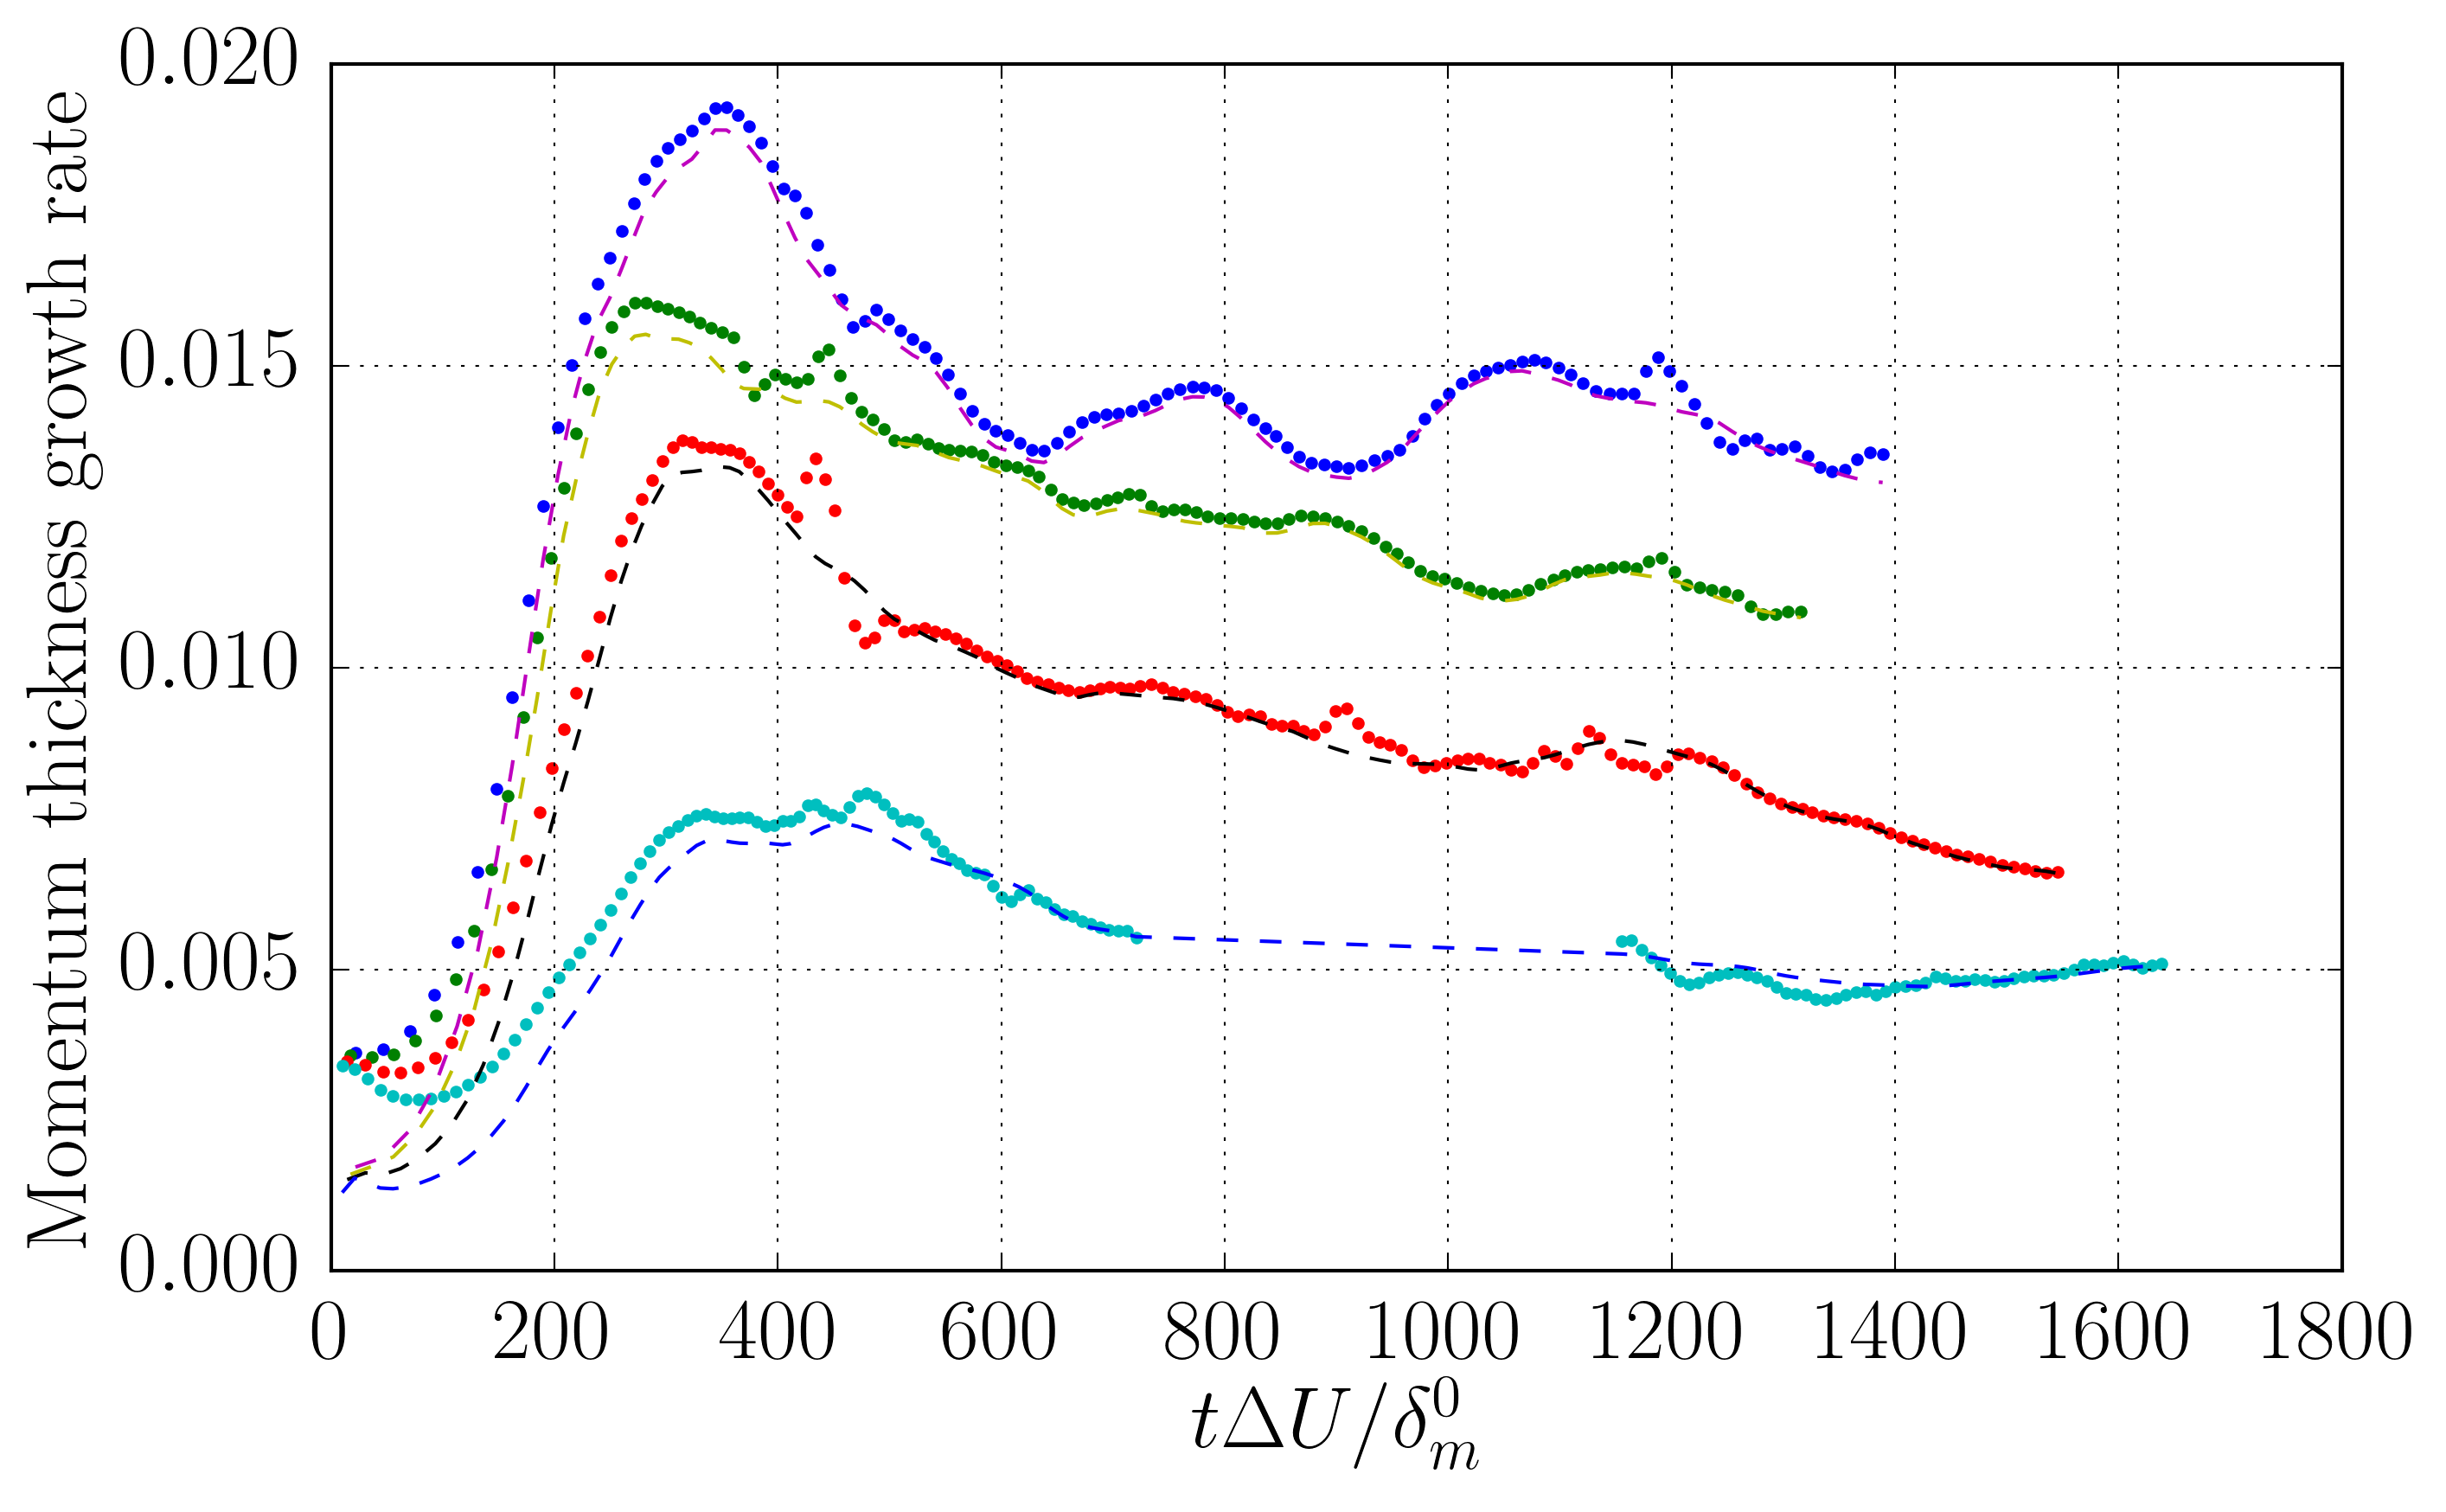

In [546]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'dm'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/00/init/h5.stats','/share/drive/toni/VDML/s80/test/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/Re160s80/case1/y2/h5.stats']
p_folders= ['/share/drive/toni/VDML/s40/01/h5.stats','/share/drive/toni/VDML/s80/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/02/h5.stats','/share/drive/toni/VDML/s20/02/h5.stats', \
            '/share/drive/toni/VDML/s40/01/h5.stats','/share/drive/toni/VDML/s80/02/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        fun = np.array(f[var]);
    plt.plot(time,der1(time,fun),'.')
var = 'dmpoint'
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        fun = np.array(f[var]);
    plt.plot(time,fun,'--')
plt.ylabel('Momentum thickness growth rate');
plt.xlabel(xlabel)
plt.grid('on')

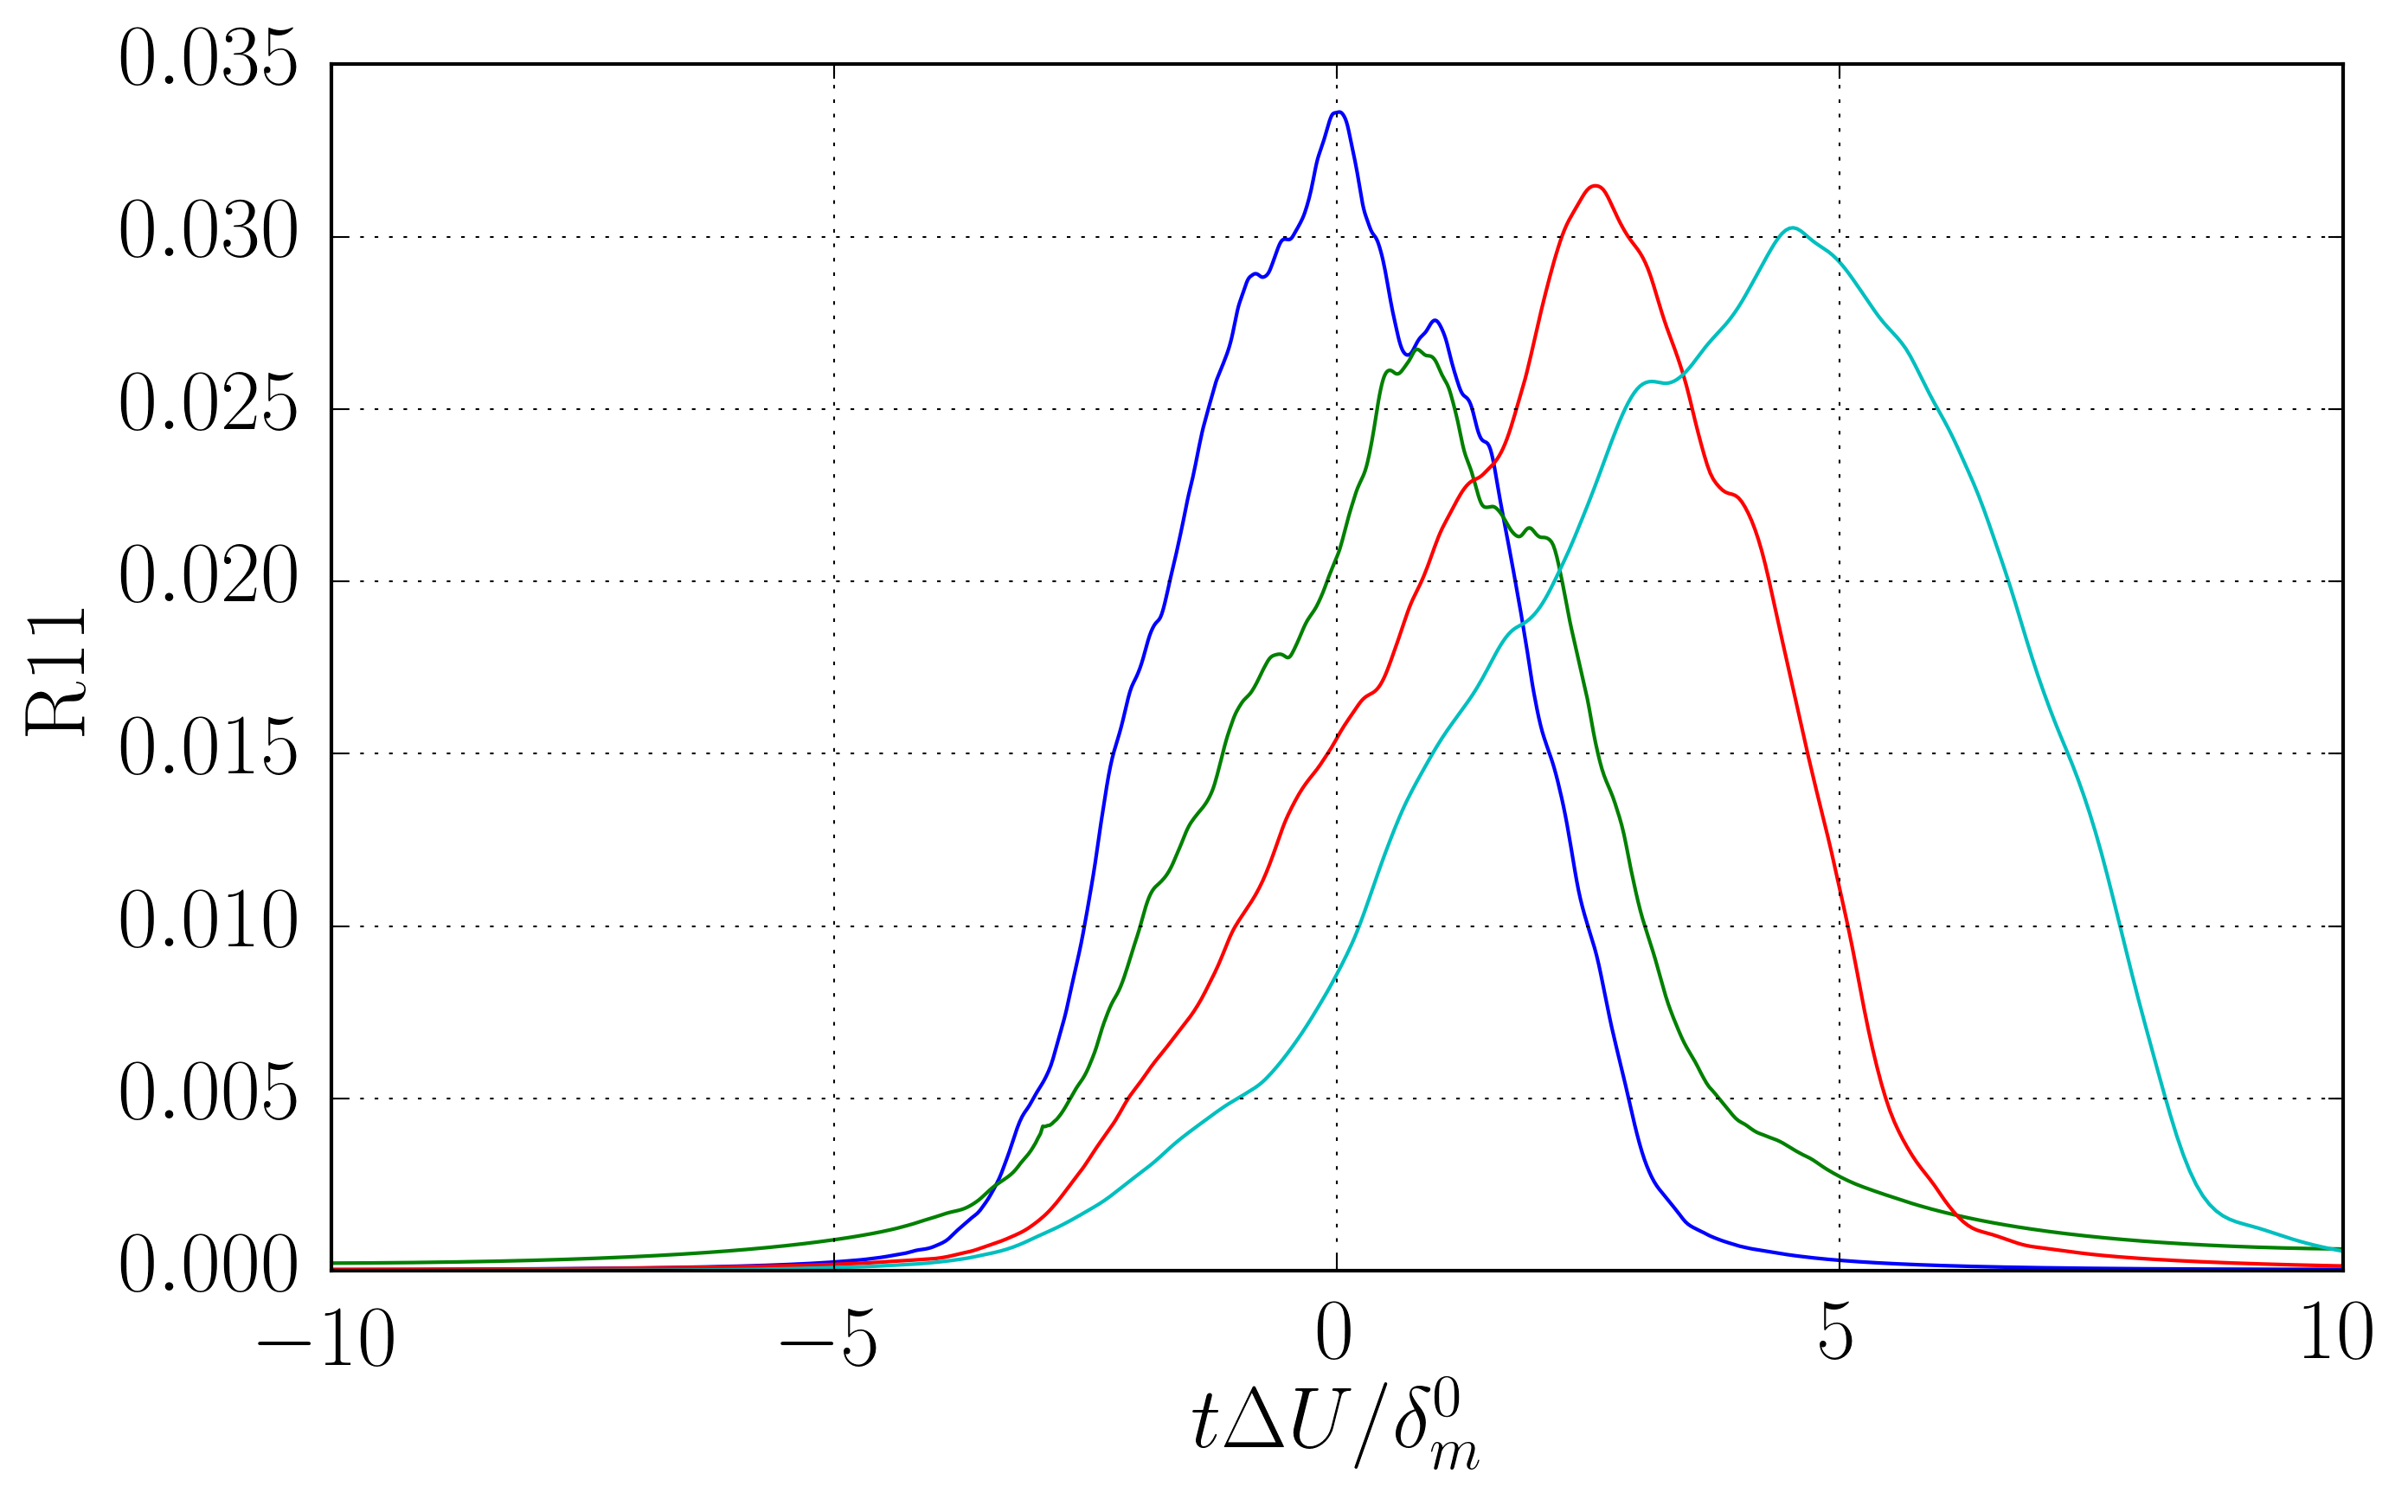

In [382]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'R11'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/00/init/h5.stats','/share/drive/toni/VDML/s80/test/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/Re160s80/case1/y2/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/02/h5.stats','/share/drive/toni/VDML/s80/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/02/h5.stats','/share/drive/toni/VDML/s20/01/h5.stats', \
            '/share/drive/toni/VDML/s40/01/h5.stats','/share/drive/toni/VDML/s80/02/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        dm  =np.array(f['dm'])
        dw  =np.array(f['dw'])
        fun = np.array(f[var]);
        rhom = np.array(f['rhom']);
    #plt.plot(yf/dw[-1],(fun[:,-1]-fun[0,-1])/(fun[-1,-1]-fun[0,-1]),'-')
    #plt.plot(yf/dw[-1],np.sqrt(fun[:,-1]),'-')
    plt.plot(yf/dm[-1],fun[:,-1],'-')
    #print np.trapz(fun[:,-1],yf)
plt.xlabel(xlabel);
#plt.ylim([0,5])
plt.xlim([-10,10])
plt.ylabel(ylabel)
plt.grid('on')

iy1=164,iy2=679
Percentage of occupied vertical length= 40.7792107386
dw=69.6837219708, vorthicknes =150.067495518
Box left = 29.0798633418
iy1=233,iy2=696
Percentage of occupied vertical length= 34.7116075704
dw=59.4808164149, vorthicknes =127.738715859
Box left = 27.4946790695


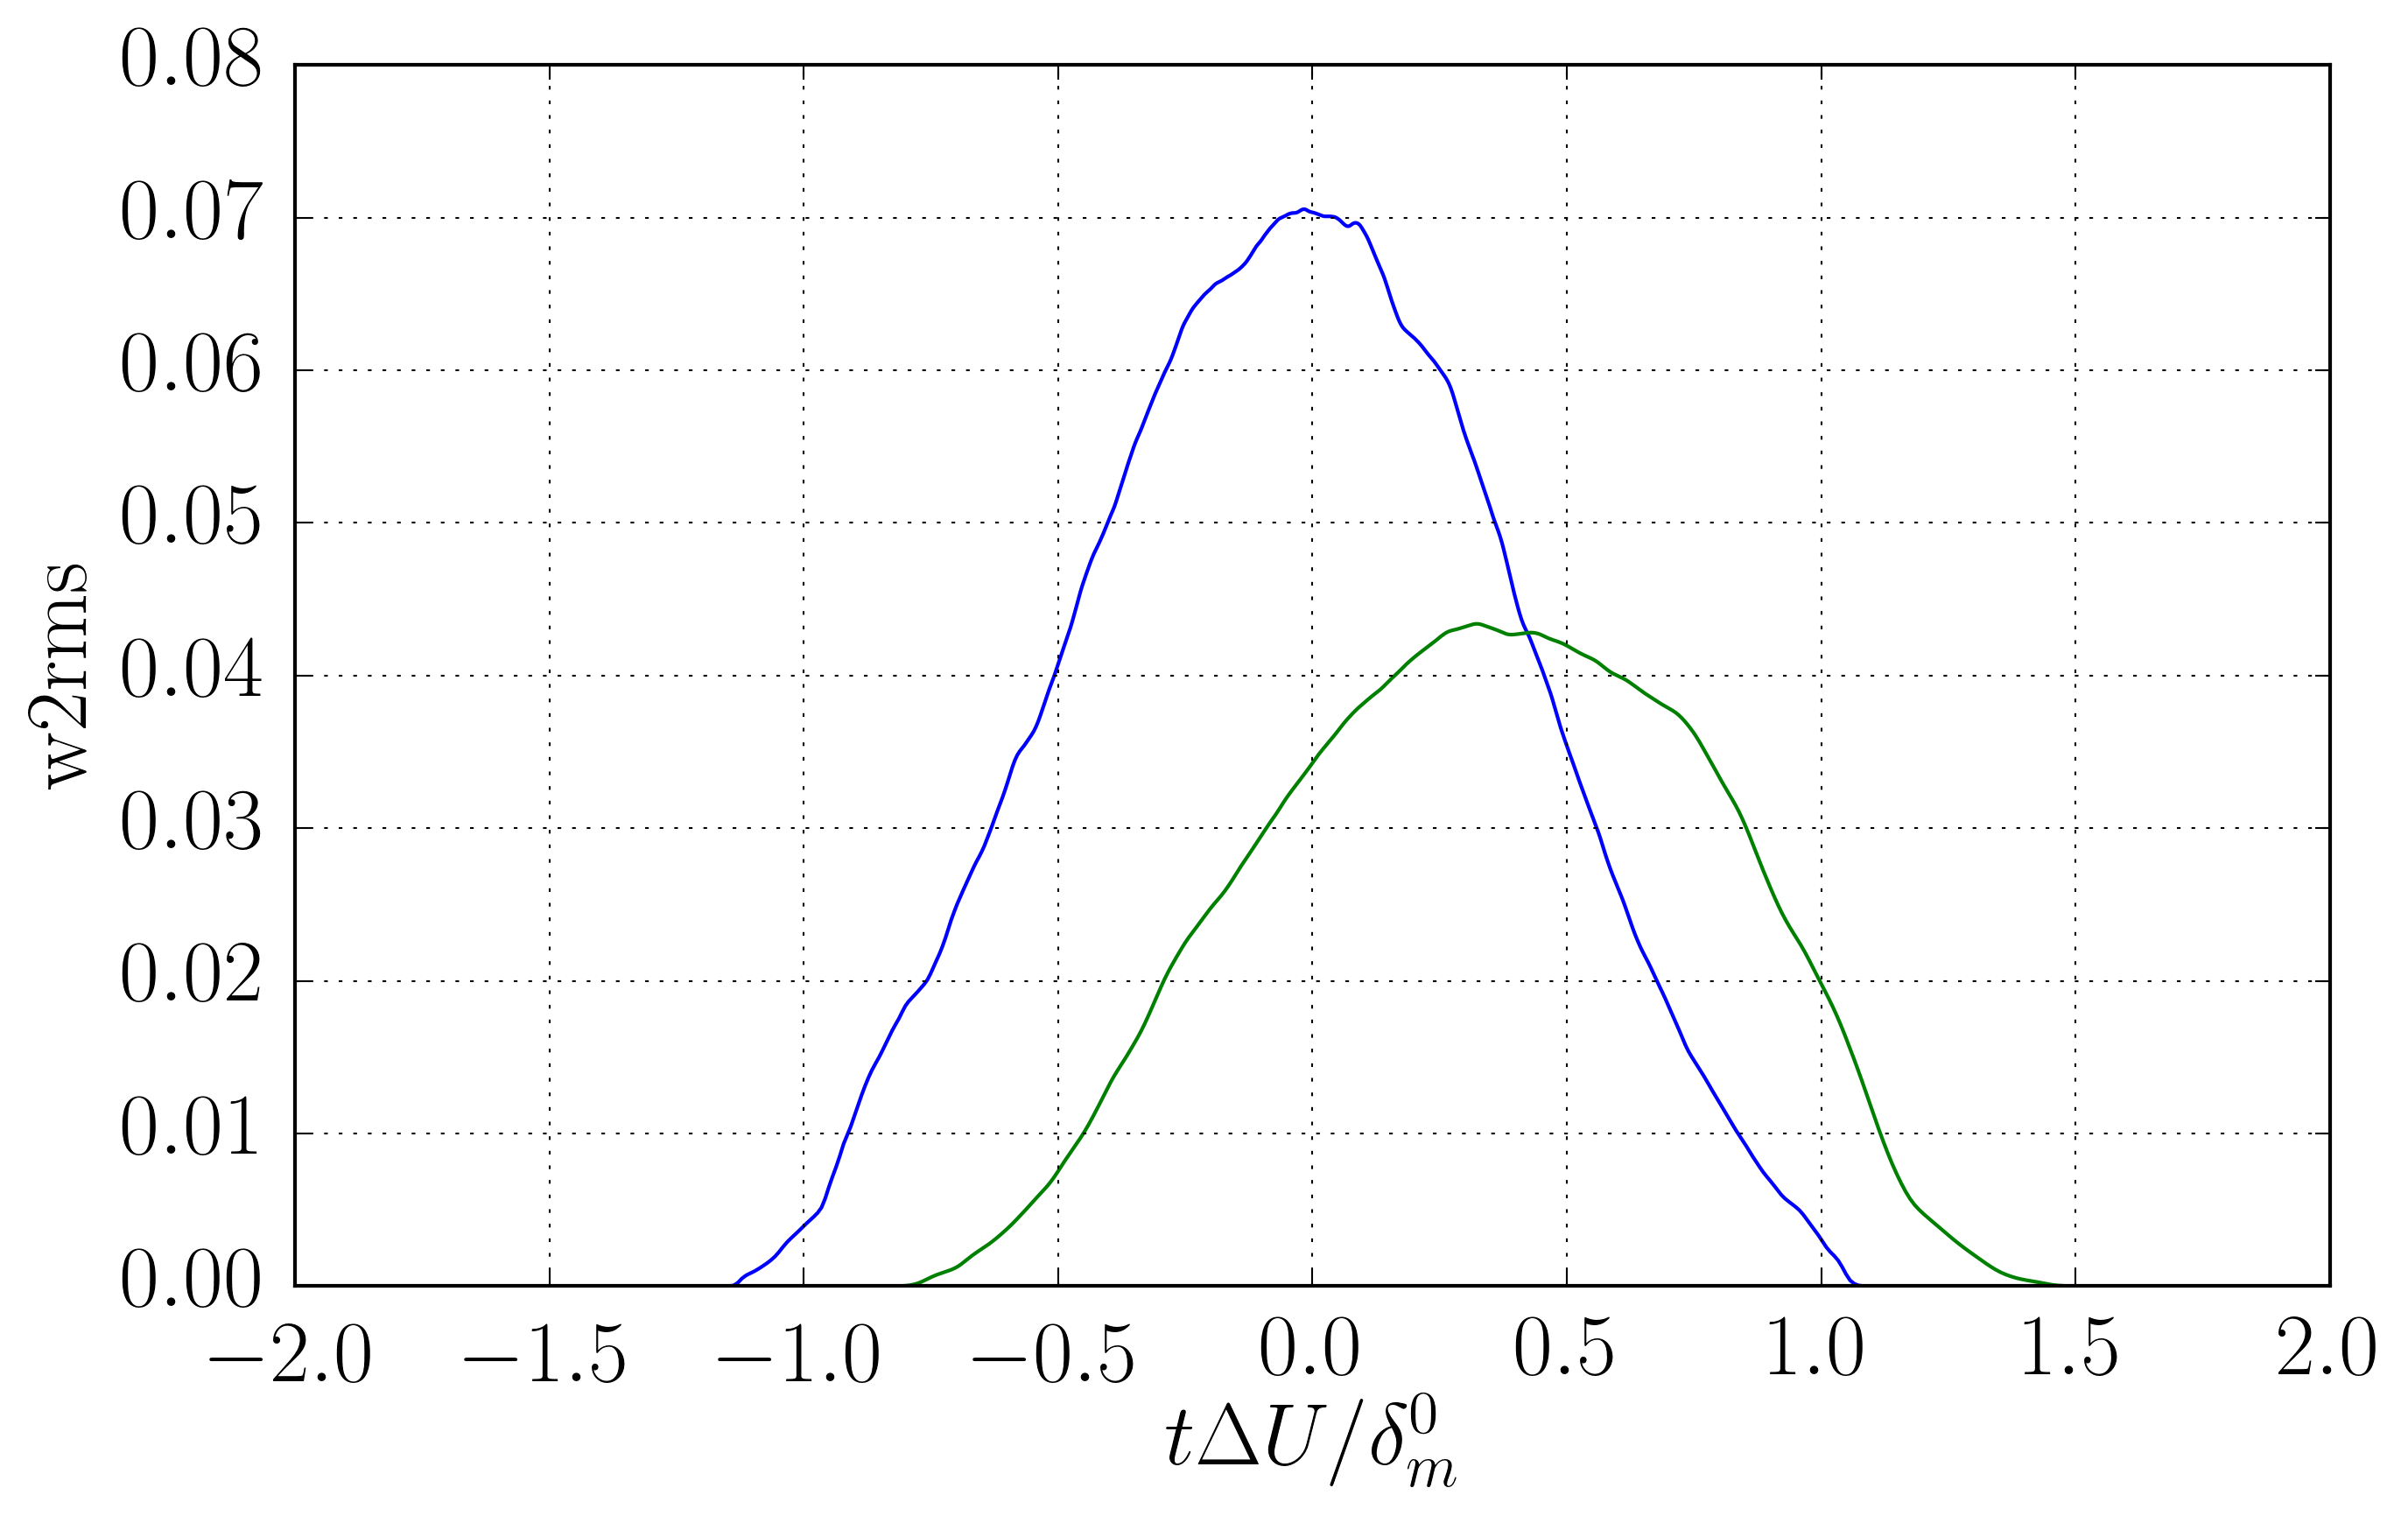

In [359]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#xlabel = r'$y/\delta_m^0$'
#ylabel = r'$\Delta y$'
xlabel = r'$t \Delta U/\delta_m^0$'
var = 'w2rms'
ylabel = var
p_folders= ['/share/drive/toni/VDML/s80/test/00/init/h5.stats','/share/drive/toni/VDML/s80/test/02/h5.stats']
p_folders= ['/share/drive/toni/VDML/s80/test/02/h5.stats','/share/drive/toni/Re160s80/case1/y2/h5.stats']
p_folders= ['/share/drive/toni/VDML/s10/02/h5.stats','/share/drive/toni/VDML/s80/02/h5.stats']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        yf  =np.array(f['y'])
        dm  =np.array(f['dm'])
        dw  =np.array(f['dw'])
        fun = np.array(f[var])[:,-1];
        rhom = np.array(f['rhom']);
        iy1 = where(fun>fun.max()*0.01)[0][0]
        iy2= where(fun>fun.max()*0.01)[0][-1]
        print "iy1=%s,iy2=%s"%(iy1,iy2)
        print "Percentage of occupied vertical length= %s"%((yf[iy2]-yf[iy1])/(yf[-1]-yf[0])*100)
        yleft = (yf[-1]-max(abs(yf[iy1]),yf[iy2]))/(yf[-1]-yf[0])*100
        print "dw=%s, vorthicknes =%s"%(dw[-1],yf[iy2]-yf[iy1])
        print "Box left = %s" %(yleft)
    plt.plot([yf[iy1],yf[iy1]],[fun.min(),fun.max()],'b--')
    plt.plot([yf[iy2],yf[iy2]],[fun.min(),fun.max()],'b--')
    #plt.plot(yf/dw[-1],(fun[:,-1]-fun[0,-1])/(fun[-1,-1]-fun[0,-1]),'-')
    #plt.plot(yf/dw[-1],np.sqrt(fun[:,-1]),'-')
    plt.plot(yf/dw[-1],fun,'-')
    #print np.trapz(fun[:,-1],yf)
plt.xlabel(xlabel);
#plt.ylim([0,5])
plt.xlim([-2,2])
plt.ylabel(ylabel)
plt.grid('on')

## 4400.0/(9*3600)

In [268]:
60575.0/3600

16.82638888888889

In [160]:
1536*384*3/32.


55296.0